# The start of the pandemic: ("2020-01-01", "2020-06-30", "NORW")

In [2]:
library(phangorn)
library(ggtreeExtra)
library(ggtree)
library(ggnewscale)
library(colorspace);
library(RColorBrewer);
library(dplyr)
library(tidyr)
library(ggplot2)
library (ggpubr)
library (stringr)
library(castor)
library(lubridate)

Loading required package: ape

code for methods in class “Rcpp_Fitch” was not checked for suspicious field assignments (recommended package ‘codetools’ not available?)

code for methods in class “Rcpp_Fitch” was not checked for suspicious field assignments (recommended package ‘codetools’ not available?)

ggtreeExtra v1.4.1  For help: https://yulab-smu.top/treedata-book/

If you use ggtreeExtra in published research, please cite the paper:

S Xu, Z Dai, P Guo, X Fu, S Liu, L Zhou, W Tang, T Feng, M Chen, L Zhan, T Wu, E Hu, Y Jiang, X Bo, G Yu. ggtreeExtra: Compact visualization of richly annotated phylogenetic data. Molecular Biology and Evolution 2021, 38(9):4039-4042. doi: 10.1093/molbev/msab166



ggtree v3.2.1  For help: https://yulab-smu.top/treedata-book/

If you use ggtree in published research, please cite the most appropriate paper(s):

1. Guangchuang Yu. Using ggtree to visualize data on tree-like structures. Current Protocols in Bioinformatics. 2020, 69:e96. doi:10.1002/cpb

# Load and reformat COG-UK metadata

In [3]:
cog_meta <- "/home/madeline/Desktop/git_temp/QIB_Internship/data/cog_global_2022-03-28_public.csv.xz"
df <- read.csv(cog_meta)

In [4]:
england <- df[grep("England", df$sequence_name), ]

In [5]:
england <- england %>% mutate(sample_date=as.POSIXct(sample_date))
england$date2 <- as.Date(cut(england$sample_date, breaks = "2 weeks", start.on.monday = FALSE))
england$sample_date <- as.Date(england$sample_date)
england$code = substr(england$central_sample_id,1,4)

Reformat sequence names to match tree tips:

In [6]:
england$sequence_name <- str_replace_all(england$sequence_name, '/', '_')
england$sequence_name <- paste0("_", england$sequence_name, "_")
england

sequence_name               is_uk is_cog_uk central_sample_id
1       _England_DHSC-CYFPQQM_2022_ Y     Y         DHSC-CYFPQQM     
2       _England_PHEC-YYDADNF_2022_ Y     Y         PHEC-YYDADNF     
3       _England_PHEC-YYDARKW_2022_ Y     Y         PHEC-YYDARKW     
4       _England_PHEC-YYDA8KT_2022_ Y     Y         PHEC-YYDA8KT     
5       _England_PHEC-YYDAFOG_2022_ Y     Y         PHEC-YYDAFOG     
6       _England_PHEC-YYDAN9M_2022_ Y     Y         PHEC-YYDAN9M     
7       _England_PHEC-YYDANRN_2022_ Y     Y         PHEC-YYDANRN     
8       _England_PHEC-YYDARUB_2022_ Y     Y         PHEC-YYDARUB     
9       _England_PHEC-YYDARZ3_2022_ Y     Y         PHEC-YYDARZ3     
10      _England_PHEC-YYDAJMP_2022_ Y     Y         PHEC-YYDAJMP     
11      _England_PHEC-YYDAR6M_2022_ Y     Y         PHEC-YYDAR6M     
12      _England_PHEC-YYDAGYG_2022_ Y     Y         PHEC-YYDAGYG     
13      _England_PHEC-YYDAN1F_2022_ Y     Y         PHEC-YYDAN1F     
14      _England_PHEC-YYDA8YF_2022_ Y     Y         PHEC-YYDA8YF     
15      _England_PHEC-YYDADRB_2022_ Y     Y         PHEC-YYDADRB     
16      _England_PHEC-YYDA8CP_2022_ Y     Y         PHEC-YYDA8CP     
17      _England_PHEC-YYDAD9K_2022_ Y     Y         PHEC-YYDAD9K     
18      _England_PHEC-YYDADJZ_2022_ Y     Y         PHEC-YYDADJZ     
19      _England_PHEC-YYDAFCX_2022_ Y     Y         PHEC-YYDAFCX     
20      _England_PHEC-YYDAED6_2022_ Y     Y         PHEC-YYDAED6     
21      _England_PHEC-YYDAJYD_2022_ Y     Y         PHEC-YYDAJYD     
22      _England_PHEC-YYDAG7M_2022_ Y     Y         PHEC-YYDAG7M     
23      _England_PHEC-YYDANFY_2022_ Y     Y         PHEC-YYDANFY     
24      _England_PHEC-YYDA8QJ_2022_ Y     Y         PHEC-YYDA8QJ     
25      _England_PHEC-YYDAGPC_2022_ Y     Y         PHEC-YYDAGPC     
26      _England_PHEC-YYDAG3U_2022_ Y     Y         PHEC-YYDAG3U     
27      _England_PHEC-YYDAD6C_2022_ Y     Y         PHEC-YYDAD6C     
28      _England_PHEC-YYDAJQ8_2022_ Y     Y         PHEC-YYDAJQ8     
29      _England_PHEC-YYDAGI5_2022_ Y     Y         PHEC-YYDAGI5     
30      _England_PHEC-YYDAJEU_2022_ Y     Y         PHEC-YYDAJEU     
⋮       ⋮                           ⋮     ⋮         ⋮                
2528492 _England_PHEC-10E03_2020_   Y     Y         PHEC-10E03       
2528493 _England_PHEC-10D60_2020_   Y     Y         PHEC-10D60       
2528494 _England_PHEC-10EB8_2020_   Y     Y         PHEC-10EB8       
2528495 _England_PHEC-10D15_2020_   Y     Y         PHEC-10D15       
2528496 _England_PHEC-10FA6_2020_   Y     Y         PHEC-10FA6       
2528497 _England_PHEC-10F3D_2020_   Y     Y         PHEC-10F3D       
2528498 _England_PHEC-10E12_2020_   Y     Y         PHEC-10E12       
2528499 _England_PHEC-1101B_2020_   Y     Y         PHEC-1101B       
2528500 _England_PHEC-10D24_2020_   Y     Y         PHEC-10D24       
2528501 _England_PHEC-10D33_2020_   Y     Y         PHEC-10D33       
2528502 _England_PHEC-10F5B_2020_   Y     Y         PHEC-10F5B       
2528503 _England_PHEC-10DAC_2020_   Y     Y         PHEC-10DAC       
2528504 _England_PHEC-10E21_2020_   Y     Y         PHEC-10E21       
2528505 _England_PHEC-10D7F_2020_   Y     Y         PHEC-10D7F       
2528506 _England_PHEC-10F97_2020_   Y     Y         PHEC-10F97       
2528507 _England_PHEC-10E6D_2020_   Y     Y         PHEC-10E6D       
2528508 _England_PHEC-10DCA_2020_   Y     Y         PHEC-10DCA       
2528509 _England_PHEC-10FE2_2020_   Y     Y         PHEC-10FE2       
2528510 _England_PHEC-10D42_2020_   Y     Y         PHEC-10D42       
2528511 _England_PHEC-10DE8_2020_   Y     Y         PHEC-10DE8       
2528512 _England_PHEC-10E30_2020_   Y     Y         PHEC-10E30       
2528513 _England_PHEC-10E5E_2020_   Y     Y         PHEC-10E5E       
2528514 _England_PHEC-10F1F_2020_   Y     Y         PHEC-10F1F       
2528515 _England_PHEC-10DBB_2020_   Y     Y         PHEC-10DBB       
2528516 _England_PHEC-10EA9_2020_   Y     Y         PHEC-10EA9       
2528517 _England_P

# Define functions

In [7]:
plot_lineages <- function(start_date, end_date, centre){

d <- subset(england, code == centre)
date_subset <- subset(d, (sample_date >= as.Date(start_date) & sample_date <= as.Date(end_date))) #just an end date for now

total_lineages <- as.data.frame(table(date_subset$lineage))

num_uniq = length(unique(date_subset$lineage))
print(paste0(centre, ": ", num_uniq, " unique lineages"))    
    
options(repr.plot.width=14, repr.plot.height=8) ; par(oma=c(0,0,0,0))
p <- ggplot(data=total_lineages, mapping = aes(x = Var1, y = Freq)) + ggplot2::geom_bar(stat="identity", color='black', fill='maroon')
p <- p + theme_classic() + theme(axis.text.x = element_text(color="black", size=16)) + xlab("Lineage") + ylab("Number of Sequences")
p <- p + theme(axis.title.x = element_text(color="black", size=15, face="bold"), 
               axis.text.x = element_text(color="black", size=15, angle = 90, vjust = 0.5, hjust=1),
               axis.title.y = element_text(color="black", size=15, face="bold"),
               axis.text.y = element_text(color="black", size=15),
               legend.text = element_text(size=16), legend.title = element_text(size=20)
              )

p <- p + labs(title = paste0(centre, ": ", start_date, " to ", end_date))
p
}

In [8]:
plot_lineages_choose_sites <- function(start_date, end_date, centres){

date_subset <- subset(england, (sample_date >= as.Date(start_date) & sample_date <= as.Date(end_date))) #just an end date for now
centre_subs2 <- filter(date_subset, grepl(paste(centres, collapse="|"), code))
options(repr.plot.width=14, repr.plot.height=8) ; par(oma=c(0,0,0,0))
p <- ggplot(centre_subs2, aes(x = lineage, fill=code)) + geom_bar(color='black')
p <- p + scale_x_discrete(expand=c(0.0001, 0))
p <- p + scale_fill_discrete(name = "Sequencing Site")
p <- p + theme_classic() + theme(axis.text.x = element_text(color="black", size=16)) + xlab("Lineage") + ylab("Number of Sequences")
p <- p + theme(axis.title.x = element_text(color="black", size=15, face="bold"), 
               axis.text.x = element_text(color="black", size=12, angle = 90, vjust = 0.5, hjust=1),
               axis.title.y = element_text(color="black", size=15, face="bold"),
               axis.text.y = element_text(color="black", size=15),
               legend.text = element_text(size=16), legend.title = element_text(size=20)
              )

p <- p + labs(title = paste0(start_date, " to ", end_date))
p
}

In [9]:
plot_sample_counts <- function(start_date, end_date, centre){

date_subset <- subset(england[grep(centre, england$code), ], (sample_date >= as.Date(start_date) & sample_date <= as.Date(end_date))) #just an end date for now
getPal_centre  = colorRampPalette(brewer.pal(8,"Accent"))(length(unique(england$code)))    
options(repr.plot.width=14, repr.plot.height=8) ; par(oma=c(0,0,0,0))
print(paste0(centre, " total seqs: ", nrow(date_subset))) 
p <- ggplot(date_subset, aes(x = sample_date, fill=code)) + geom_bar(color='black')
p <- p + ggplot2::scale_fill_manual(values=getPal_centre, name="Code")
p <- p + theme_classic() + theme(axis.text.x = element_text(color="black", size=16)) + xlab("Sample Date") + ylab("Number of Sequences")
p <- p + theme(axis.title.x = element_text(color="black", size=15, face="bold"), 
               axis.text.x = element_text(color="black", size=12, angle = 90, vjust = 0.5, hjust=1),
               axis.title.y = element_text(color="black", size=15, face="bold"),
               axis.text.y = element_text(color="black", size=15),
               legend.text = element_text(size=16), legend.title = element_text(size=20)
              )

p <- p + labs(title = paste0(centre, ": ", start_date, " to ", end_date))
p
}

In [10]:
plot_lineage_contributions <- function(start_date, end_date, centre){

date_subset <- subset(england[grep(centre, england$code), ], (sample_date >= as.Date(start_date) & sample_date <= as.Date(end_date))) #just an end date for now
getPal_lineage  = colorRampPalette(brewer.pal(8,"Accent"))(length(unique(date_subset$lineage)))
options(repr.plot.width=14, repr.plot.height=8) ; par(oma=c(0,0,0,0))
    
p <- ggplot(date_subset, aes(x = date2, fill=lineage)) + geom_bar(position='fill', width=12,color='black')  ## geom_bar()
p <- p + ggplot2::scale_fill_manual(values=getPal_lineage, name="Lineage")
p <- p + theme_classic() + theme(axis.text.x = element_text(color="black", size=16)) + xlab("Sampling Date") + ylab("Proportion of Sequences")
p <- p + scale_x_date(date_labels = "%b\n%Y",date_breaks = "2 months", date_minor_breaks = "1 month", limits = as.Date(c(start_date,end_date)))
p <- p + theme(axis.title.x = element_text(color="black", size=15, face="bold"), 
               axis.text.x = element_text(color="black", size=15),
               axis.title.y = element_text(color="black", size=15, face="bold"),
               axis.text.y = element_text(color="black", size=15),
               legend.text = element_text(size=16), legend.title = element_text(size=20)
              )

p <- p + labs(title = paste0(centre, ": ", start_date, " to ", end_date))
p
}

In [11]:
plot_lineage_counts_2w <- function(start_date, end_date, centre){

date_subset <- subset(england[grep(centre, england$code), ], (sample_date >= as.Date(start_date) & sample_date <= as.Date(end_date))) #just an end date for now
getPal_lineage  = colorRampPalette(brewer.pal(8,"Accent"))(length(unique(date_subset$lineage)))
options(repr.plot.width=14, repr.plot.height=8) ; par(oma=c(0,0,0,0))
    
p <- ggplot(date_subset, aes(x = date2, fill=lineage)) + geom_bar(color='black')  ## geom_bar()
p <- p + ggplot2::scale_fill_manual(values=getPal_lineage, name="Lineage")
p <- p + theme_classic() + theme(axis.text.x = element_text(color="black", size=16)) + xlab("Sampling Date") + ylab("Proportion of Sequences")
p <- p + scale_x_date(date_labels = "%b\n%Y",date_breaks = "2 months", date_minor_breaks = "1 month", limits = as.Date(c(start_date,end_date)))
p <- p + theme(axis.title.x = element_text(color="black", size=15, face="bold"), 
               axis.text.x = element_text(color="black", size=15),
               axis.title.y = element_text(color="black", size=15, face="bold"),
               axis.text.y = element_text(color="black", size=15),
               legend.text = element_text(size=16), legend.title = element_text(size=20)
              )

p <- p + labs(title = paste0(centre, ": ", start_date, " to ", end_date))
p
}

In [12]:
plot_tree_by_factor <- function(treefile, metadata, factor, treetype, mrsd){

# read in everything
tbl0 <- read.csv (metadata, sep = ",") 
tbl0[is.na(tbl0)] <- ""
if(treetype=="newick") {tre <- read.tree (treefile)}
else if(treetype=="nexus") {tre <- read.nexus (treefile)}
traits <- tbl0 %>% slice(match(tre$tip.label, sequence_name)) #this line means you could use the entire cog_uk metadata
rownames(traits) <- traits$sequence_name
# traits$code <- substr(traits$central_sample_id,1,4)

# get plot inputs
groupInfo <- split (tre$tip.label, traits[factor])
grouptre <- groupOTU(tre, groupInfo, group_name="group1")
options(repr.plot.width=26, repr.plot.height=20) ; par(oma=c(0,0,0,0)) 
getPal_1 = colorRampPalette( brewer.pal(8,"Dark2"))(length(unique(traits[,factor]))+1)  ## RdYlGn Set2

# make plot
p <- ggtree (grouptre,  aes(color=group1),size=0.4, layout="rectangular", mrsd=mrsd)
p <- p + theme(legend.position="right") + theme(legend.text=element_text(size=15))
p <- p + ggplot2::scale_color_manual(values = getPal_1, name=factor)
p <- p + new_scale_color()  + new_scale_fill() 
p <- p + theme_tree2() 
p
return(p)

}

In [13]:
plot_one_lineage_from_tree <- function(treefile, metadata, lineage_to_plot, treetype, mrsd){

# read in everything
tbl0 <- read.csv (metadata, sep = ",") 
tbl0[is.na(tbl0)] <- ""
if(treetype=="newick") {tre <- read.tree (treefile)}
else if(treetype=="nexus") {tre <- read.nexus (treefile)}
traits <- tbl0 %>% slice(match(tre$tip.label, sequence_name)) 
rownames(traits) <- traits$sequence_name

groupInfo <- split (tre$tip.label, traits$lineage)
tip_subset <- unlist(groupInfo[lineage_to_plot])   #char vector of tips to plot
subtree <- get_subtree_with_tips(tre, only_tips=tip_subset)$subtree #castor

# make plot
options(repr.plot.width=26, repr.plot.height=20) ; par(oma=c(0,0,0,0)) 
p <- ggtree (subtree,  color="blue",size=0.4, layout="rectangular", mrsd=mrsd) + theme(legend.position="right") + theme(legend.text=element_text(size=15))
p <- p + theme_tree2() 
p <- p + geom_tiplab()
p <- p + labs(title = lineage_to_plot)
p

return(p)

}

In [14]:
plot_tree_subset_and_color <- function(treefile, metadata, factor_to_subset_by, factor_value_to_subset_by, color_by, treetype, mrsd){

# read in everything
#tbl0 <- read.csv (metadata, sep = ",") 
tbl0 <- metadata
tbl0[is.na(tbl0)] <- ""
if(treetype=="newick") {tre <- read.tree (treefile)}
else if(treetype=="nexus") {tre <- read.nexus (treefile)}
traits <- tbl0 %>% slice(match(tre$tip.label, sequence_name)) 
rownames(traits) <- traits$sequence_name

# get subtree and traits subset corresponding to factor value
traits_subset <- traits[ traits[[factor_to_subset_by]] == factor_value_to_subset_by , ]
tip_subset <- traits_subset[["sequence_name"]]
tree_subset <- get_subtree_with_tips(tre, only_tips=tip_subset)$subtree #castor
    
# get color scheme for color_by
groupInfo <- split (tree_subset$tip.label, traits_subset[color_by])   
grouptre <- groupOTU(tree_subset, groupInfo, group_name="group1")
options(repr.plot.width=26, repr.plot.height=20) ; par(oma=c(0,0,0,0)) 
getPal_1 = colorRampPalette( brewer.pal(8,"Dark2"))(length(unique(traits_subset[color_by]))+2)  

# make plot
p <- ggtree (grouptre,  aes(color=group1),size=0.4, layout="rectangular", mrsd=mrsd) + theme(legend.position="right") + theme(legend.text=element_text(size=15))
p <- p + ggplot2::scale_color_manual(values = getPal_1, name=color_by)
p <- p + new_scale_color()  + new_scale_fill() 
p <- p + theme_tree2() 
p <- p + geom_tiplab()
p <- p + labs(title = factor_value_to_subset_by)

p
return(p)
    


}

# Investigate NORW vs. NORT vs. CAMB from 2020-01-01 to 2020-06-30

The aim of this bit is to check whether doing more sequencing actually gives you higher sequence diversity or not.  So, is it worth sequencing a lot for surveillance to be effective?

I chose to look at NORW at the very beginning of the pandemic mainly because it was a relatively small wave (though it seemed much taller back then!) and manageable to analyze as a test case.

NORT and CAMB were chosen as comparisons because Northumberland and Cambridge each have a similar population size to Norwich (though--importantly--I don't know what the NORT and CAMB codes really mean with respect to their area), but NORT and CAMB each have significantly more samples than NORW.  Also, NORW, NORT and CAMB all have similar numbers of lineages over the whole pandemic so far, so I'm curious to see if this is true for shorter time periods.  Over this whole time period, the total sequences corresponding to each four-letter code are:

* NORW: 986
* NORT: 1646 (~2x NORW)
* CAMB: 5302 (~ 5x NORW)

Note: There are many other things to take into account here to explain differences in viral diversity between the regions, including population density, demographics (especially age and occupation/level of isolation during work), and isolation from other cities--Norwich is the most isolated of these three, and for this reason I would expect lower viral diversity than other areas, since there would likely be fewer introductions of coronavirus.

There are a few significant dates with respect to lockdowns in the UK during the beginning of the pandemic.  (The lockdown timeline for Britain is [here](https://www.instituteforgovernment.org.uk/charts/uk-government-coronavirus-lockdowns).)  They are:

* March 11: WHO declares the COVID-19 pandemic ([link](https://www.who.int/director-general/speeches/detail/who-director-general-s-opening-remarks-at-the-media-briefing-on-covid-19---11-march-2020))
* March 16: PM announces that everyone should stay home
* March 26: Lockdown measures enacted in Britain
* May 10: PM announces that those who can't work from home should go back to work but avoid public transport
* June 1: Phased school reopening begins
* June 15: Non-essential shops reopen
* June 23: Restrictions relaxed (including social distancing)

**Metadata exploration: lineages and counts over time**

To start out, I wanted to know what the time distribution of samples in the COG-UK database is:

[1] "NORW total seqs: 986"
[1] "NORT total seqs: 1646"


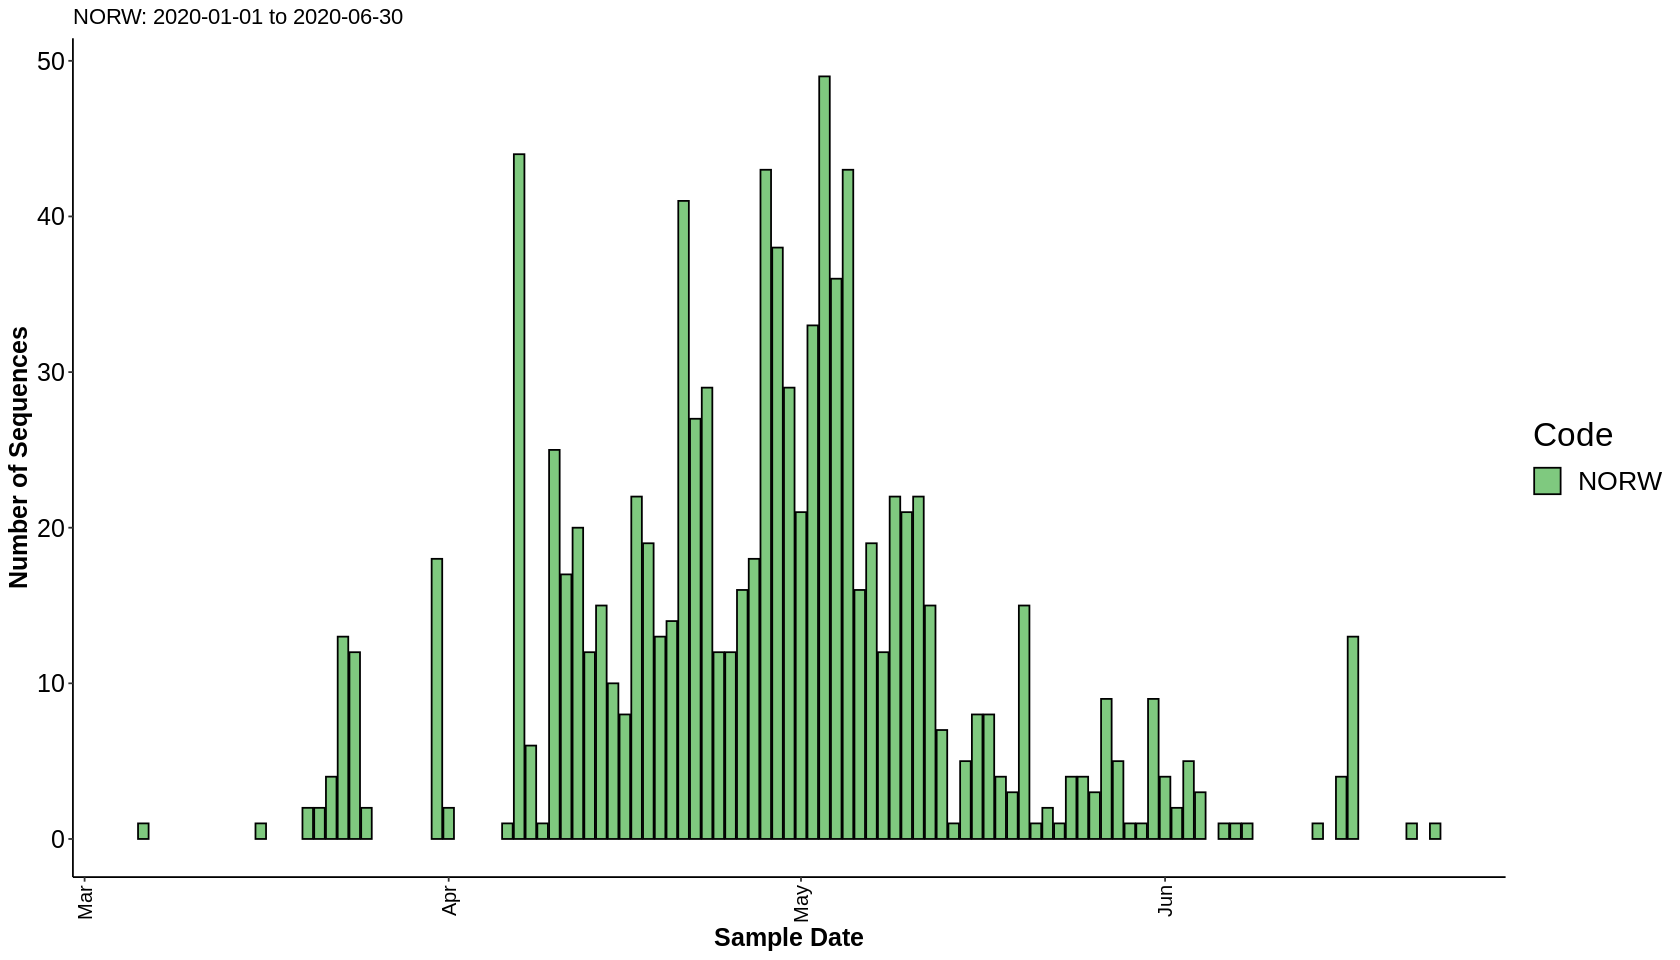

[1] "CAMB total seqs: 5302"


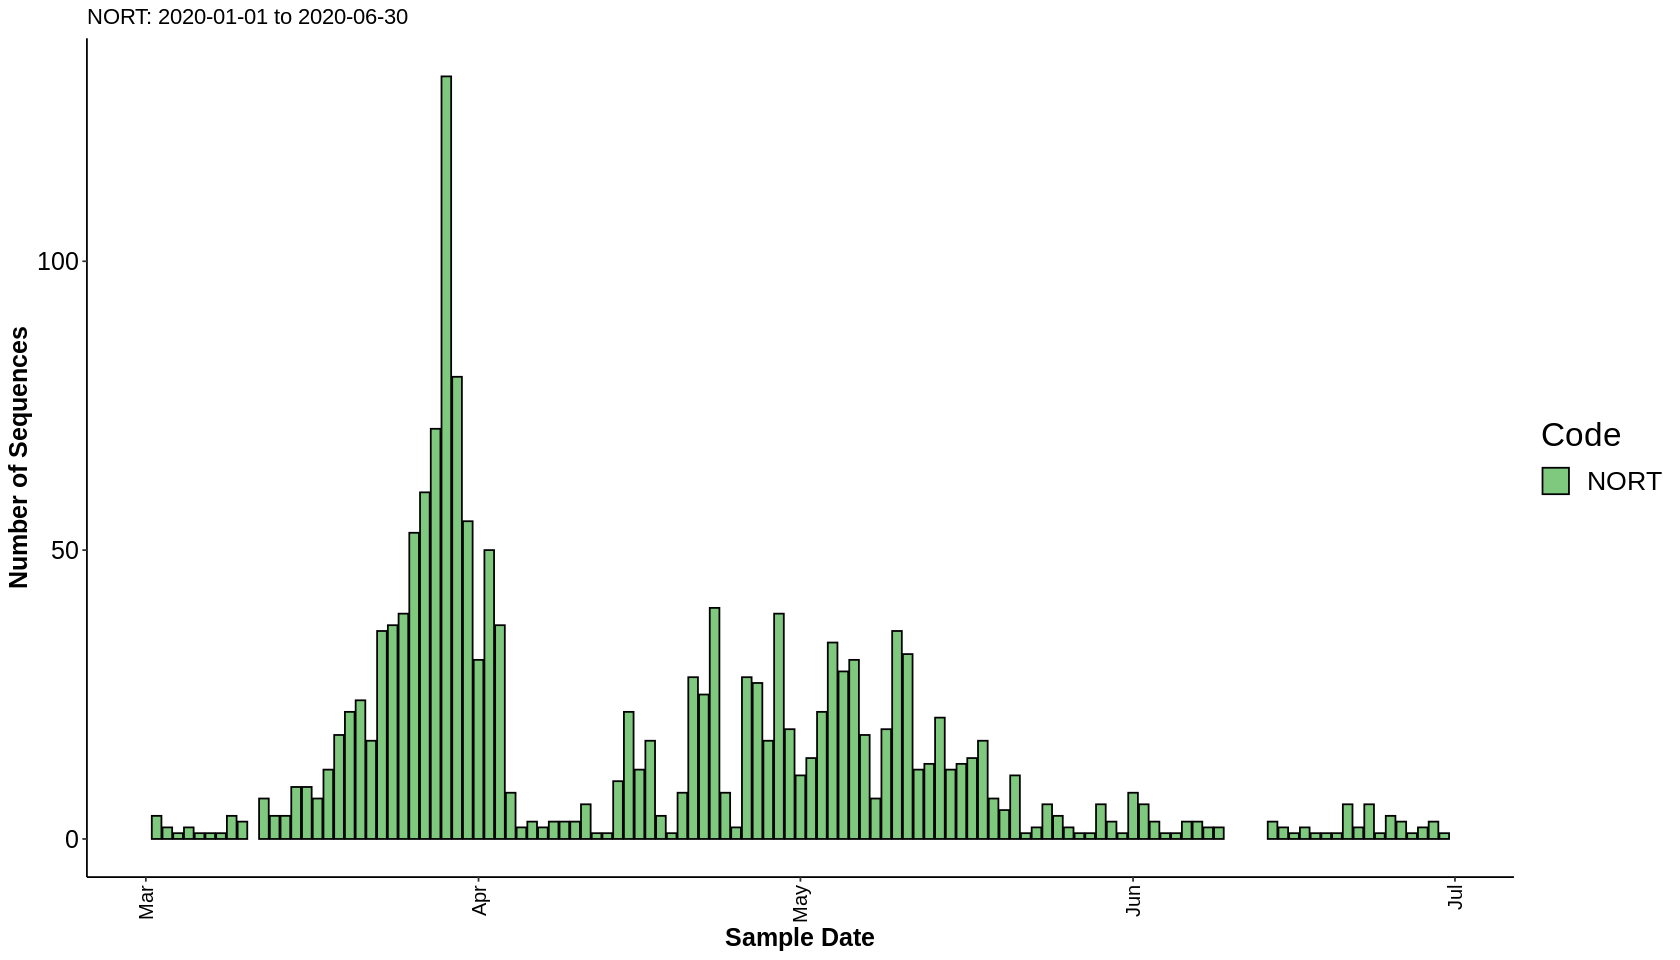

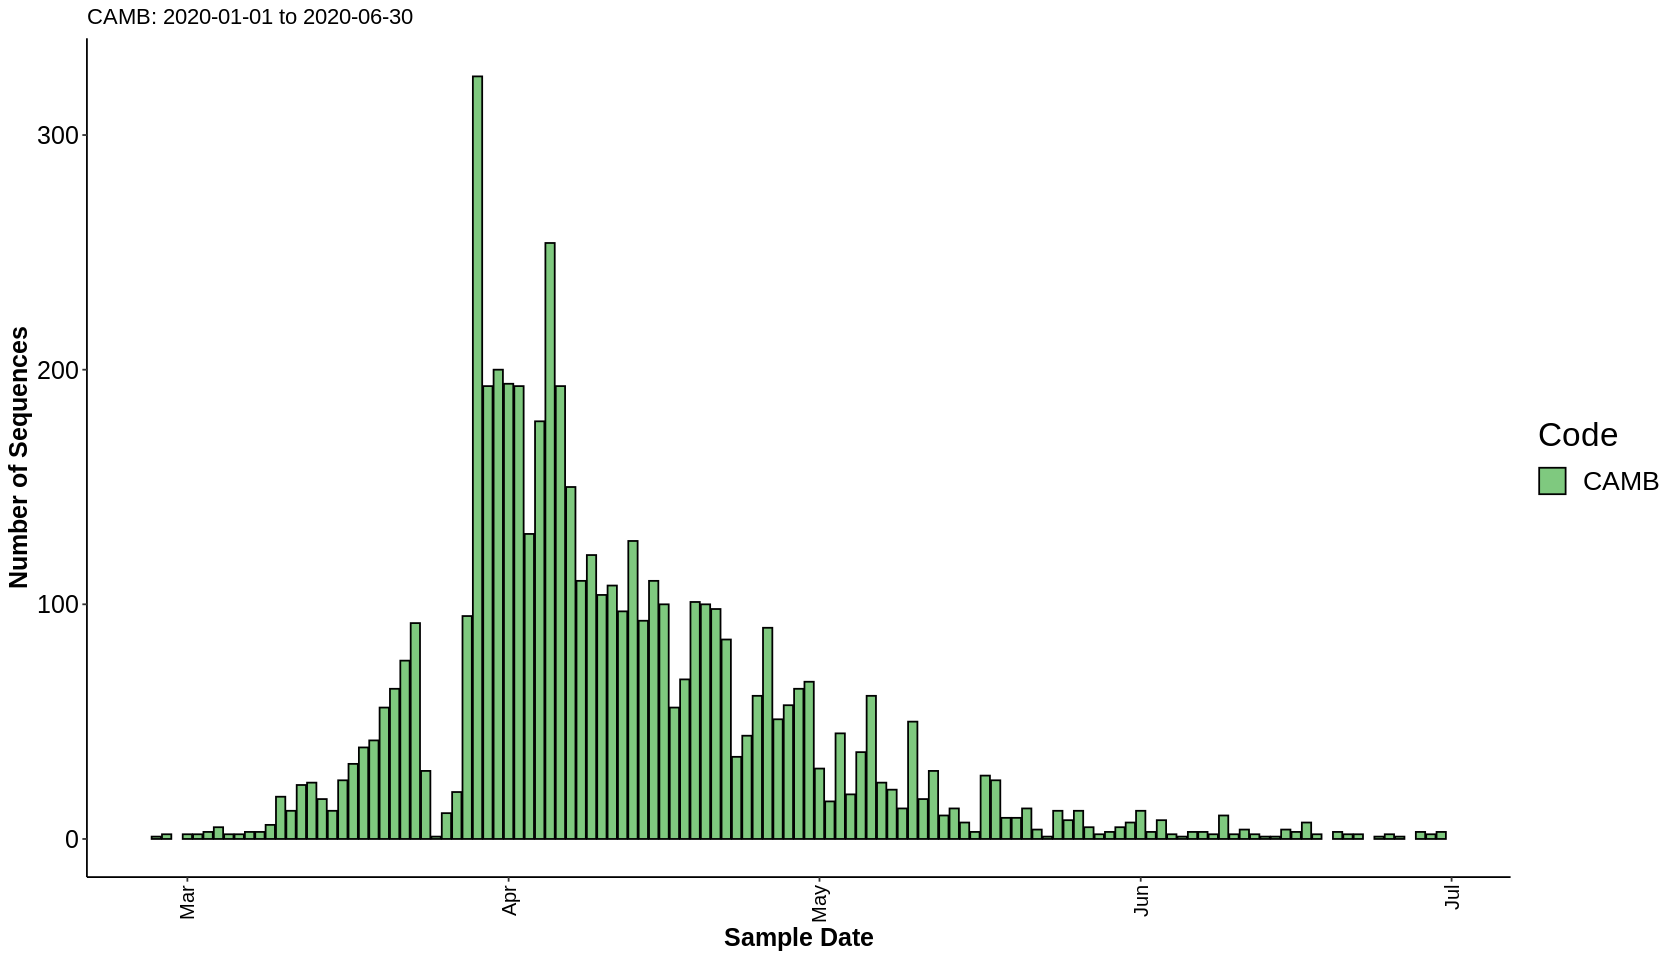

In [15]:
plot_sample_counts("2020-01-01", "2020-06-30", "NORW")
plot_sample_counts("2020-01-01", "2020-06-30", "NORT")
plot_sample_counts("2020-01-01", "2020-06-30", "CAMB")

For NORW, there are no samples available before March 2020.  In general, the number of samples sequenced peaks at the beginning of May, then falls again.  There are several days at the beginning of March and later part of June where no samples are sequenced.

For NORT, the distribution is almost bimodal: sequences begin at the start of March, then there's a sharp peak in sequencing towards the end of March, and a gentler wave in May, centred at the same place as NORW's and reaching a similar height.

For CAMB, sequencing begins at the end of February, peaks near the start of April, then slowly falls, petering out at the end of June.

Second: **which PANGO lineages were sequenced in the first wave?**

[1] "NORW: 27 unique lineages"
[1] "NORT: 54 unique lineages"


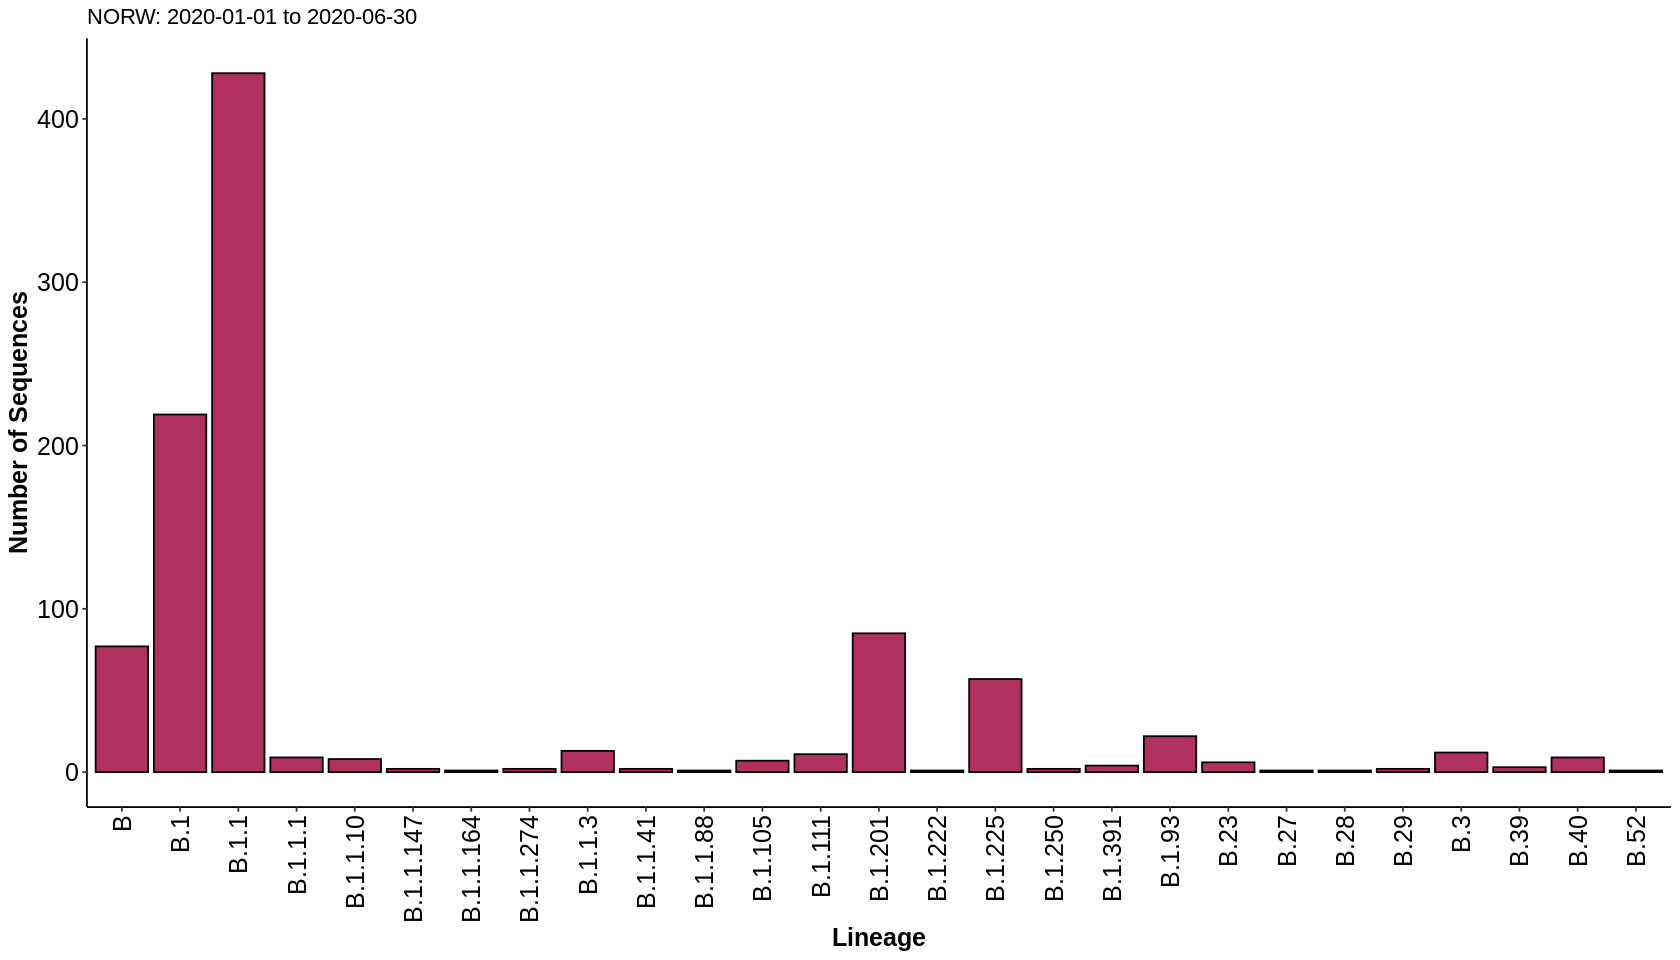

[1] "CAMB: 110 unique lineages"


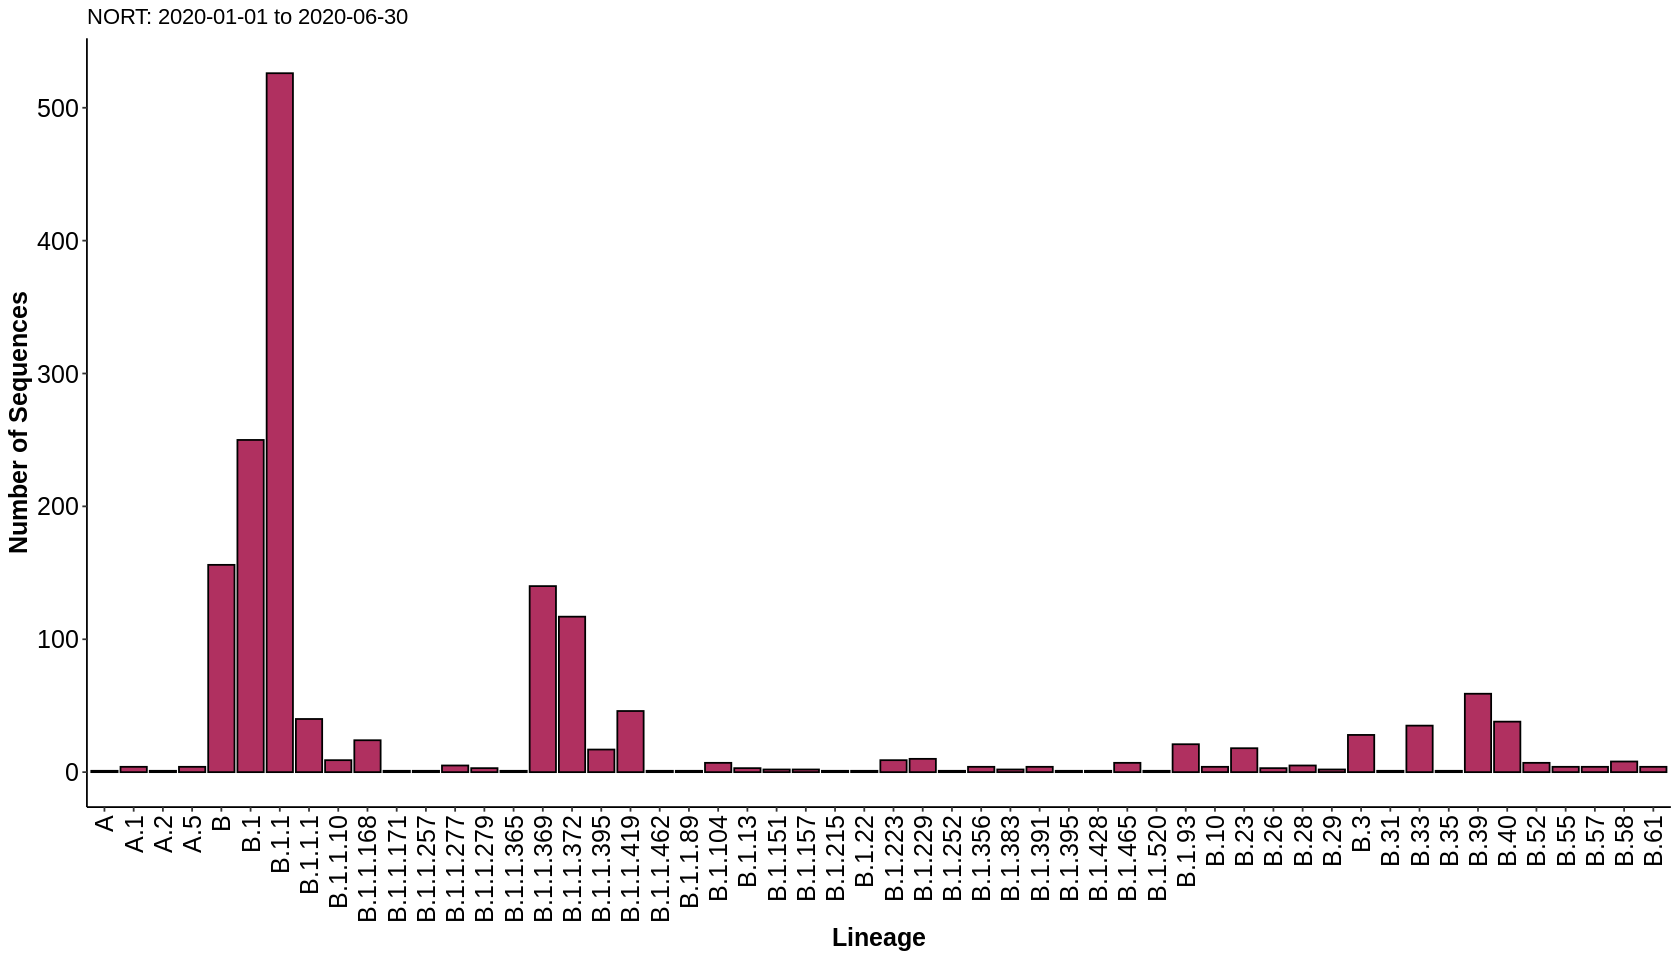

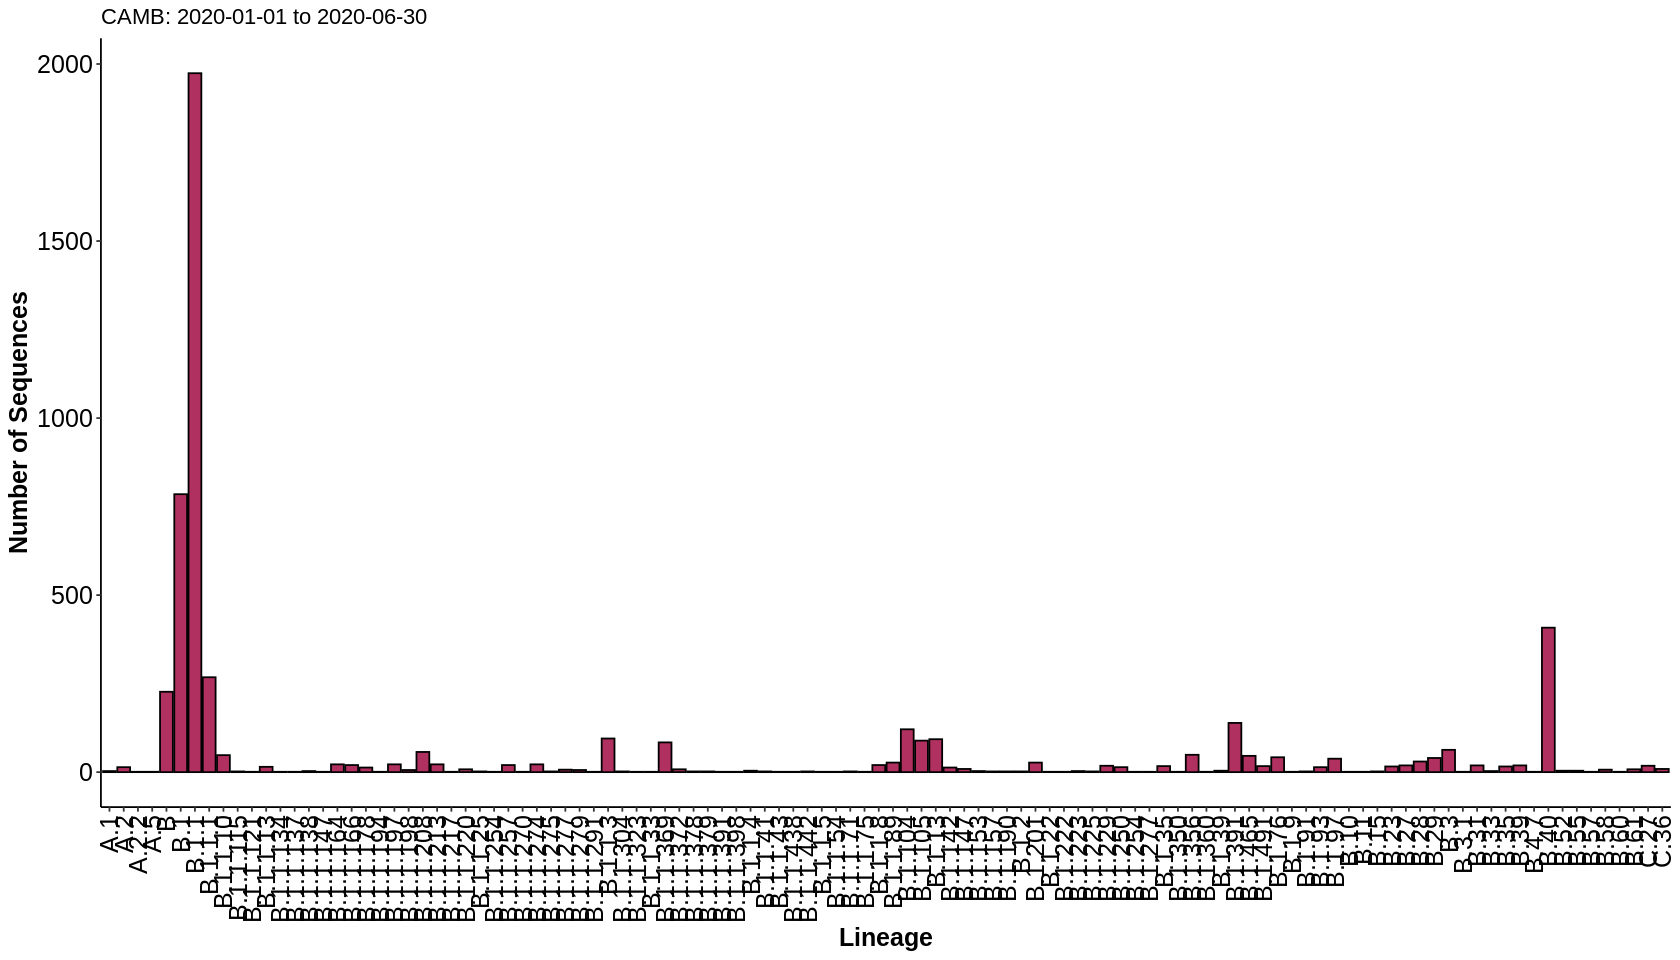

In [16]:
plot_lineages("2020-01-01", "2020-06-30", "NORW")
plot_lineages("2020-01-01", "2020-06-30", "NORT")
plot_lineages("2020-01-01", "2020-06-30", "CAMB")

NORW has the lowest number of lineages (27), followed by NORT (54), and CAMB has the most (110).

All three codes have B.1 and B.1.1 as the most common overall.

For NORW, all the sequences belong to the B clade.  The most common lineage is B.1.1, followed by B.1.  Then, B, B.1.201, and B.1.225 are all close after that.  There are 27 lineages, all B, in total, with only 5 of those lineages occurring in more than 50 samples.

NORT includes a few A clade sequences.  B.1.1 is the most common by far, followed by B.1.  Next, B, B.1.1.369 and B.1.1.372 are all close, nearly tying for third. 

CAMB has sequences from both A and C.  B.1.1 is the most common by far, followed by B.1 and B.40.  B.1.1.10 and B are next.  Many lineages are represented by only very few samples.  B.40 is proportionally much more common than it is in NORW or NORT.

**How common is each lineage over time, compared to the rest?**

Warning message:
“Removed 2 rows containing missing values (geom_bar).”


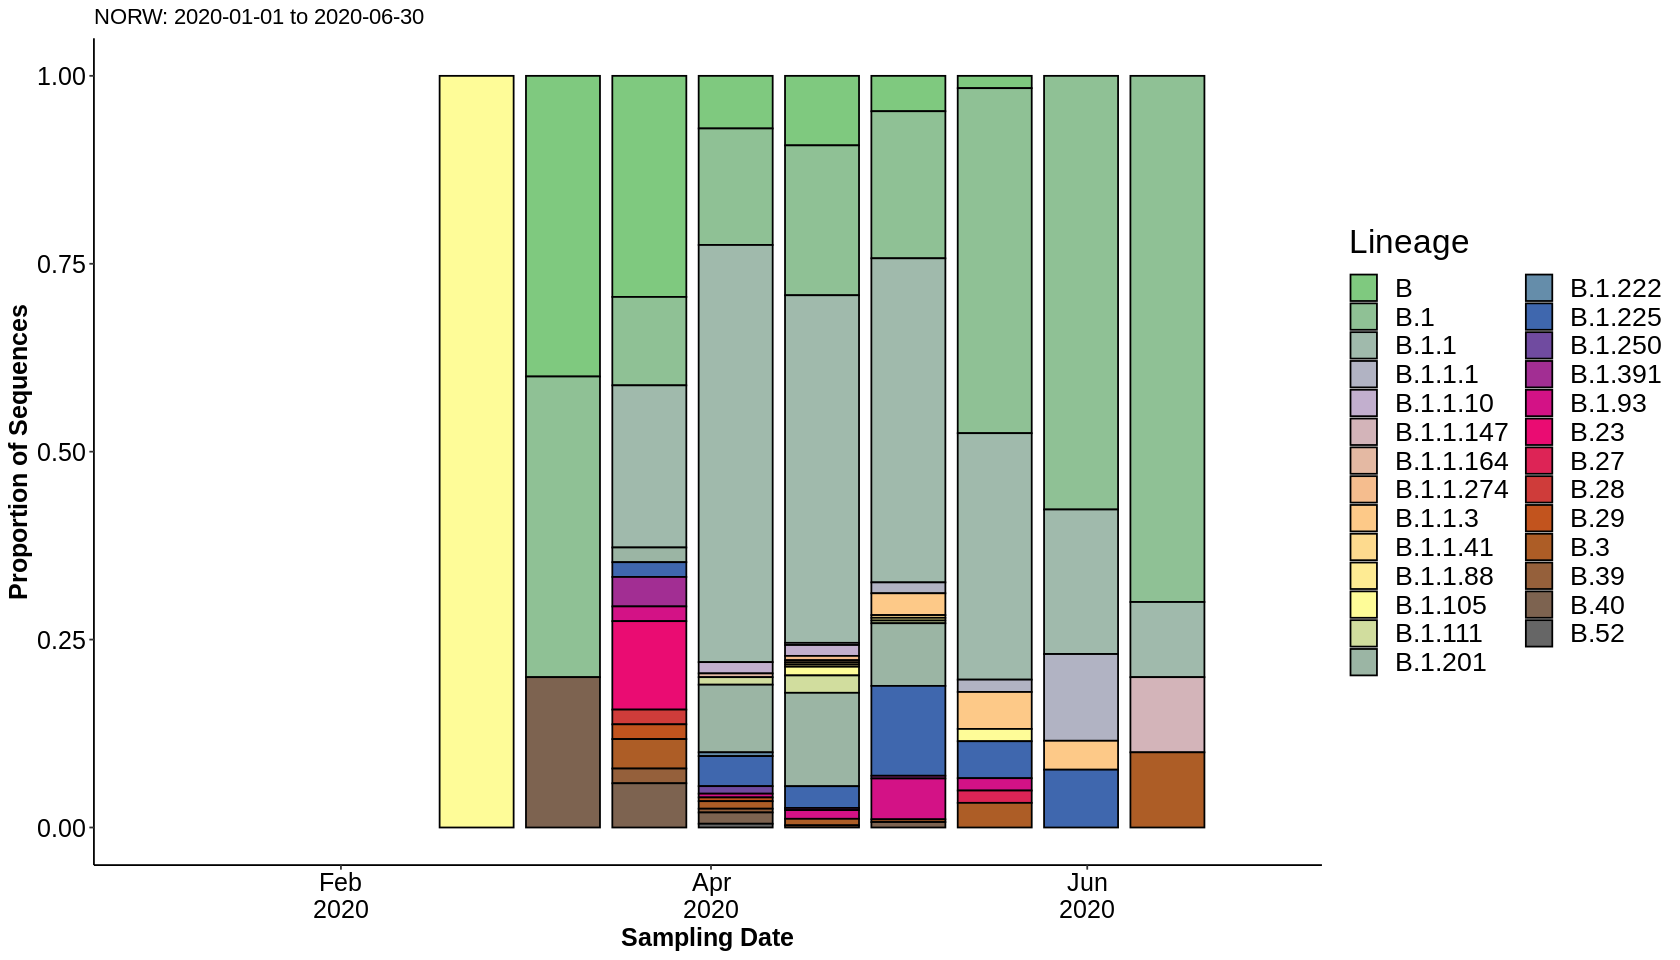

Warning message:
“Removed 5 rows containing missing values (geom_bar).”


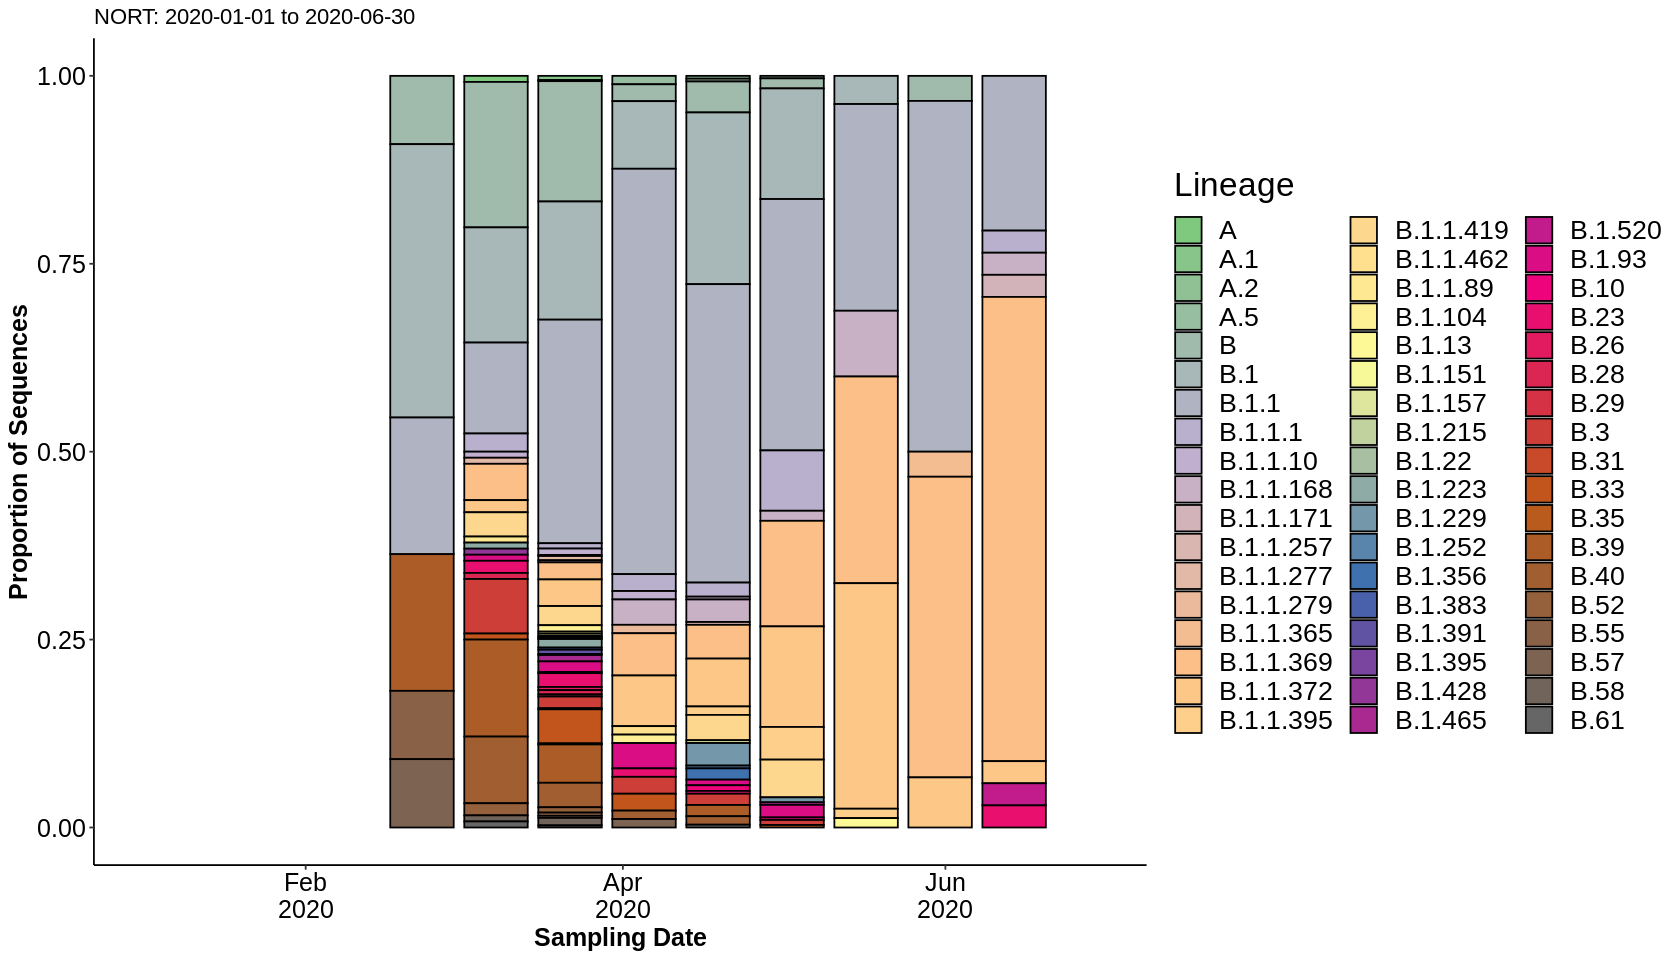

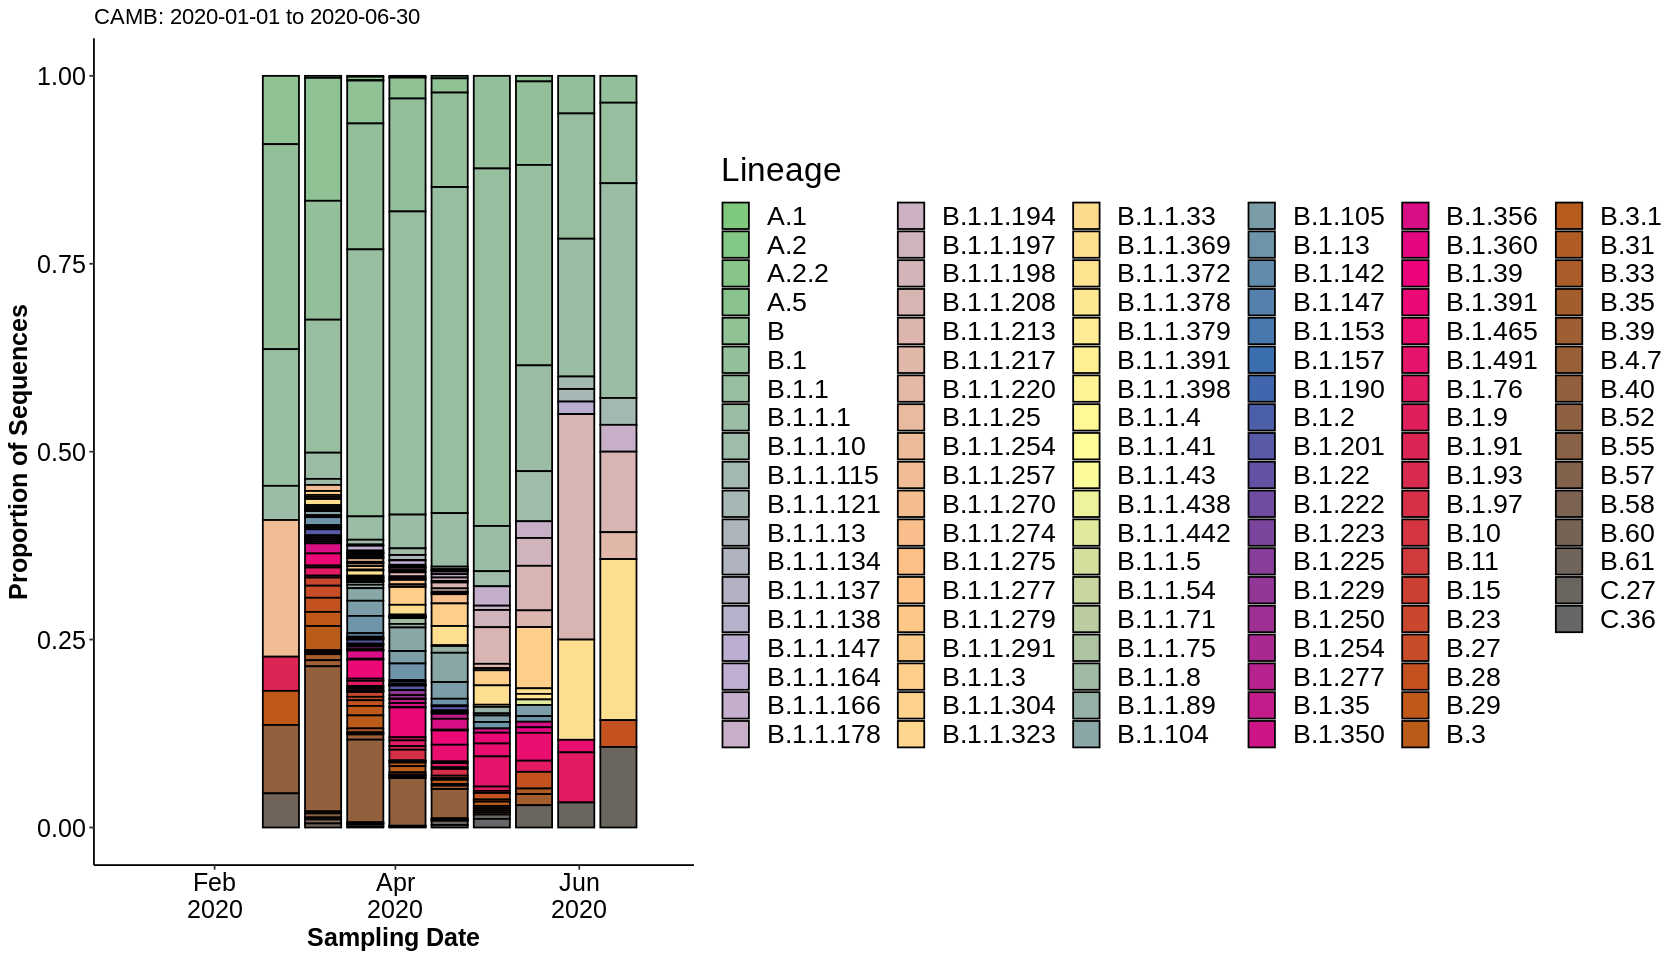

In [17]:
plot_lineage_contributions("2020-01-01", "2020-06-30", "NORW") 
plot_lineage_contributions("2020-01-01", "2020-06-30", "NORT") 
plot_lineage_contributions("2020-01-01", "2020-06-30", "CAMB") 

The above plot shows what proportion of samples are of each lineage, at 2-week granularity.  

For NORW, The very first samples sequenced are all B.1.105.  Later on, B, B.1, and B.1.1 become the most common lineages, with B.1.1 being the most common lineage at the peak, and B.1 the most common by the end of the time period.  B is negligible by the end.

For NORT, B.1 is the most common lineage at the start (mid-February) but almost disappears by the end of May.  B.1.1 is most common at the peak, and remains one of the most common lineages throughout the time.  B is the most common lineage for the second interval, but disappears almost completely by the end of May.  B.1.1.369 increases over time starting from the end of April, becoming one of the most common by the end of June.

For CAMB, though there are many lineages present in small numbers, B.1.1 is clearly the most abundant of all the lineages for the first wave, being present in high proportion throughout the time period and making up 40-45% of all CAMB sequences in April and May.

So, though the codes with more sequences had more lineages than the codes with less, the major lineages were the same for all three codes, and in general only minority and very rare lineages were missed by sequencing less.

Even though the time frame and sample size are small, and VOCs haven't come around yet, you can still see mini wave patterns for lineages that rise and fall.  The sample size is little enough that this has to be taken with a grain of salt though: it doesn't necessarily mean that those lineages that became more common for a time were necessarily more fit than their counterparts.  It could be that for that time period, maybe infection clusters were sequenced, or that the sampling methods were biased in some other way; I'd have to look into it.  (The REACT study would be more reliable in terms of avoiding sampling bias.)

It is interesting to me that B.1.1 becomes most common by the end of June for each code, because the first VOC, Alpha/B.1.1.7, which is detected in autumn 2020, is descended from B.1.1.

A different view (counts rather than proportions) follows, showing the number of samples per lineage over two-week intervals.  There is not much that can be learned from these that can't be inferred from the two plots above, it's just another way to look at it (and easier to see that a lineage can be relatively very common at the tail ends of the peak but in reality be almost nothing).

Warning message:
“Removed 2 rows containing missing values (geom_bar).”


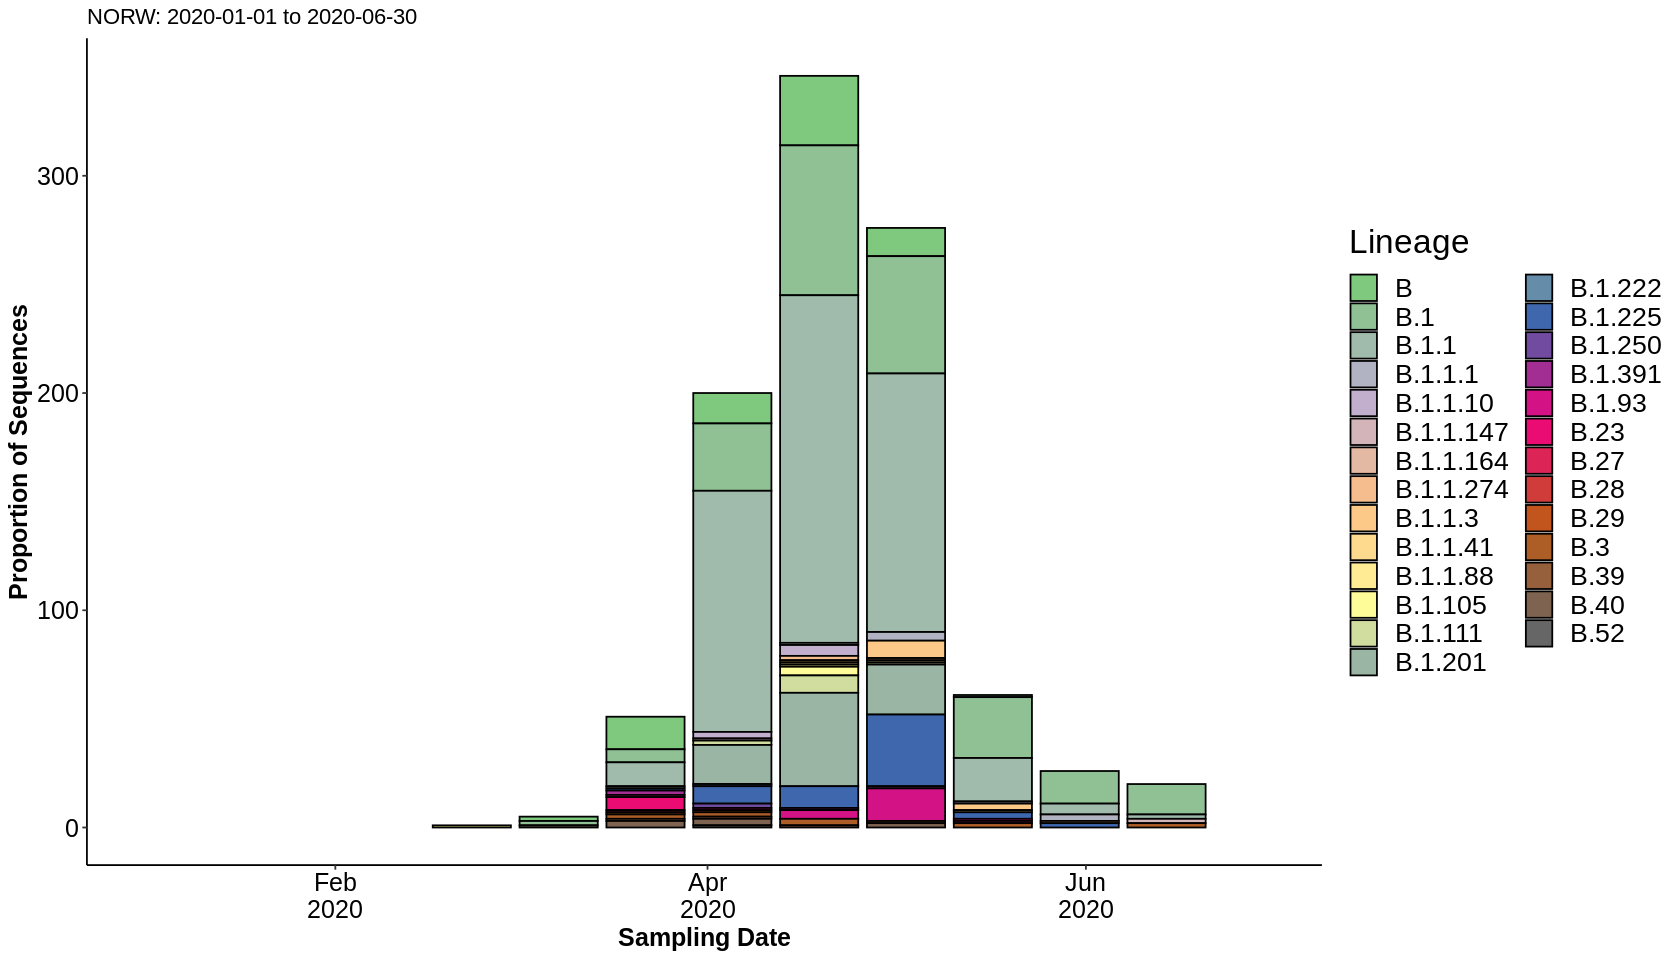

Warning message:
“Removed 5 rows containing missing values (geom_bar).”


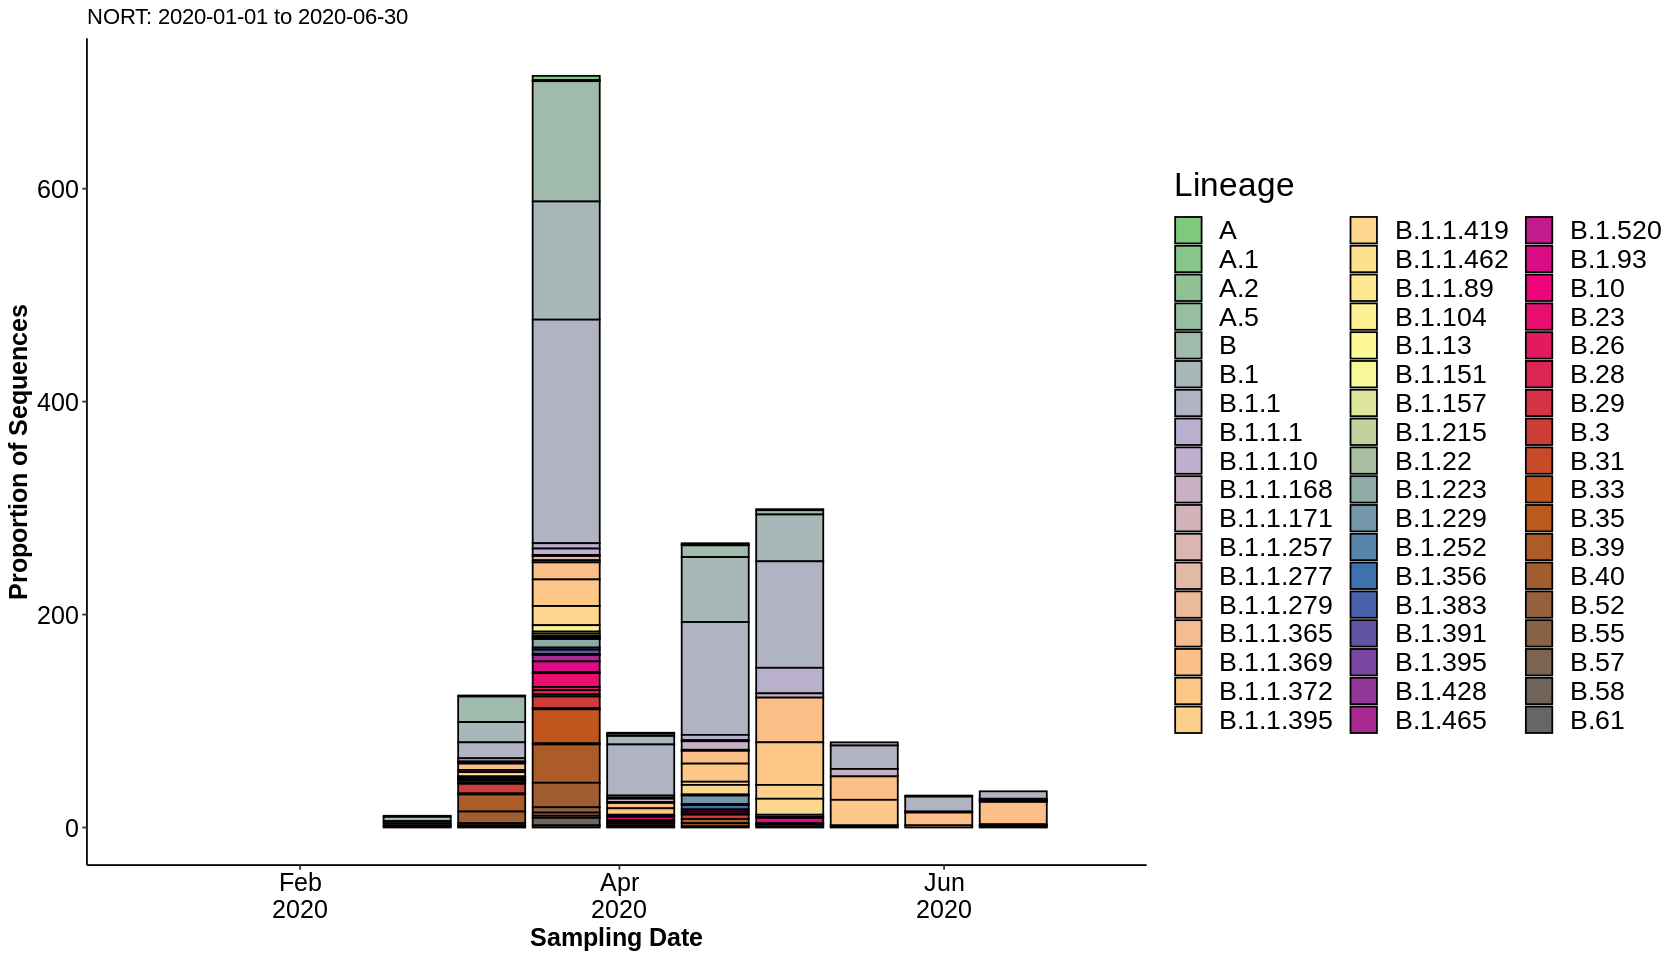

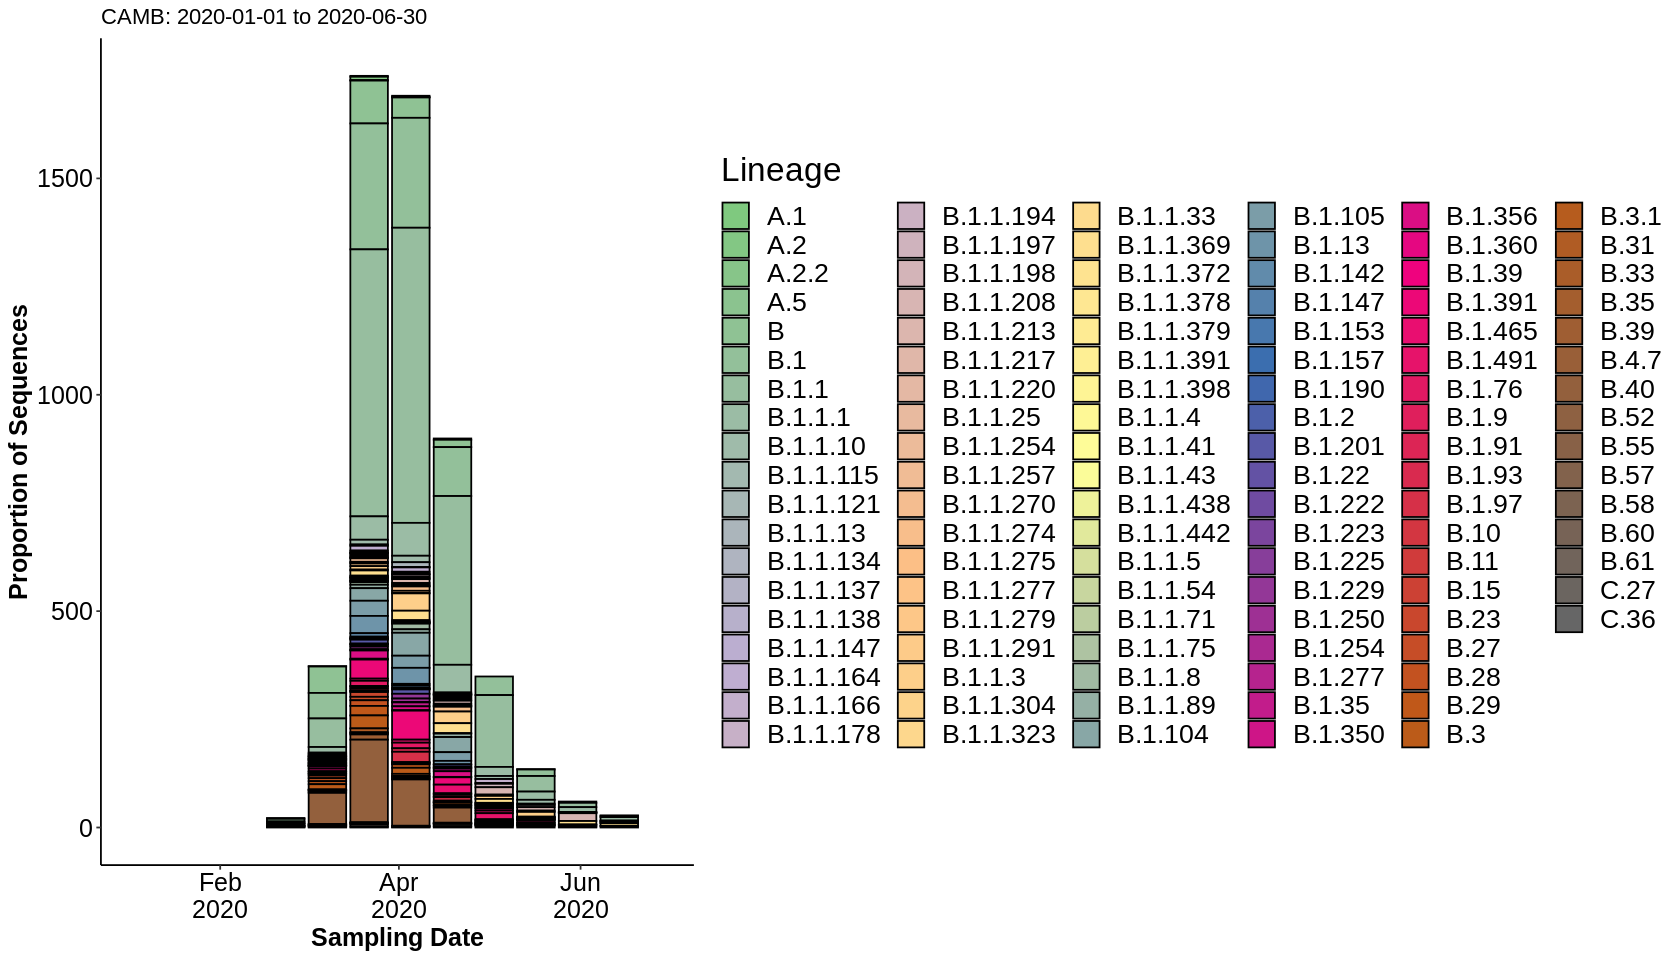

In [18]:
plot_lineage_counts_2w("2020-01-01", "2020-06-30", "NORW")
plot_lineage_counts_2w("2020-01-01", "2020-06-30", "NORT")
plot_lineage_counts_2w("2020-01-01", "2020-06-30", "CAMB")

**Before going on to look at some trees, I wanted to compare the diversity for these three codes to the last six months of the pandemic, when Delta and Omicron were present.**  Does more sequencing equal a more diverse dataset when highly transmissible VOCs, not wild type SARS-CoV-2, are circulating?

**September 1, 2021 to February 28, 2022**

[1] "NORW total seqs: 20770"
[1] "NORT total seqs: 37792"


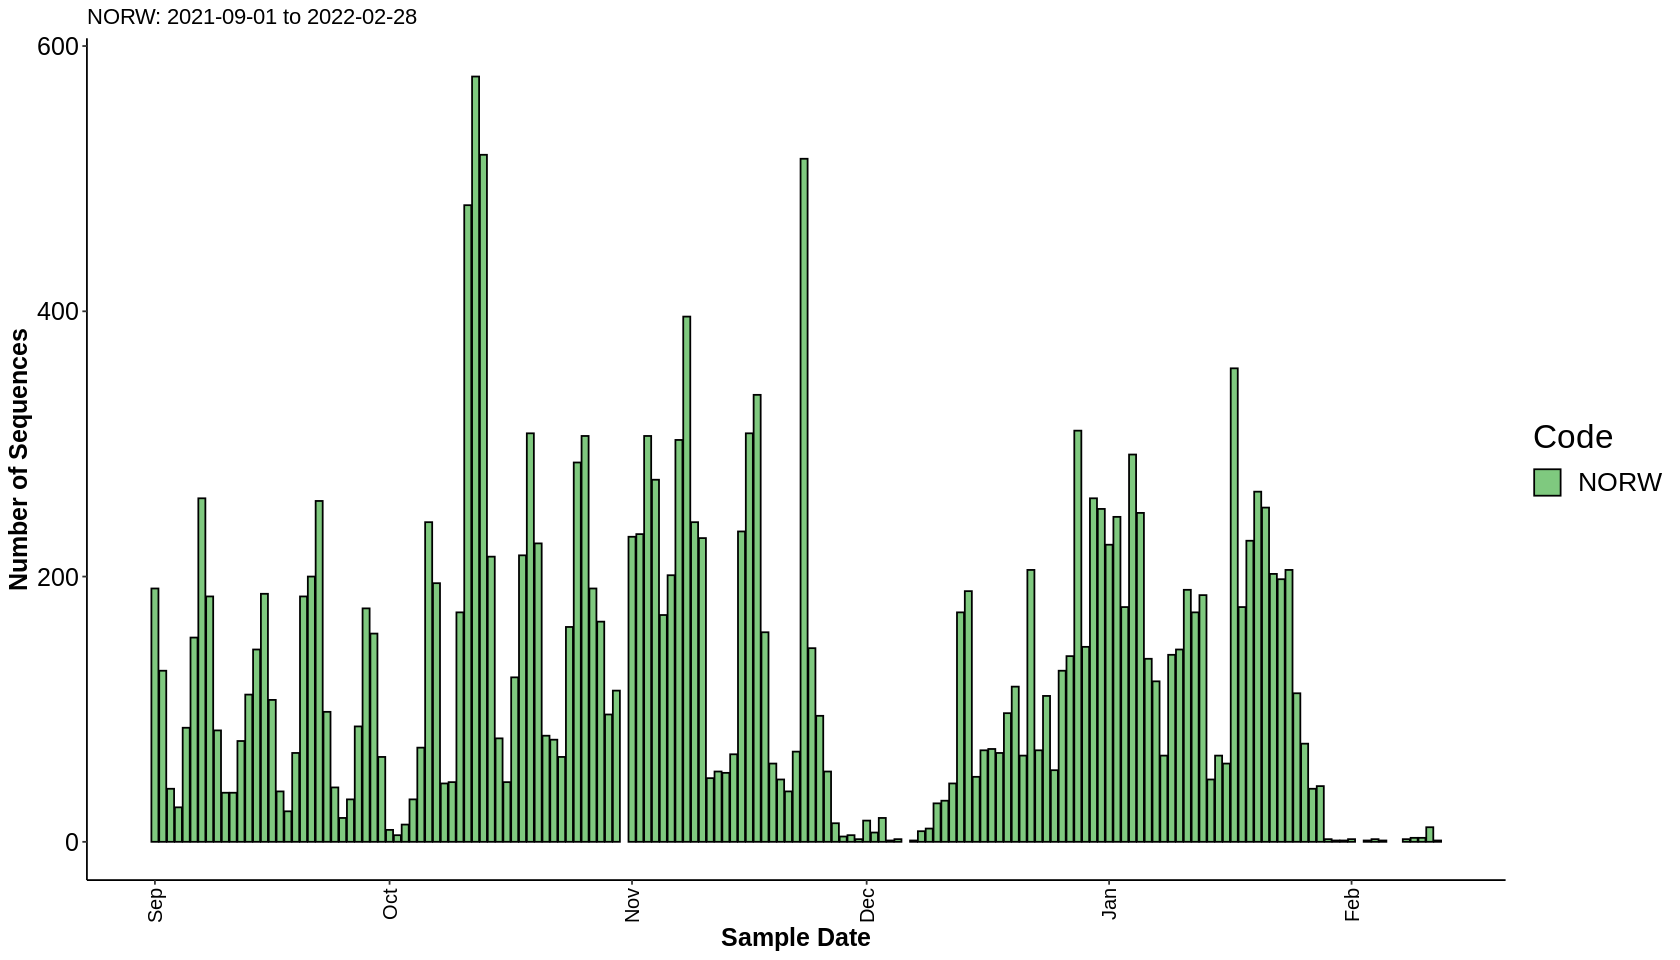

[1] "CAMB total seqs: 27"


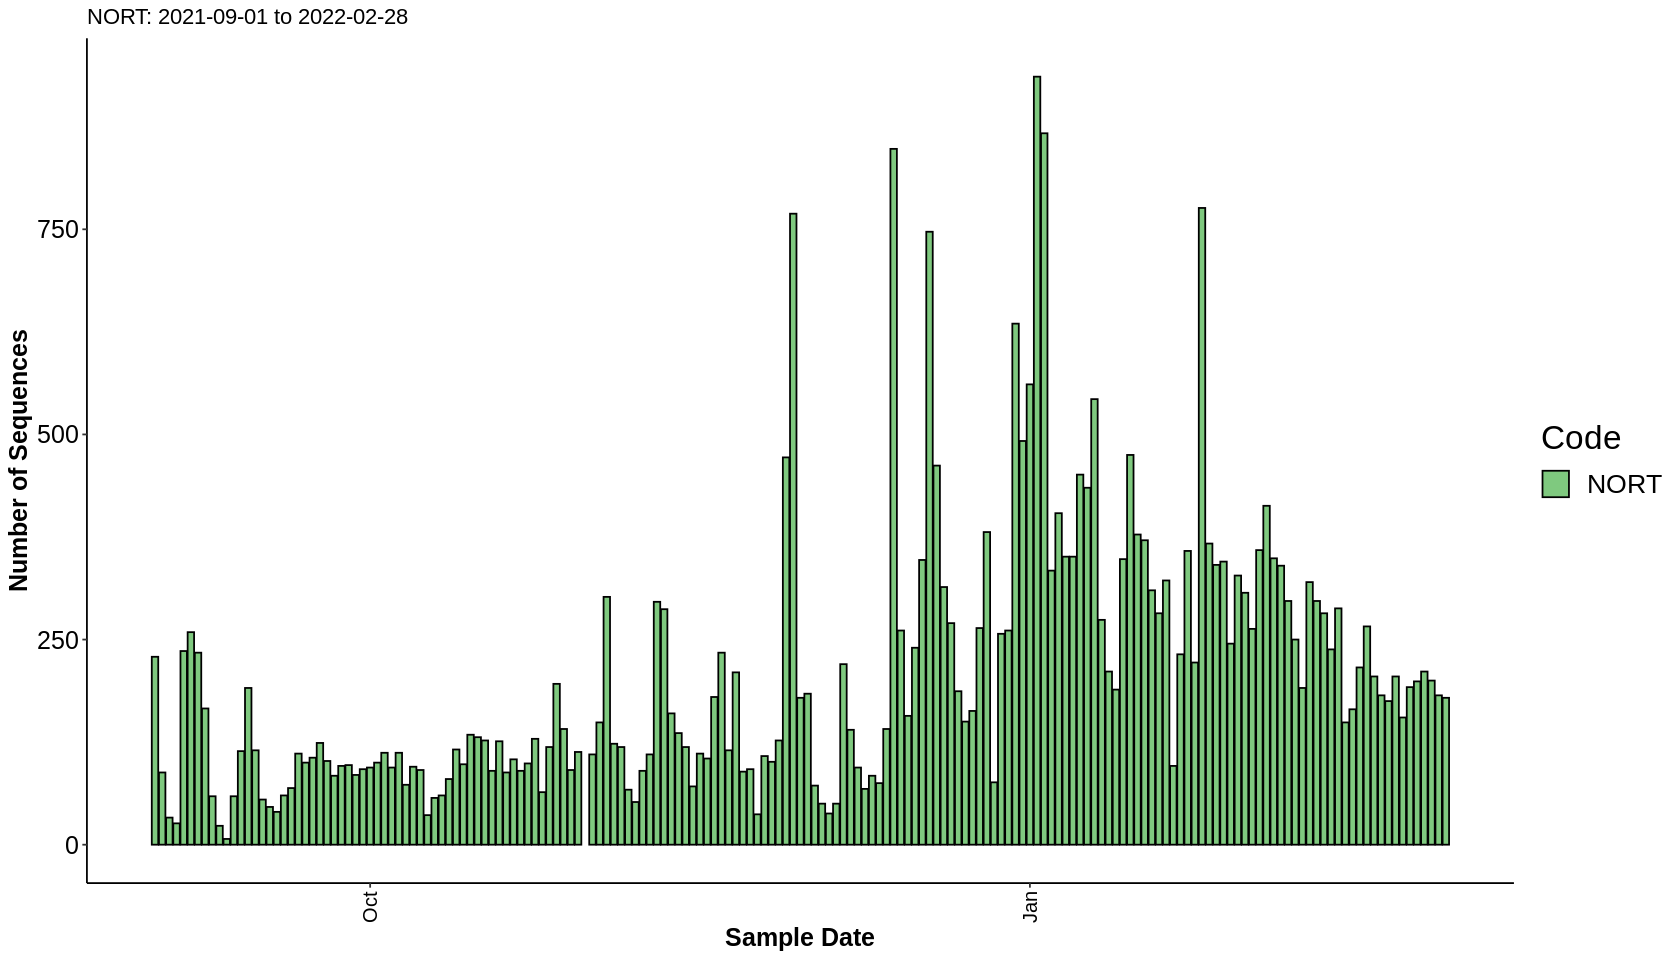

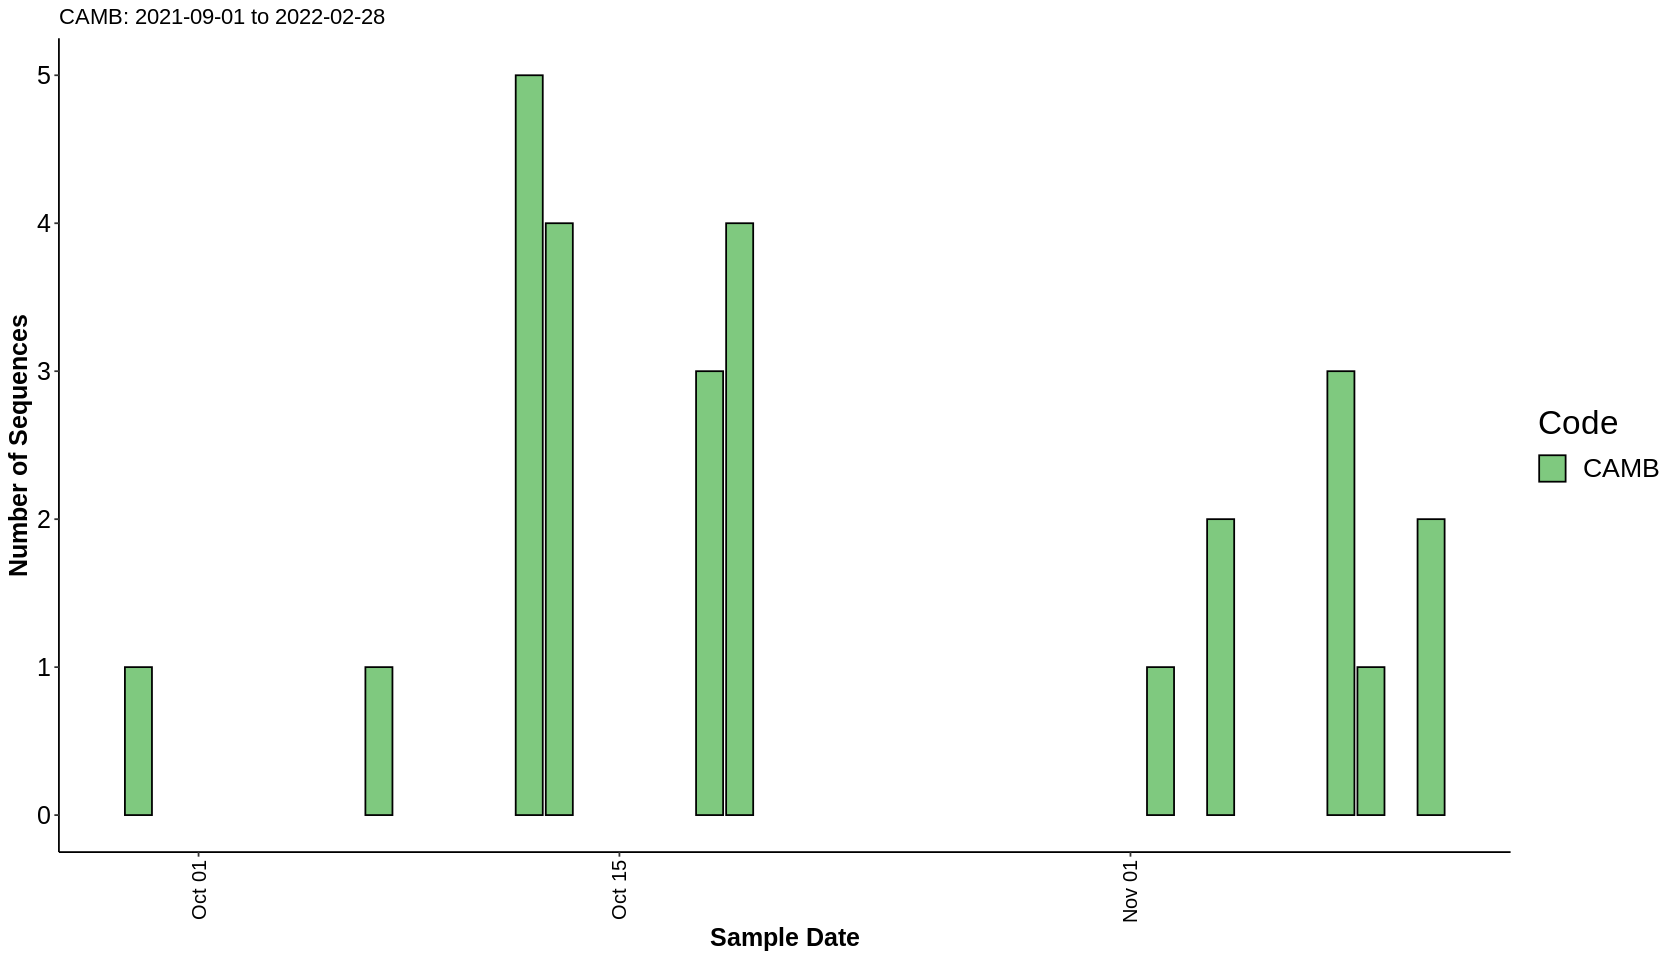

In [19]:
plot_sample_counts("2021-09-01", "2022-02-28", "NORW")
plot_sample_counts("2021-09-01", "2022-02-28", "NORT")
plot_sample_counts("2021-09-01", "2022-02-28", "CAMB")

Looks like CAMB samples are few and far between for the end of the pandemic, so I'll ignore CAMB for this part and focus on NORT and NORW.  For this time period, NORT has ~40k sequences and NORW has ~20k, far more than what was available for the first wave, but NORT = ~2x NORW as before.  What lineages are there now?

[1] "NORW: 108 unique lineages"
[1] "NORT: 100 unique lineages"


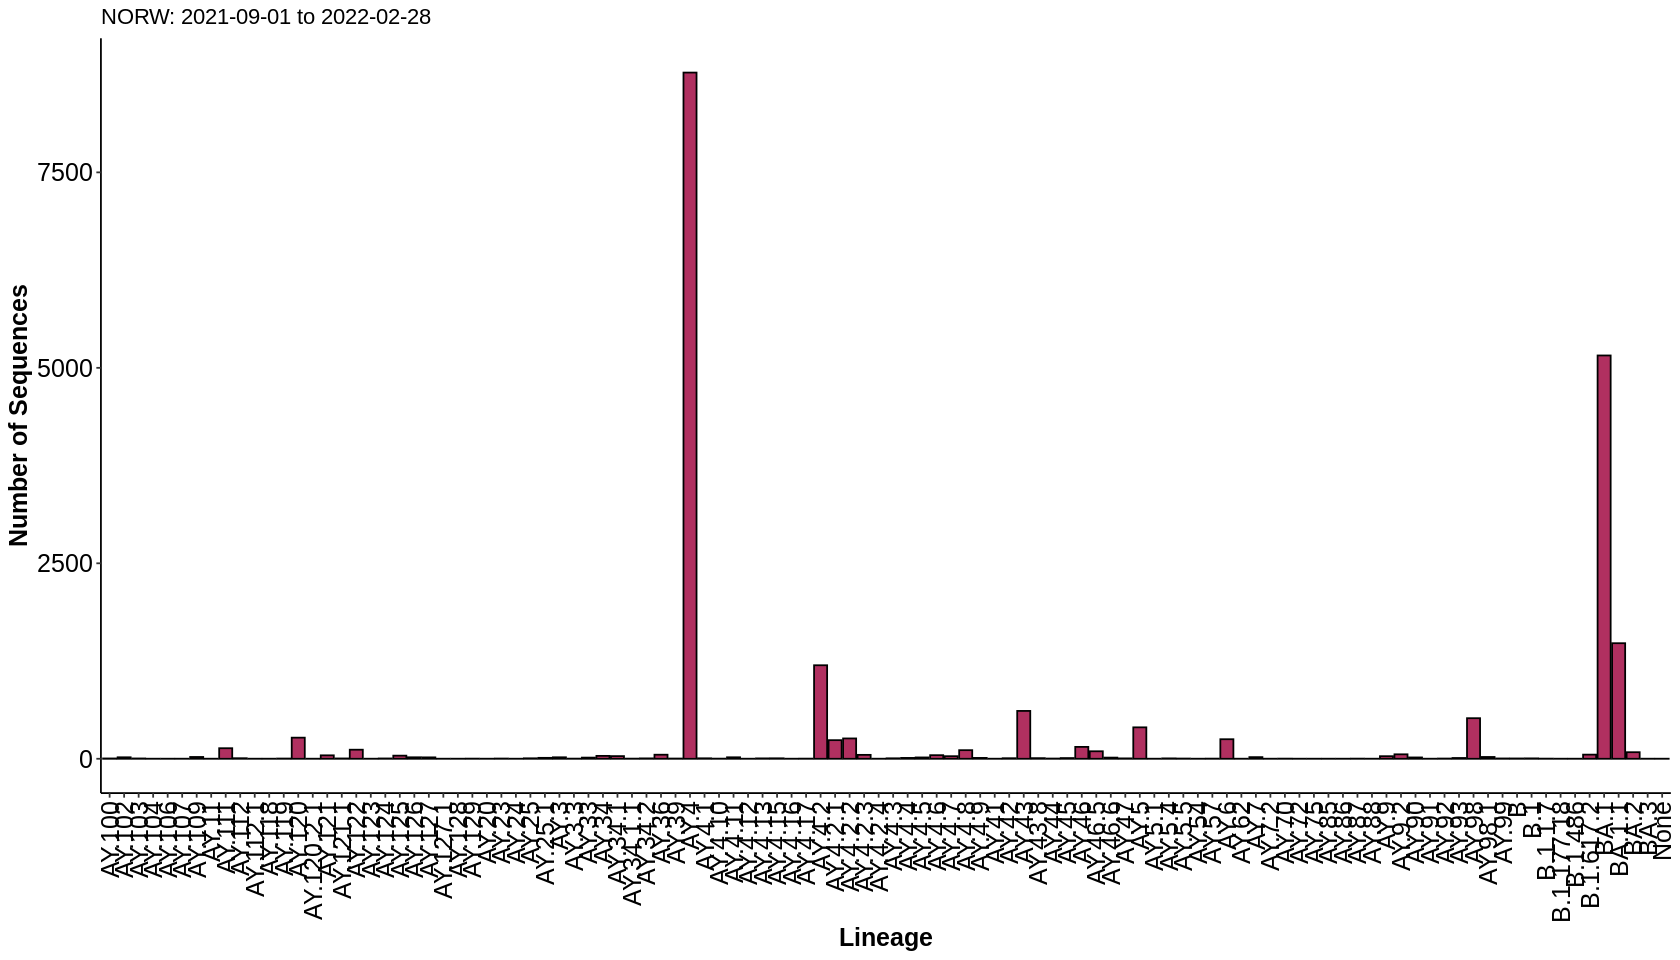

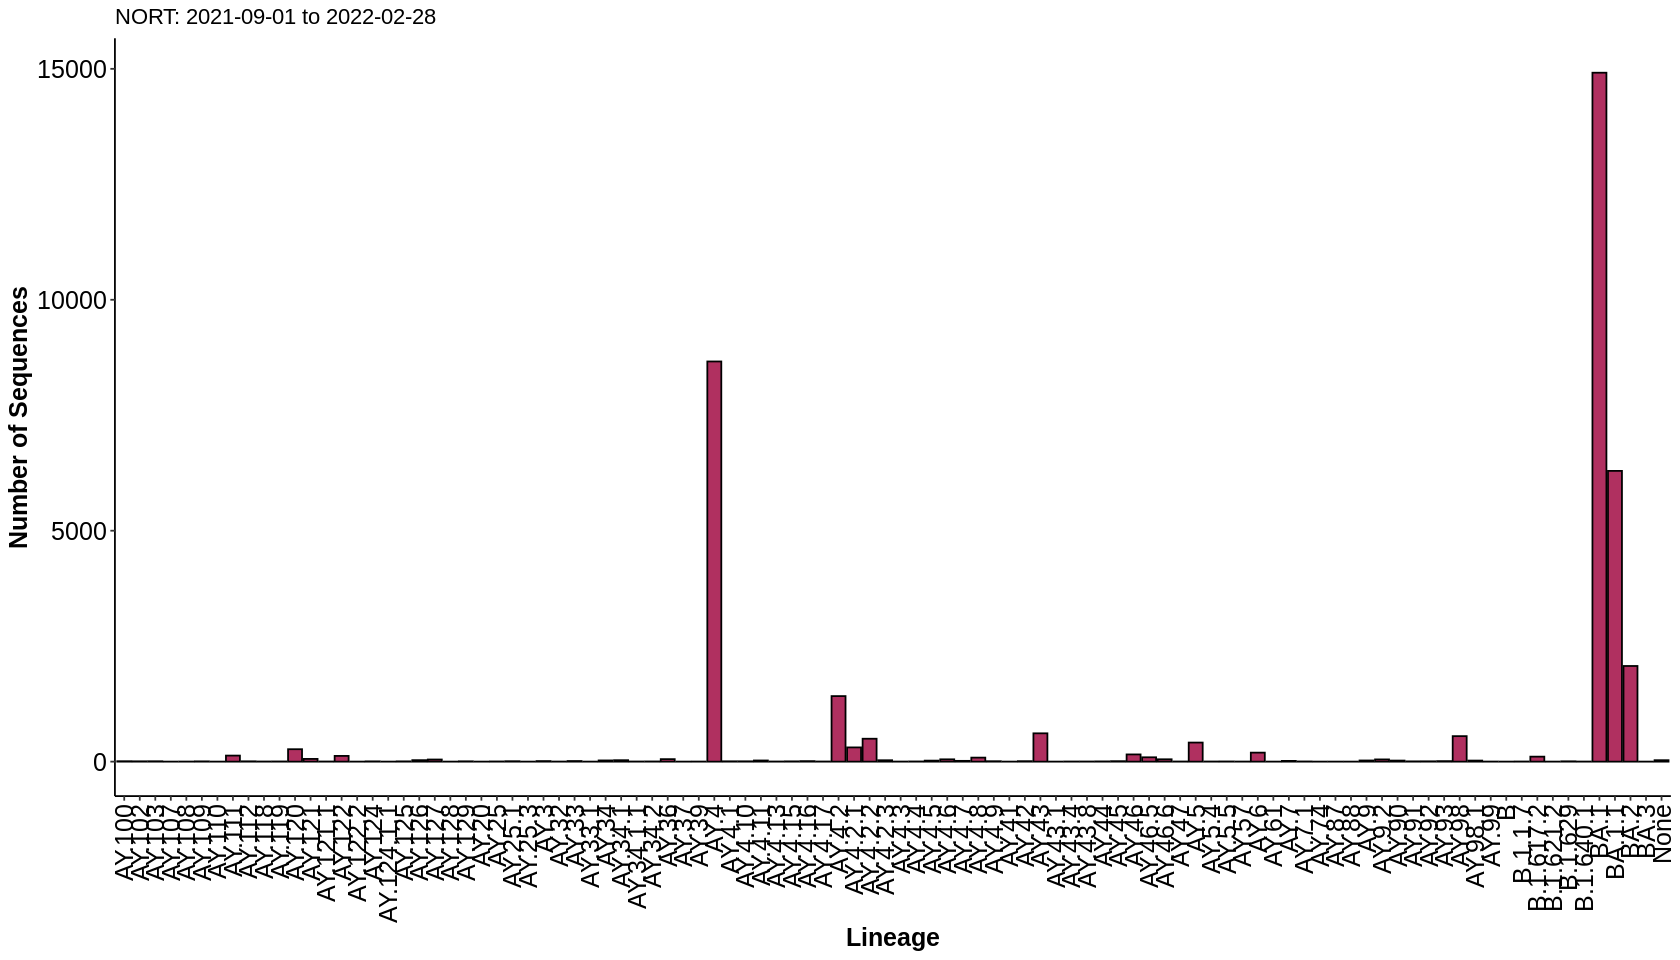

In [20]:
plot_lineages("2021-09-01", "2022-02-28", "NORW")
plot_lineages("2021-09-01", "2022-02-28", "NORT")

Over the last six months of the pandemic, it looks like everything is Delta and Omicron.  Despite having twenty times as many samples for NORW as there were from the first wave, three lineages still dominate immensely compared to the rest: this time, it's BA.1 and AY.4.  The next two most abundant lineages are shared between the codes as well: BA.1.1 and AY.4.2.  NORT actually has BA.2 as its fourth-most-abundant, but this is due to NORT sequences being available into the second half of February where NORW sequences stop in the first half.

NORT has 100 unique lineages this time, and NORW has 108, despite there being twice as many NORT samples.  In this case, more sequencing didn't actually result in more sample diversity.

Warning message:
“Removed 386 rows containing non-finite values (stat_count).”
Warning message:
“Removed 48 rows containing missing values (geom_bar).”
Warning message:
“Removed 376 rows containing non-finite values (stat_count).”
Warning message:
“Removed 50 rows containing missing values (geom_bar).”


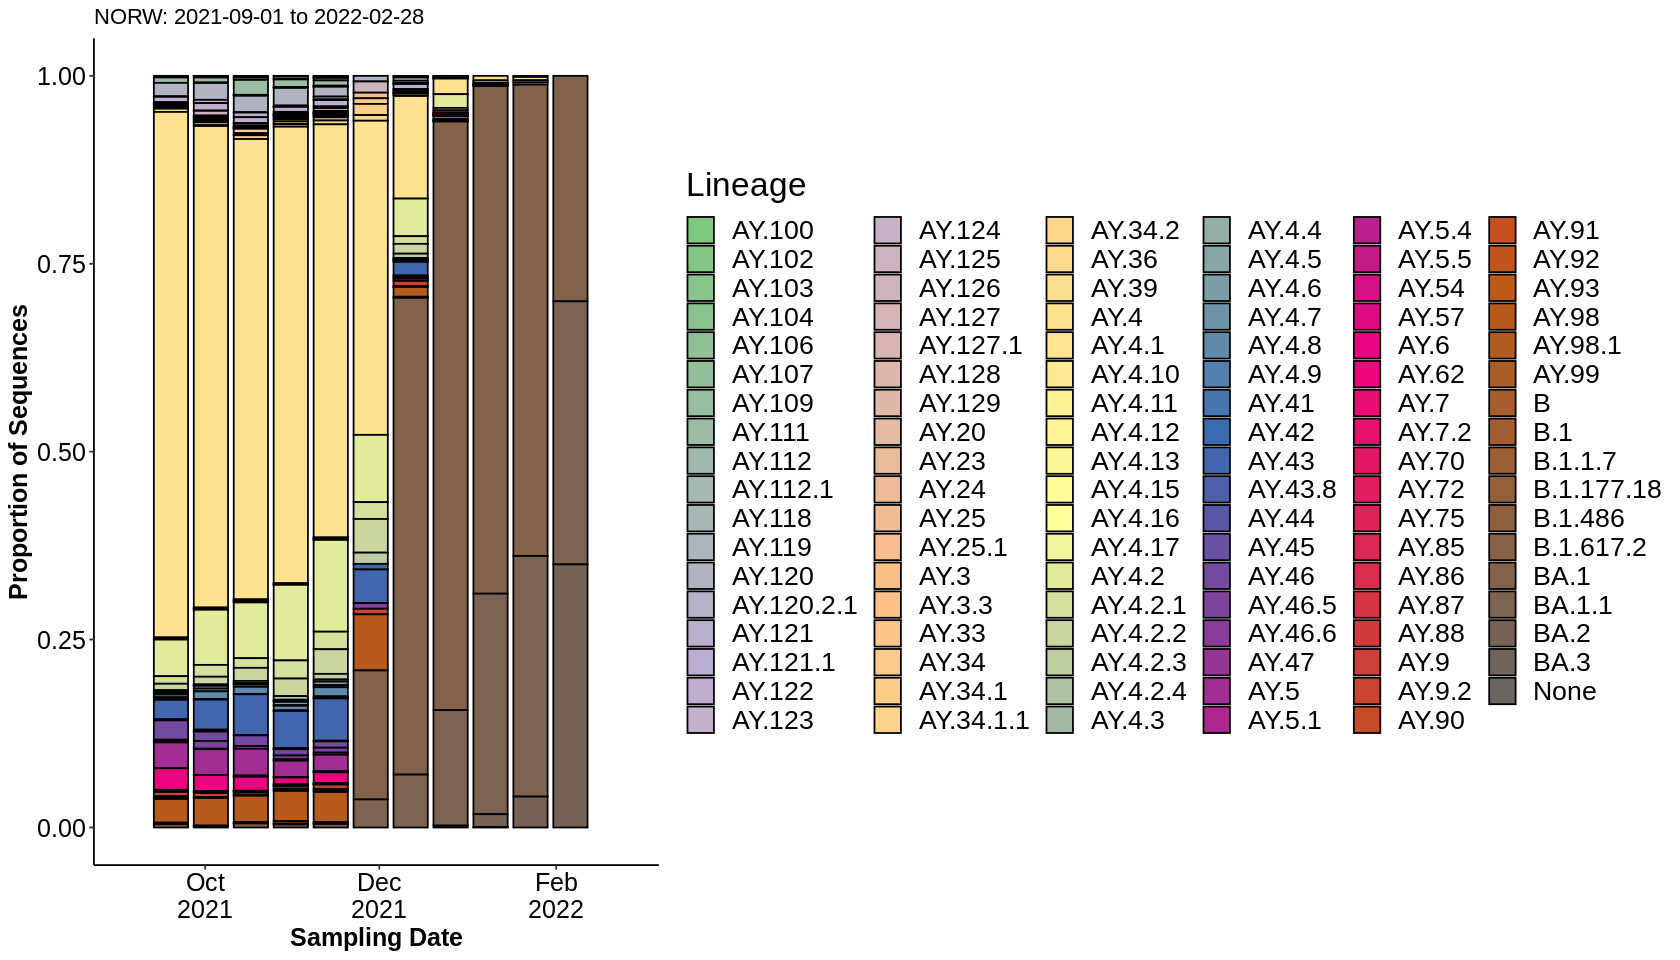

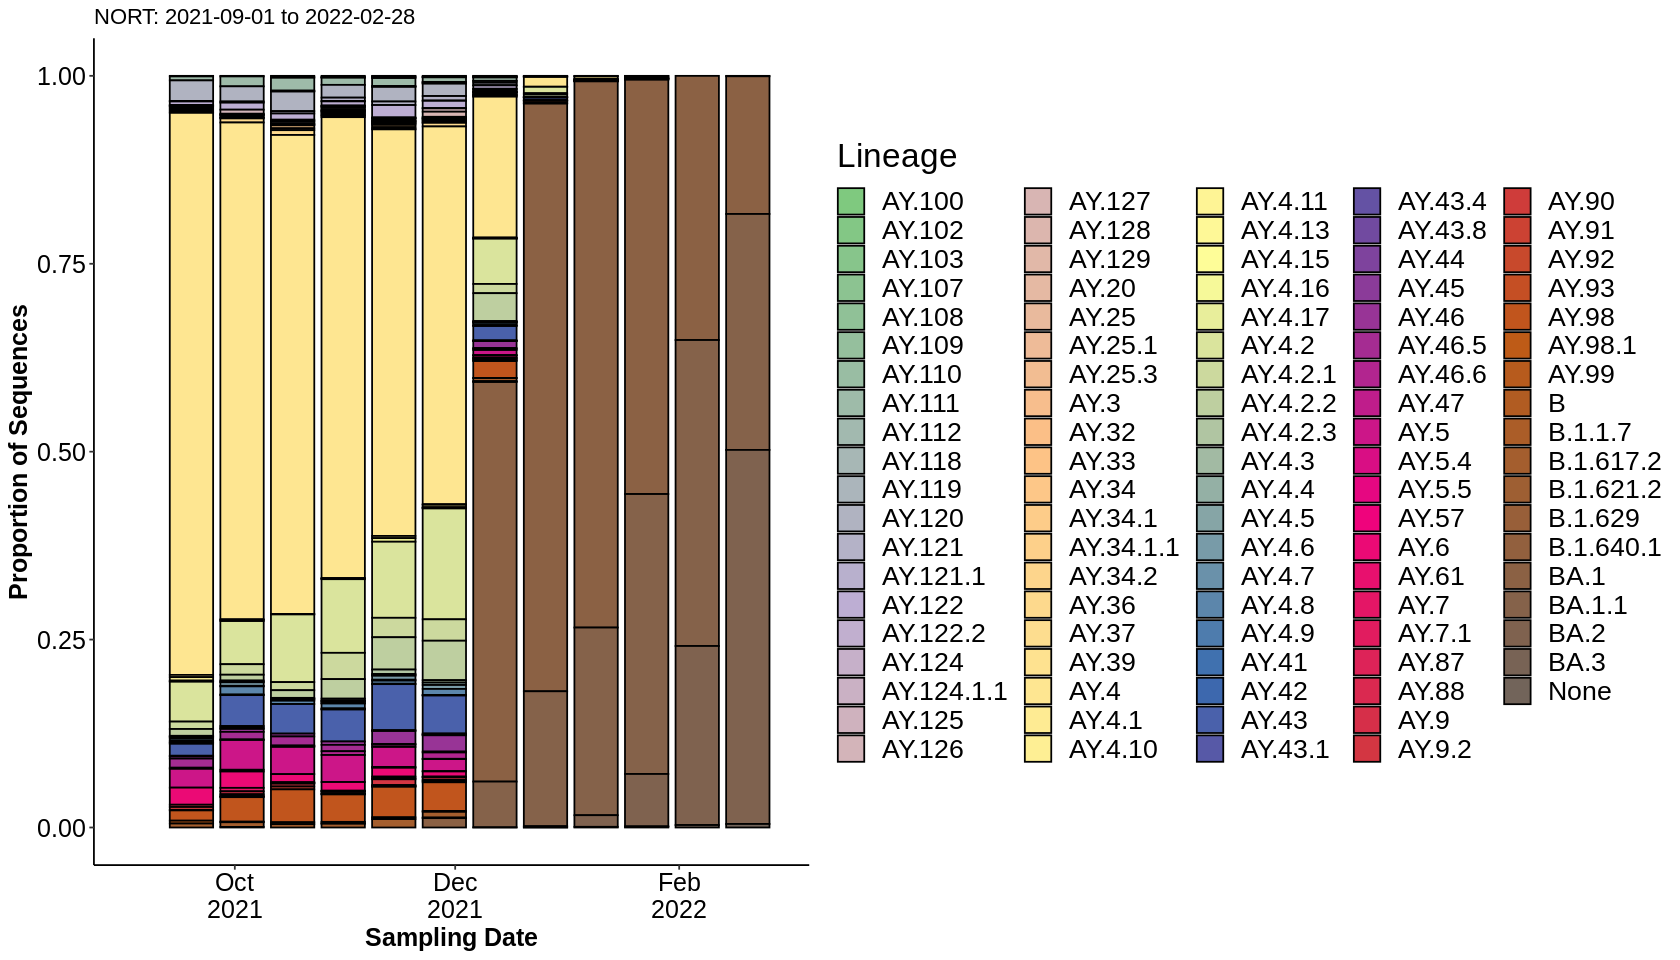

In [21]:
plot_lineage_contributions("2021-09-01", "2022-02-28", "NORW") 
plot_lineage_contributions("2021-09-01", "2022-02-28", "NORT") 

For both NORT and NORW, AY.4 is the most common lineage from September to December, when BA.1 emerges and rapidly takes over.  AY.4.2 was increasing in prevalence until the emergence of BA.1, then quickly got snuffed out.  At the beginning of December, BA.1.1 shows up and quickly becomes the second most common lineage, increasing steadily until BA.2 emerges in January.

**Based on these two timeframes, and these three codes: does more sequencing necessarily mean more diversity?**

Just based on this small investigation so far, the answer is: it depends what variants are out there.  If a highly transmissible VOC like Omicron is what's circulating, there will be low viral diversity overall in the population (since Omicron took over everything), and more sequencing is unlikely to show more diversity.

In comparison, during the first wave, sequencing more did result in a wider variety of lineages being detected, but most of the additional lineages that were found were relatively uncommon.  (MRI: It might be good to check if any of those rarer lineages did survive and increase over the summer/fall.)

In both timeframes, NORW, NORT and CAMB all had the same major lineages in a similar distribution compared to the other lineages (with B.40 as the only significant exception), despite having very different numbers of samples available.

# Maximum likelihood trees for NORW from 2020-01-01 to 2020-06-30

For now, the trees have only been created for NORW.  This time period covers 986 samples.  Here they are as an unrooted maximum likelihood tree, showing the similarities/relationships between the samples:

``(base) ubuntu@madeline-01:~/nf-test/sequencing_centre_trees``$`` nohup nextflow run sequencing_centre_trees.nf --start_date "2020-01-01" --end_date "2020-06-30" --diverseQueries false --centre "NORW" --max_samples_per_month false``

``executor >  local (9)
[9c/5c73af] process > chooseSamples (1)        [100%] 1 of 1 ✔
[3f/91b862] process > getFastaRecords (1)      [100%] 1 of 1 ✔
[be/95bb93] process > maskProblematicSites (1) [100%] 1 of 1 ✔
[cc/89715c] process > removeWuhanHu1 (1)       [100%] 1 of 1 ✔
[-        ] process > reduceQueries            -
[9c/46b7f2] process > buildFastTree (1)        [100%] 1 of 1 ✔
[b4/37198f] process > refineTree (1)           [100%] 1 of 1 ✔
[8e/8155f0] process > runPangolin (1)          [100%] 1 of 1 ✔
[ab/dd0377] process > getCOGUKMetadata (1)     [100%] 1 of 1 ✔
[e3/ca6bd1] process > joinMetadata (1)         [100%] 1 of 1 ✔
Completed at: 28-Mar-2022 22:36:52
Duration    : 11h 25m 26s
CPU hours   : 14.1
Succeeded   : 9
``

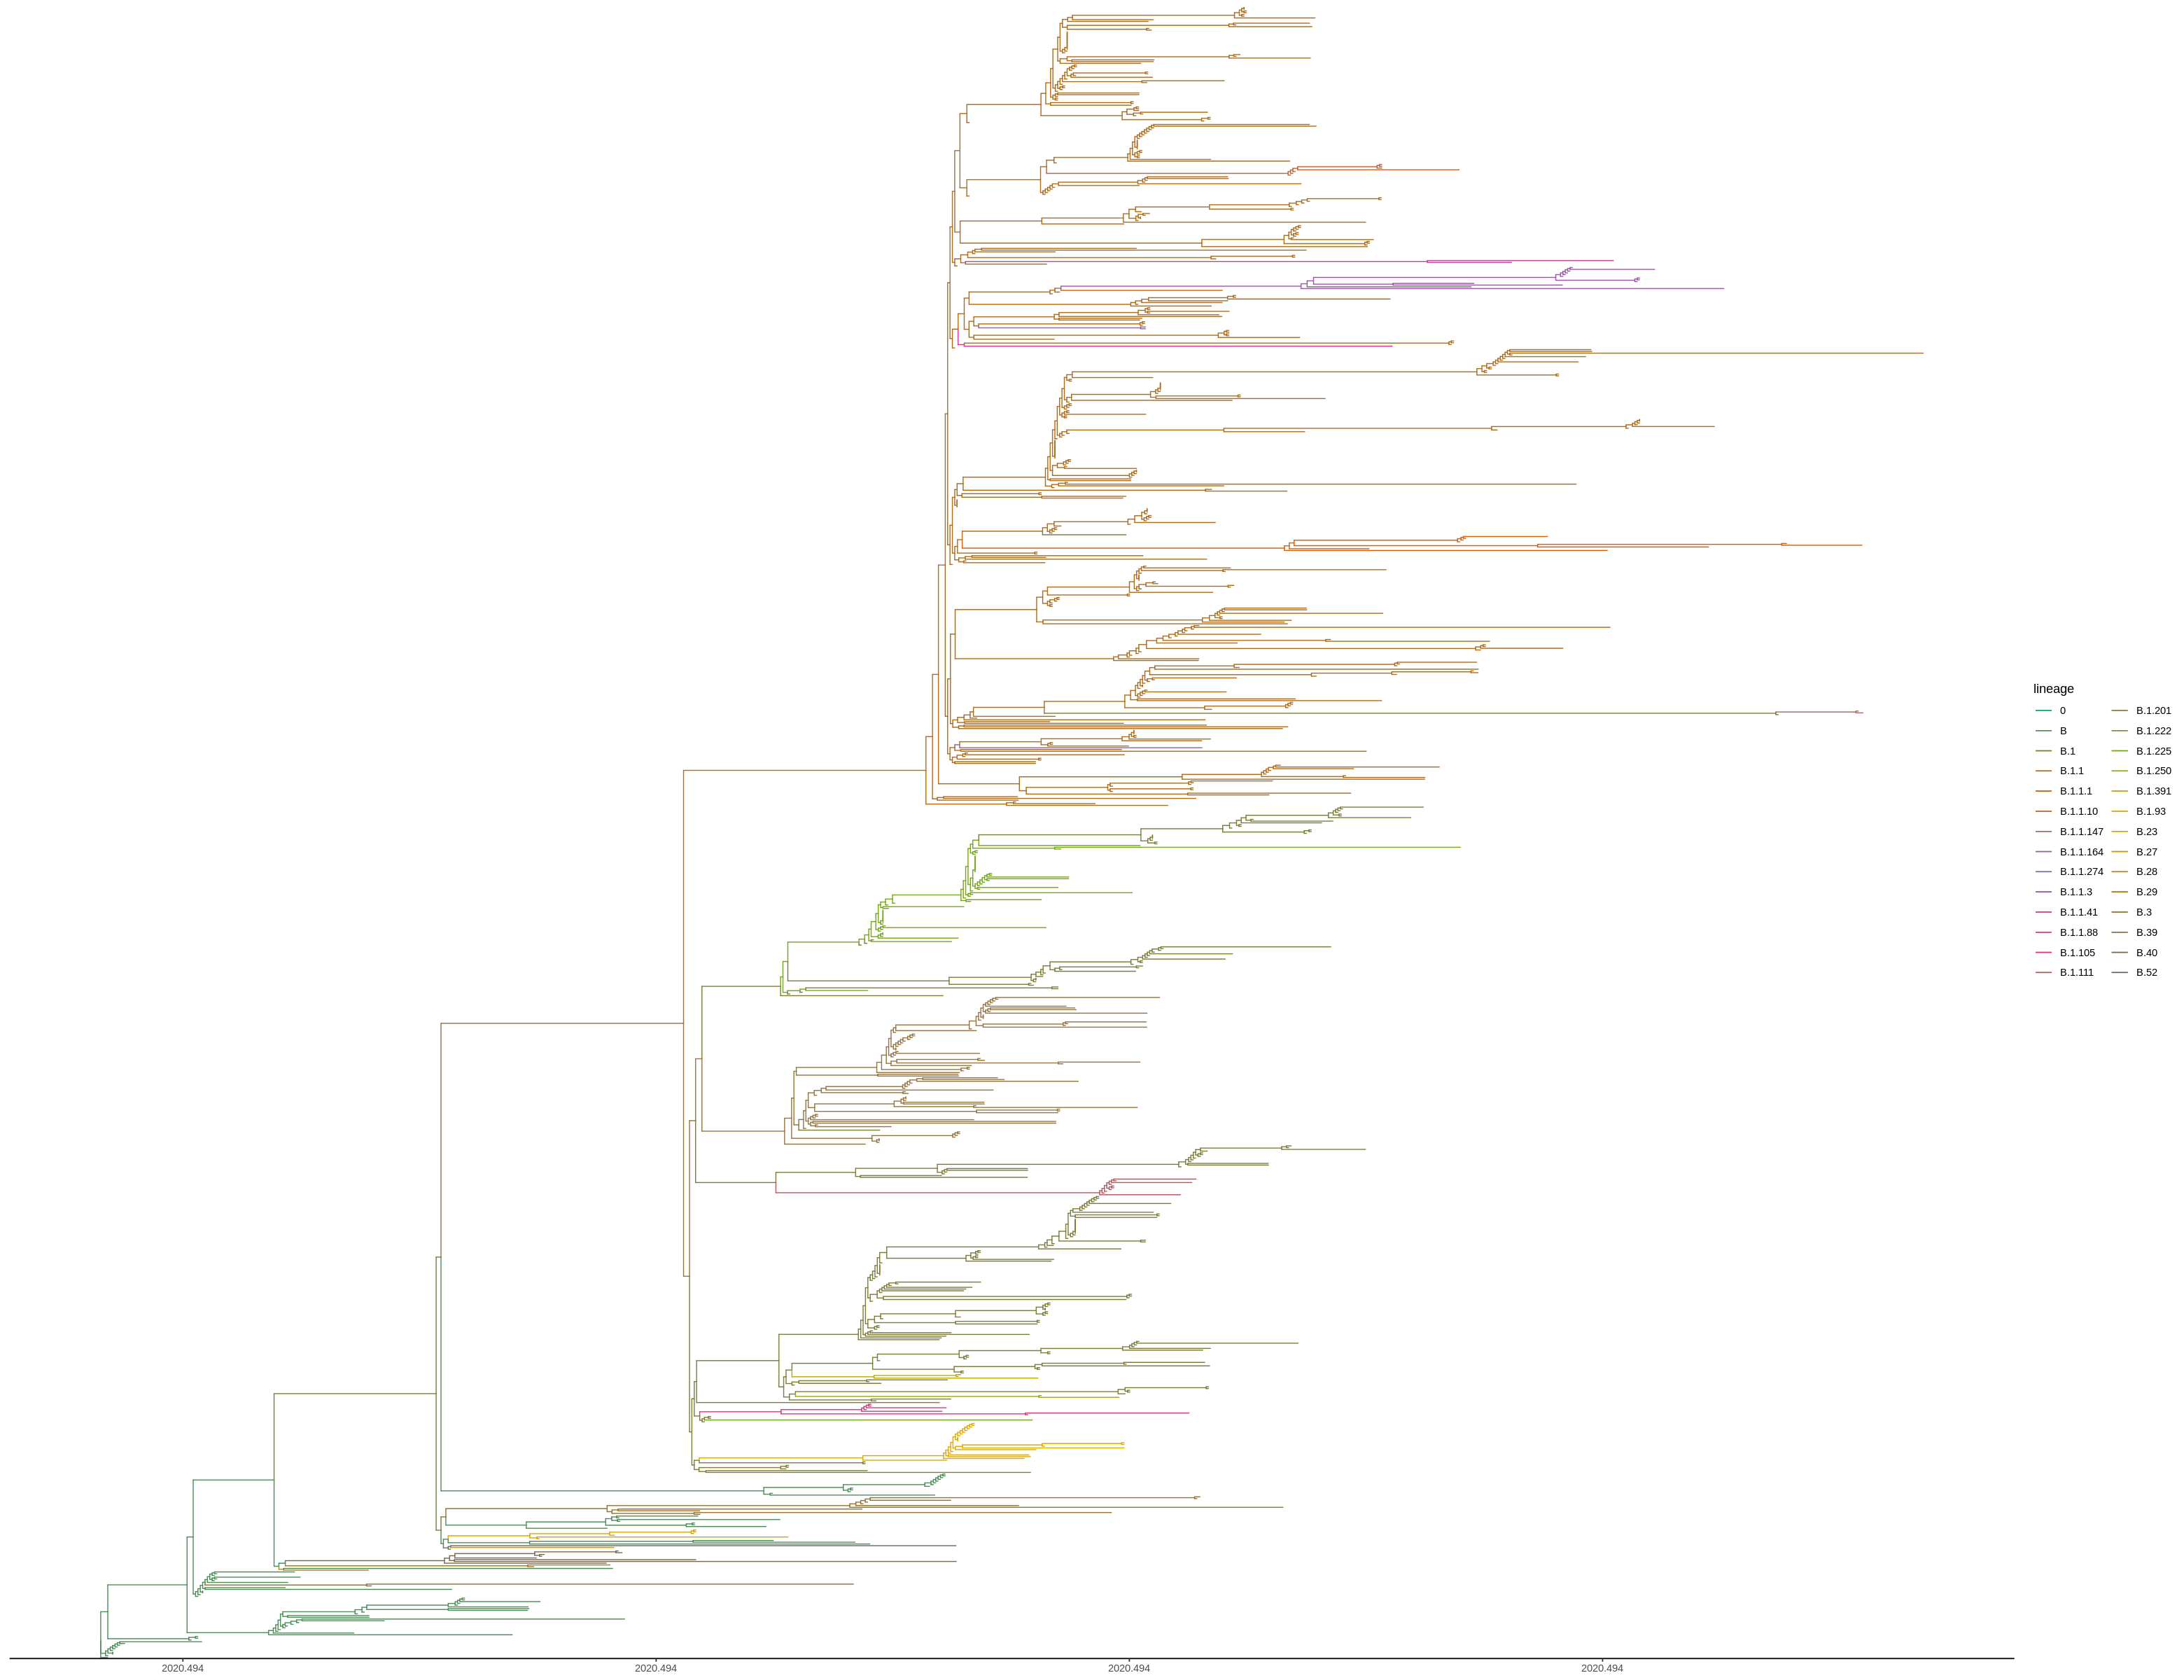

In [22]:
plot_tree_by_factor("full_timeframe/reformatted.aln.treefile", "full_timeframe/metadata_reformatted.csv", "lineage", "newick", "2020-06-30")

**Treetime**

After running ``treetime`` with a relaxed clock on the data (without removing any outliers--I think it looks OK), this happens:

``ubuntu@madeline-01:~/nf-test/sequencing_centre_trees``$`` nohup treetime --aln underscores.aln --tree work/b4/37198fc91aae51e2df417b447449db/reformatted.aln.treefile --dates metadata_reformatted.csv --name-column sequence_name --date-column sample_date --relax 1.0 0 --clock-rate 0.008 --outdir timetree``

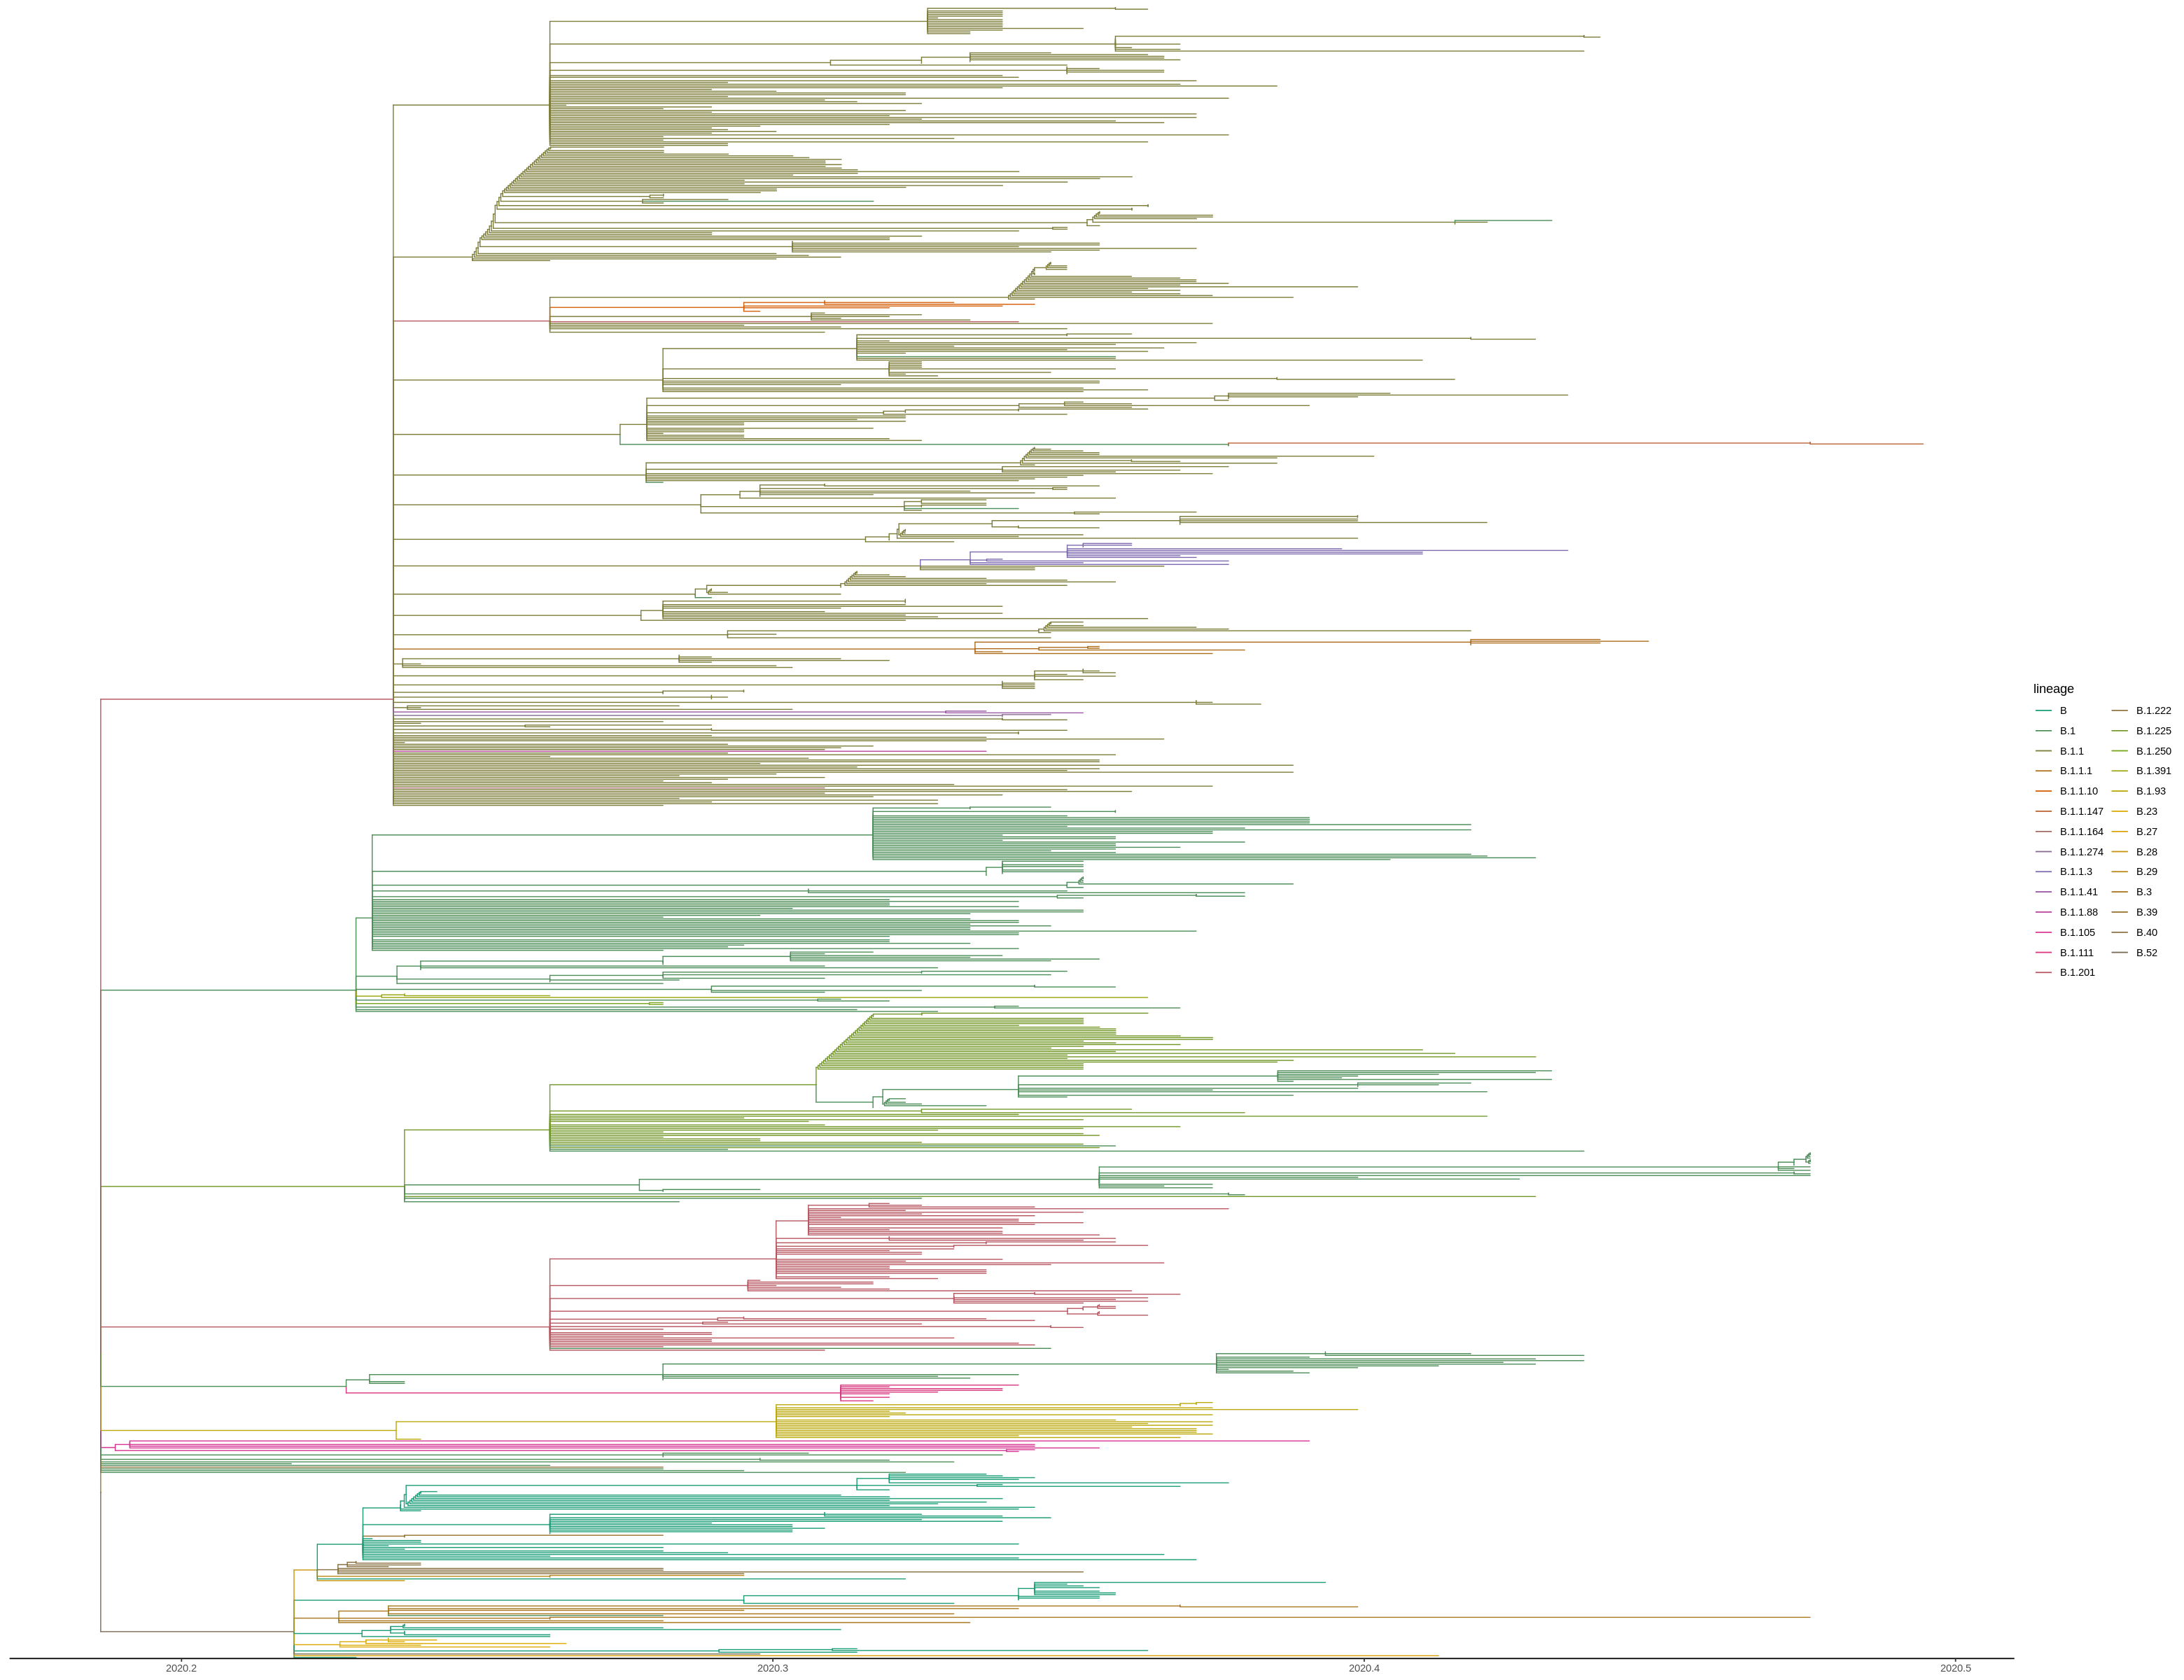

In [23]:
plot_tree_by_factor("full_timeframe/timetree.nexus", "full_timeframe/metadata_reformatted.csv", "lineage", "nexus", "2020-06-30")

This is an unrooted tree.  As expected, the B.1.1.* samples belong to the B.1.1 clade, and the other colors seem to cluster together nicely as well.  (Hooray!)

**A closer look at the B.1.225 clade**

B.1.225 has almost a mini-wave of its own inside the larger first wave in NORW.  What does it look like if I plot the subtree of just B.1.225?

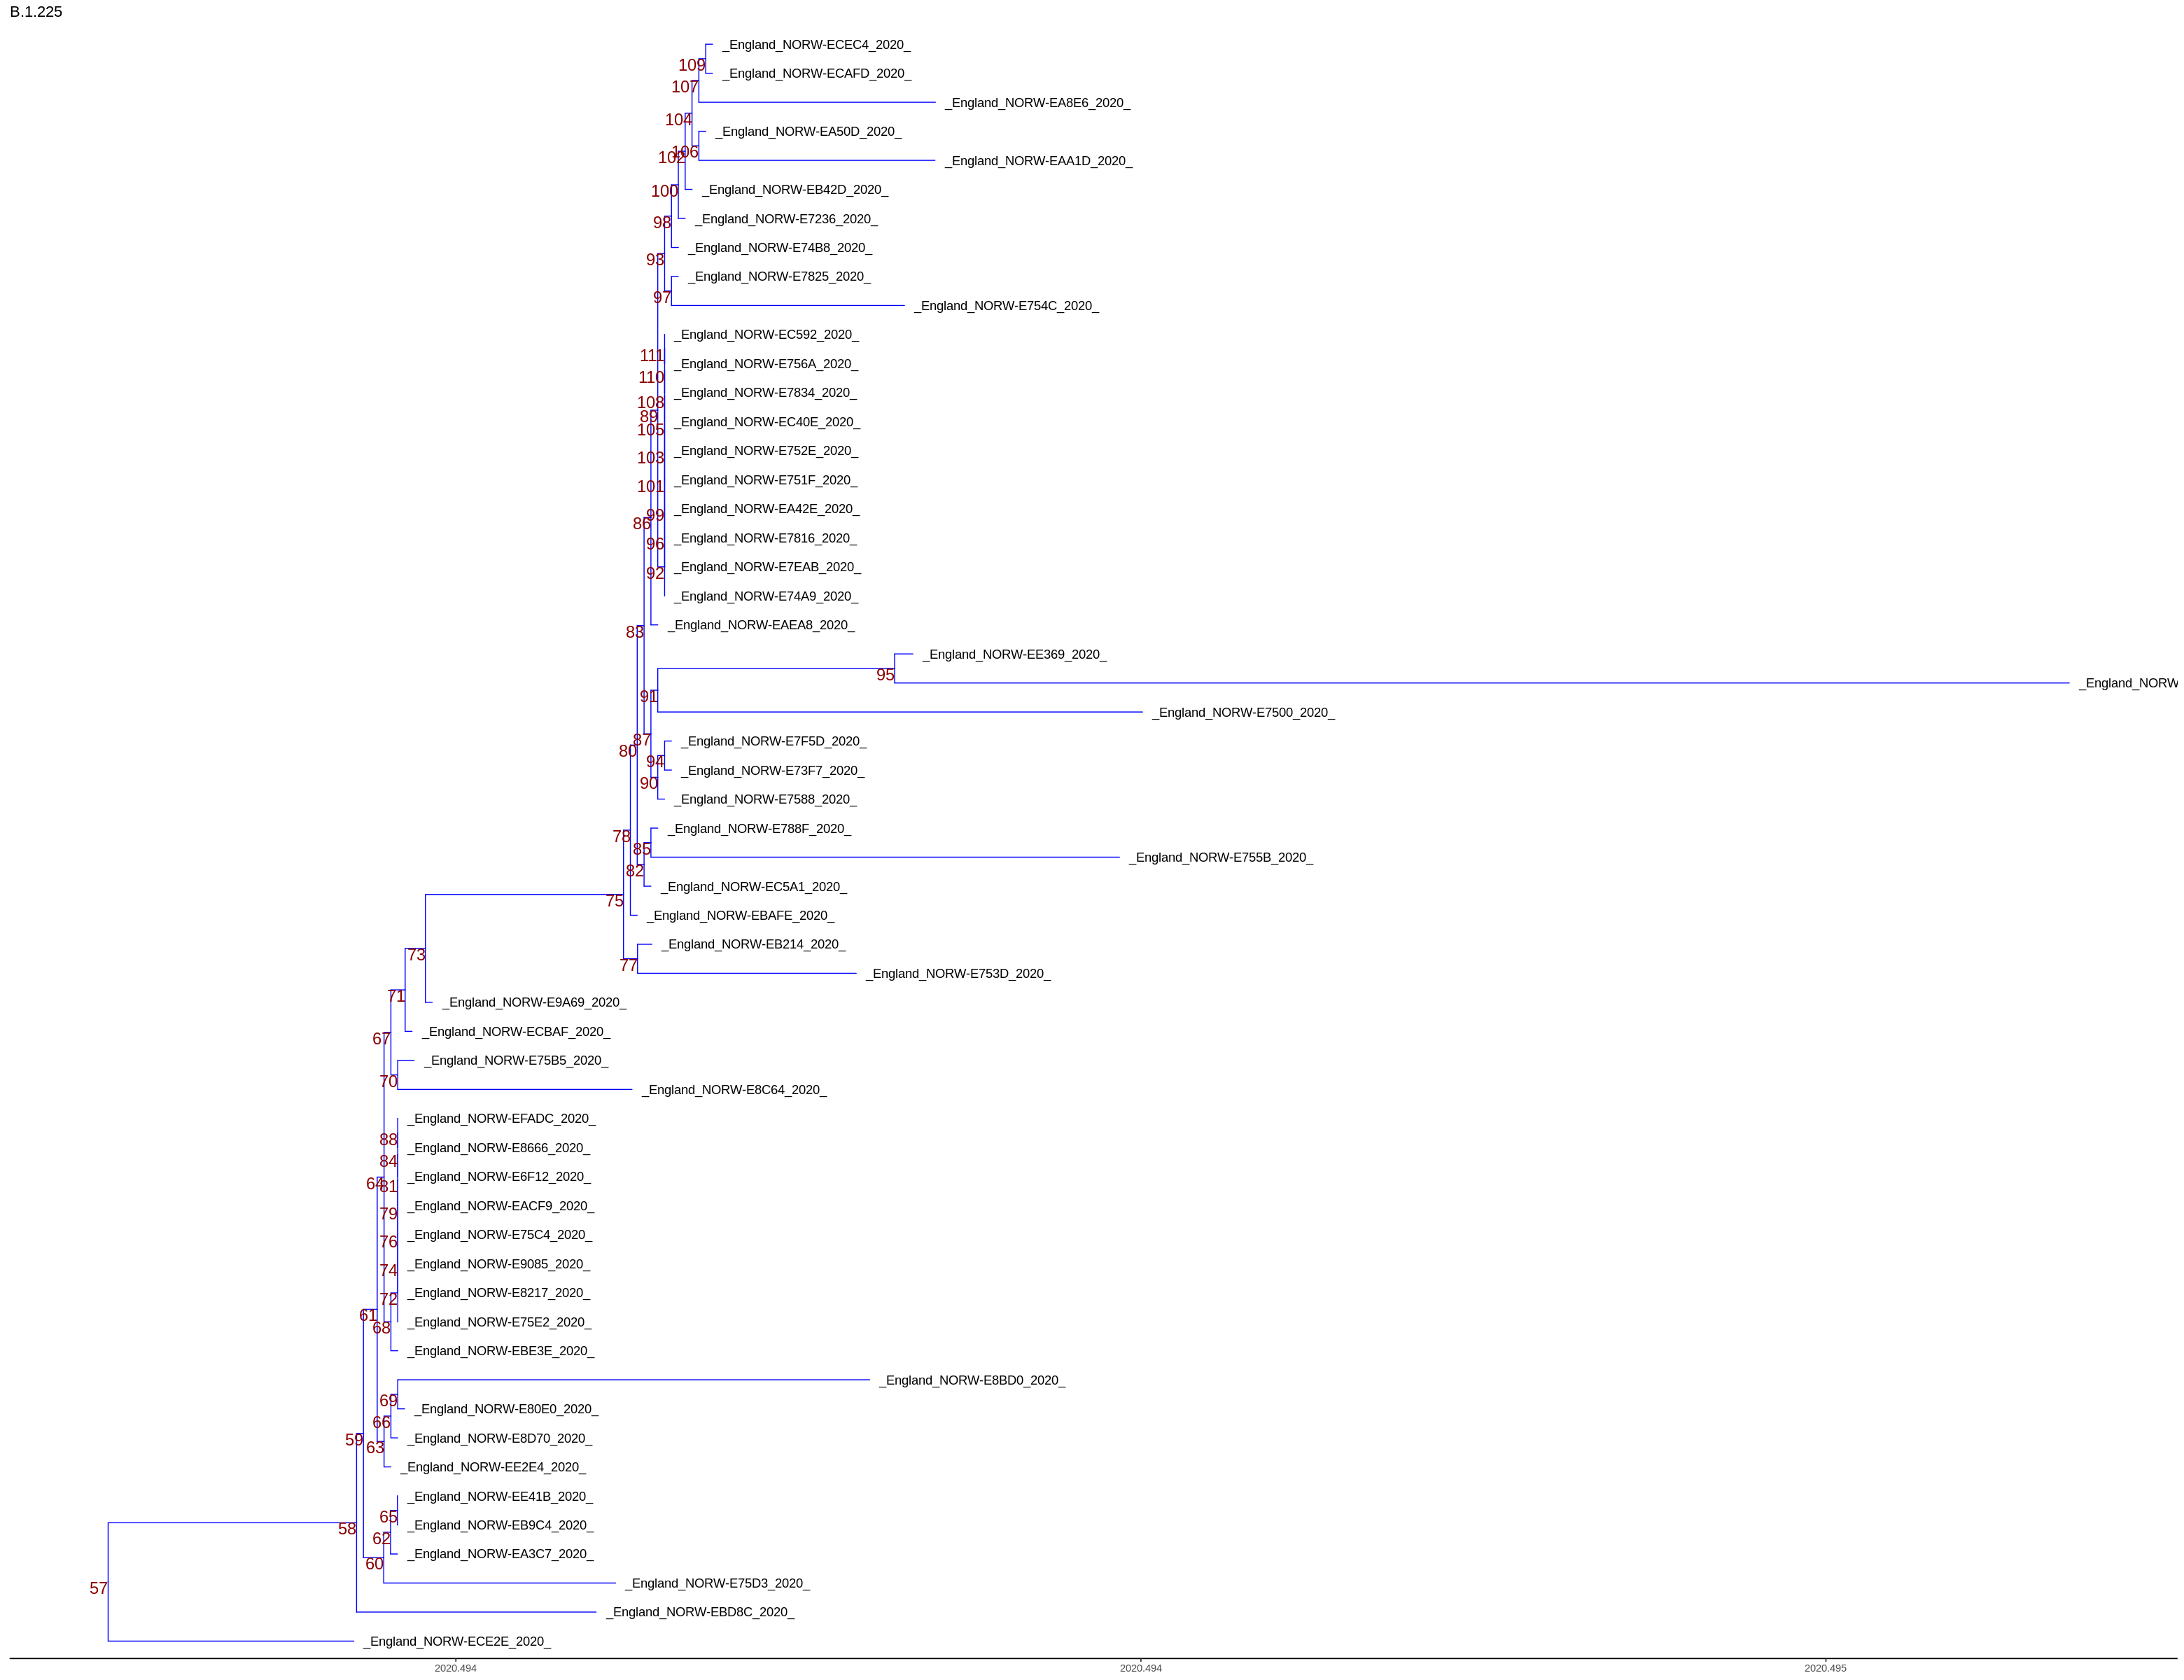

In [24]:
p <- plot_one_lineage_from_tree("full_timeframe/reformatted.aln.treefile", "full_timeframe/metadata_reformatted.csv", "B.1.225", "newick", "2020-06-30")
p1 <- p + geom_text2(
    mapping = aes(subset = !isTip, label = node),
    size = 5,
    color = "darkred",
    hjust = 1,
    vjust = 1) 
p1

So, B.1.225 is clade 57.  There is one outlier: what is it?

Coloring B.1.225 by phylotype, just to see:

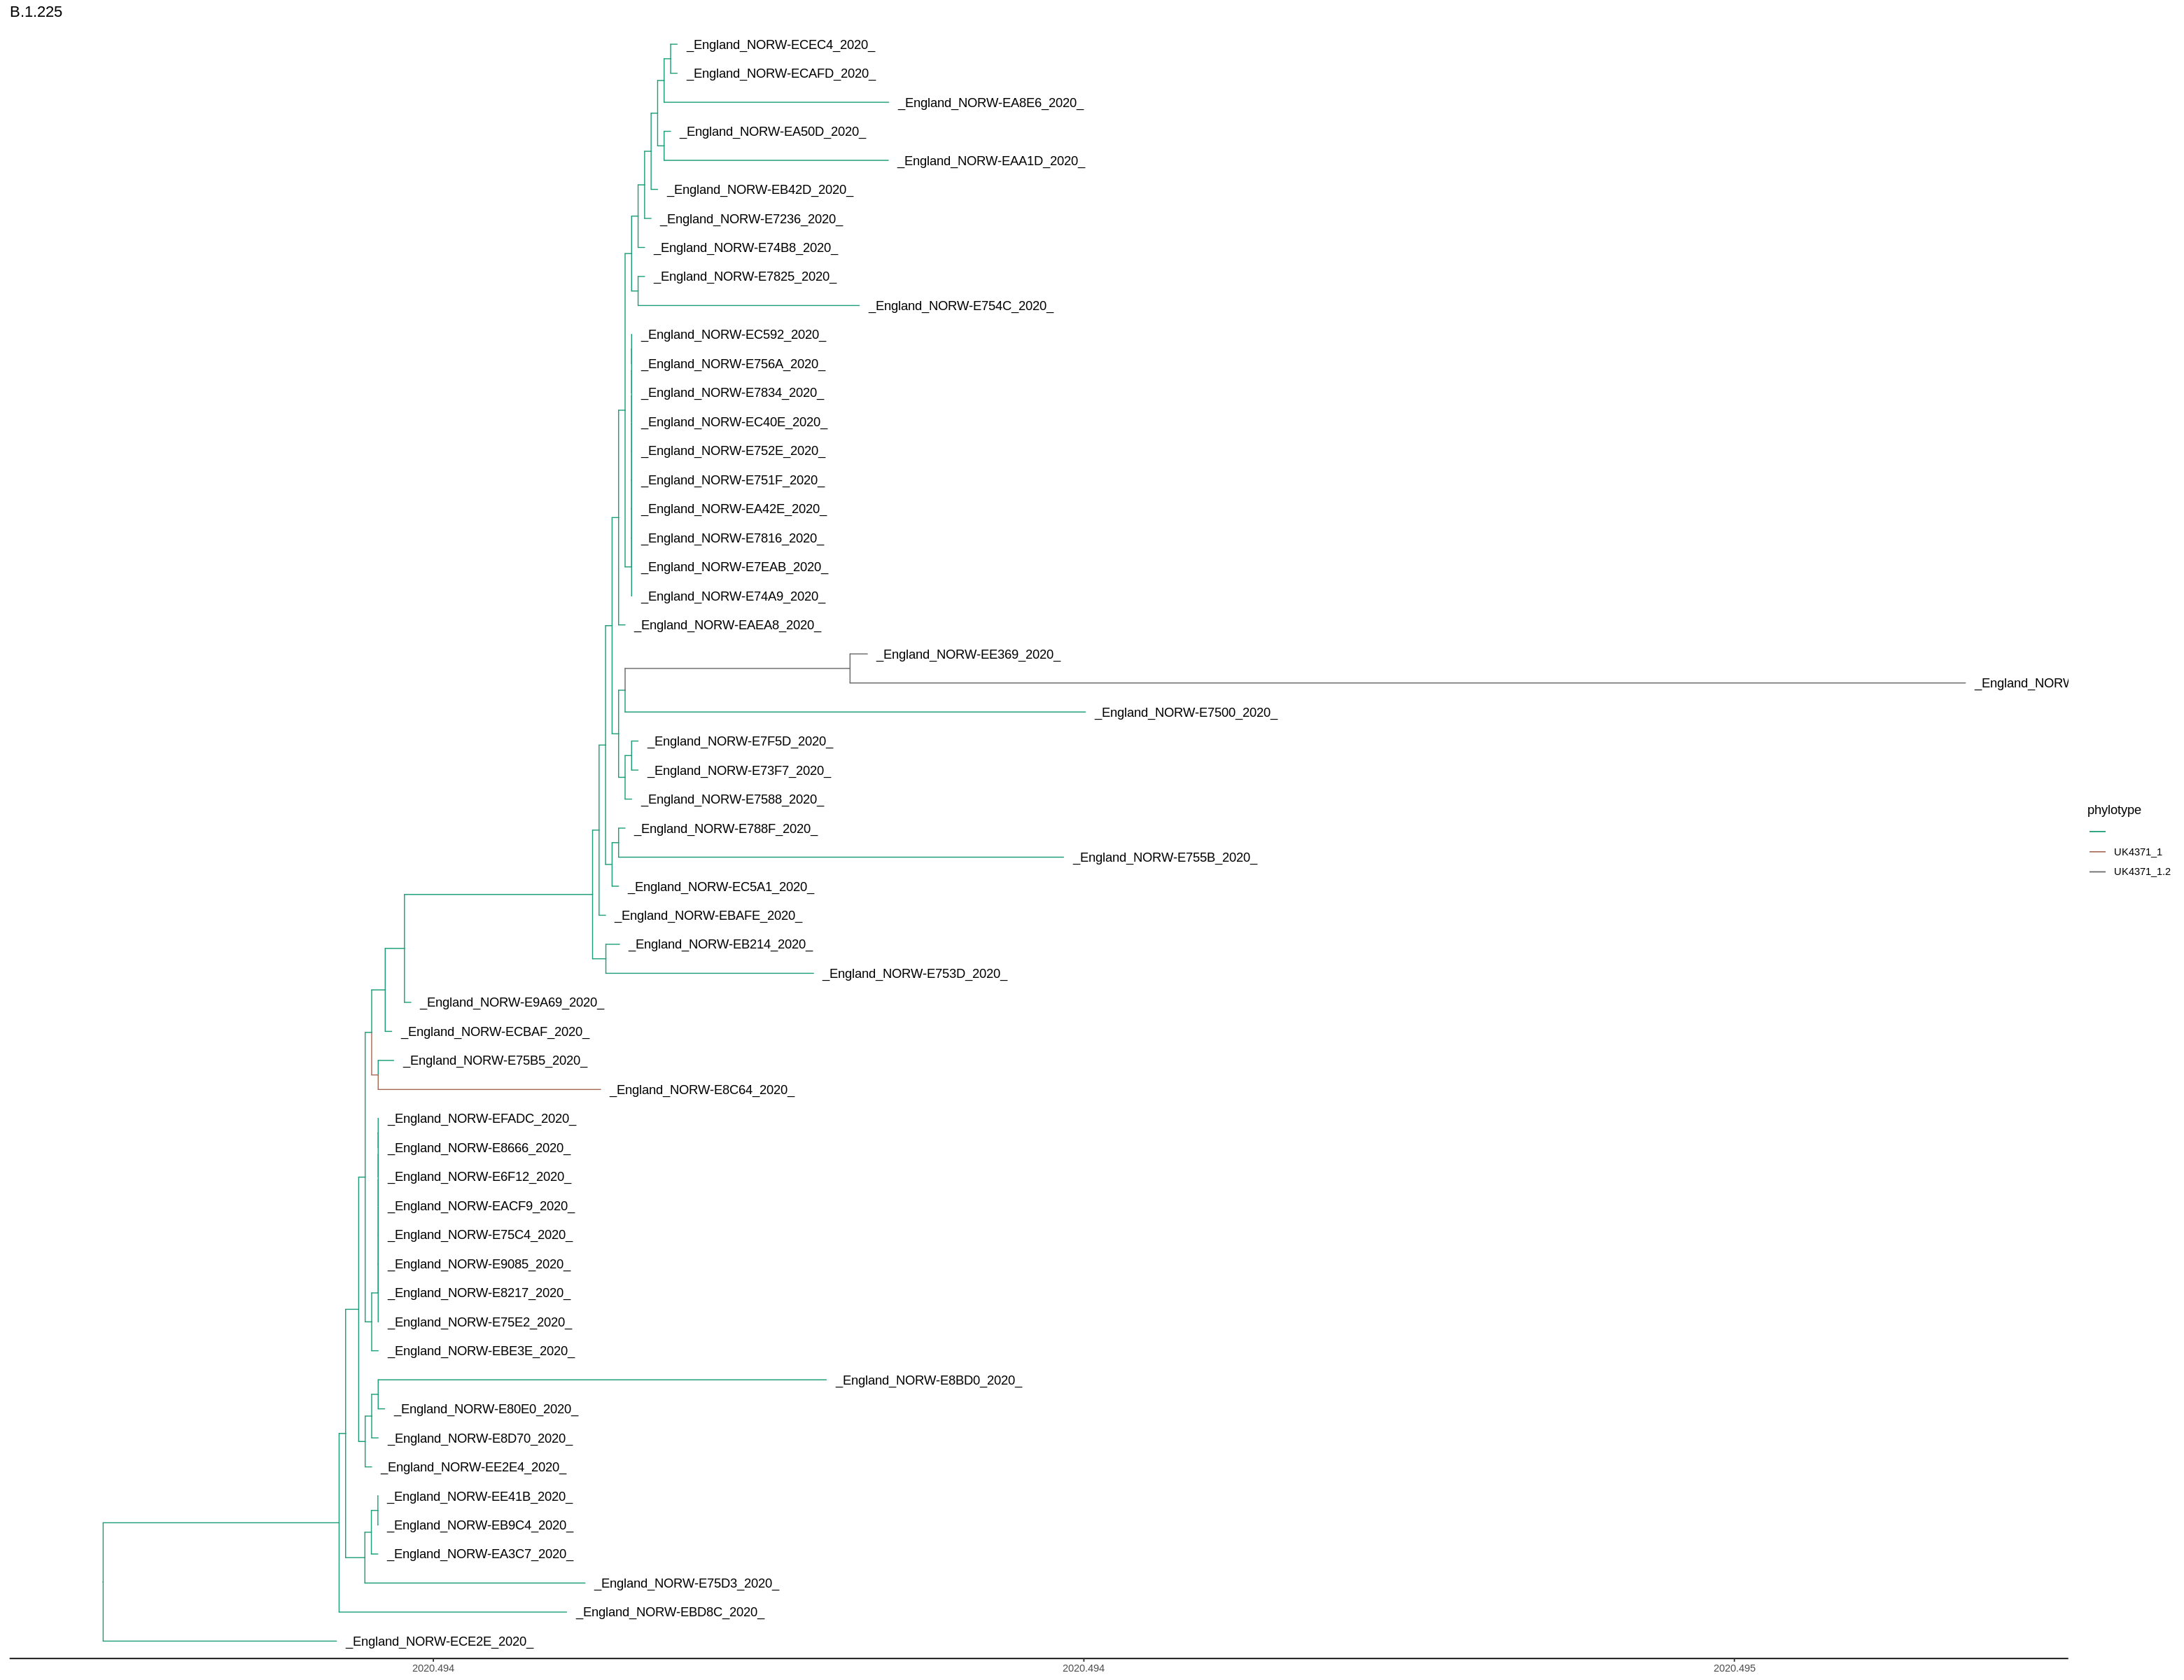

In [25]:
plot_tree_subset_and_color("full_timeframe/reformatted.aln.treefile", england, "lineage", "B.1.225", "phylotype", "newick", "2020-06-30")

A closer look at the B lineage--one of the first lineages to appear in the dataset, and one that didn't last past May:

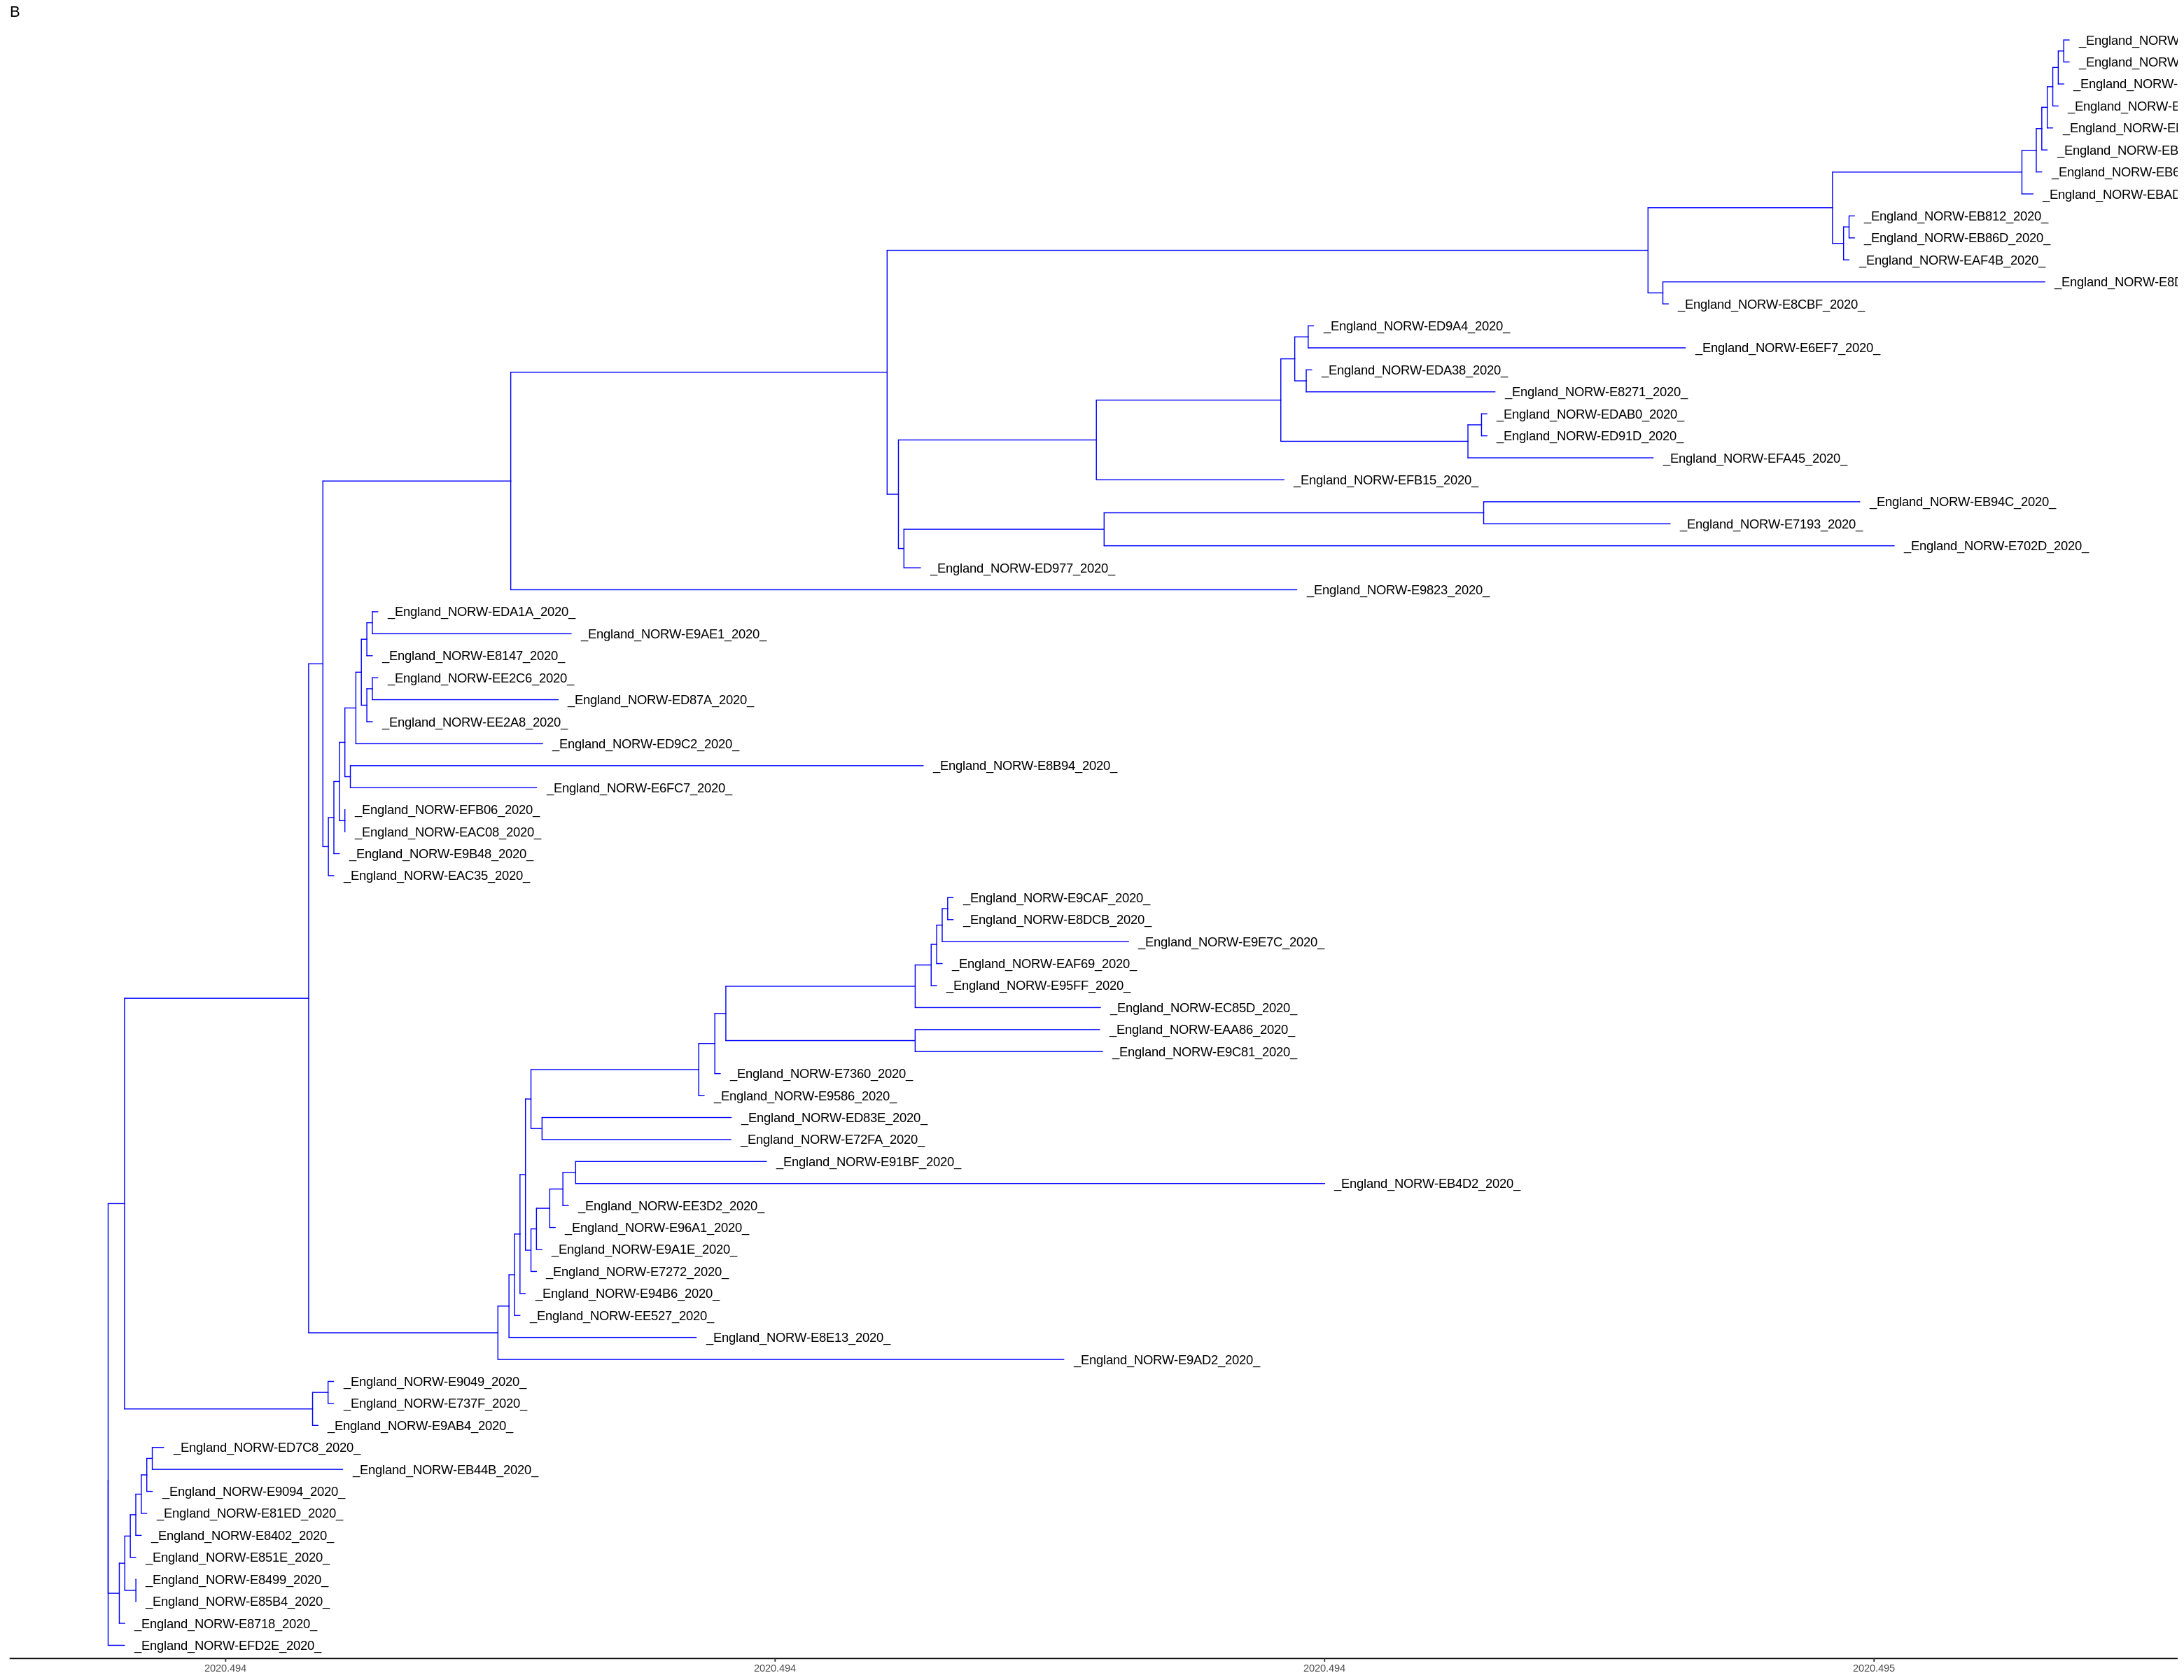

In [26]:
plot_one_lineage_from_tree("full_timeframe/reformatted.aln.treefile", "full_timeframe/metadata_reformatted.csv", "B", "newick", "2020-06-30")

The samples in B are more evenly spread apart and also more spread out over time than those in B.1.225.

**A closer look at the lowest sage-green node/cluster**

First have to label the tree to figure out what node it is:

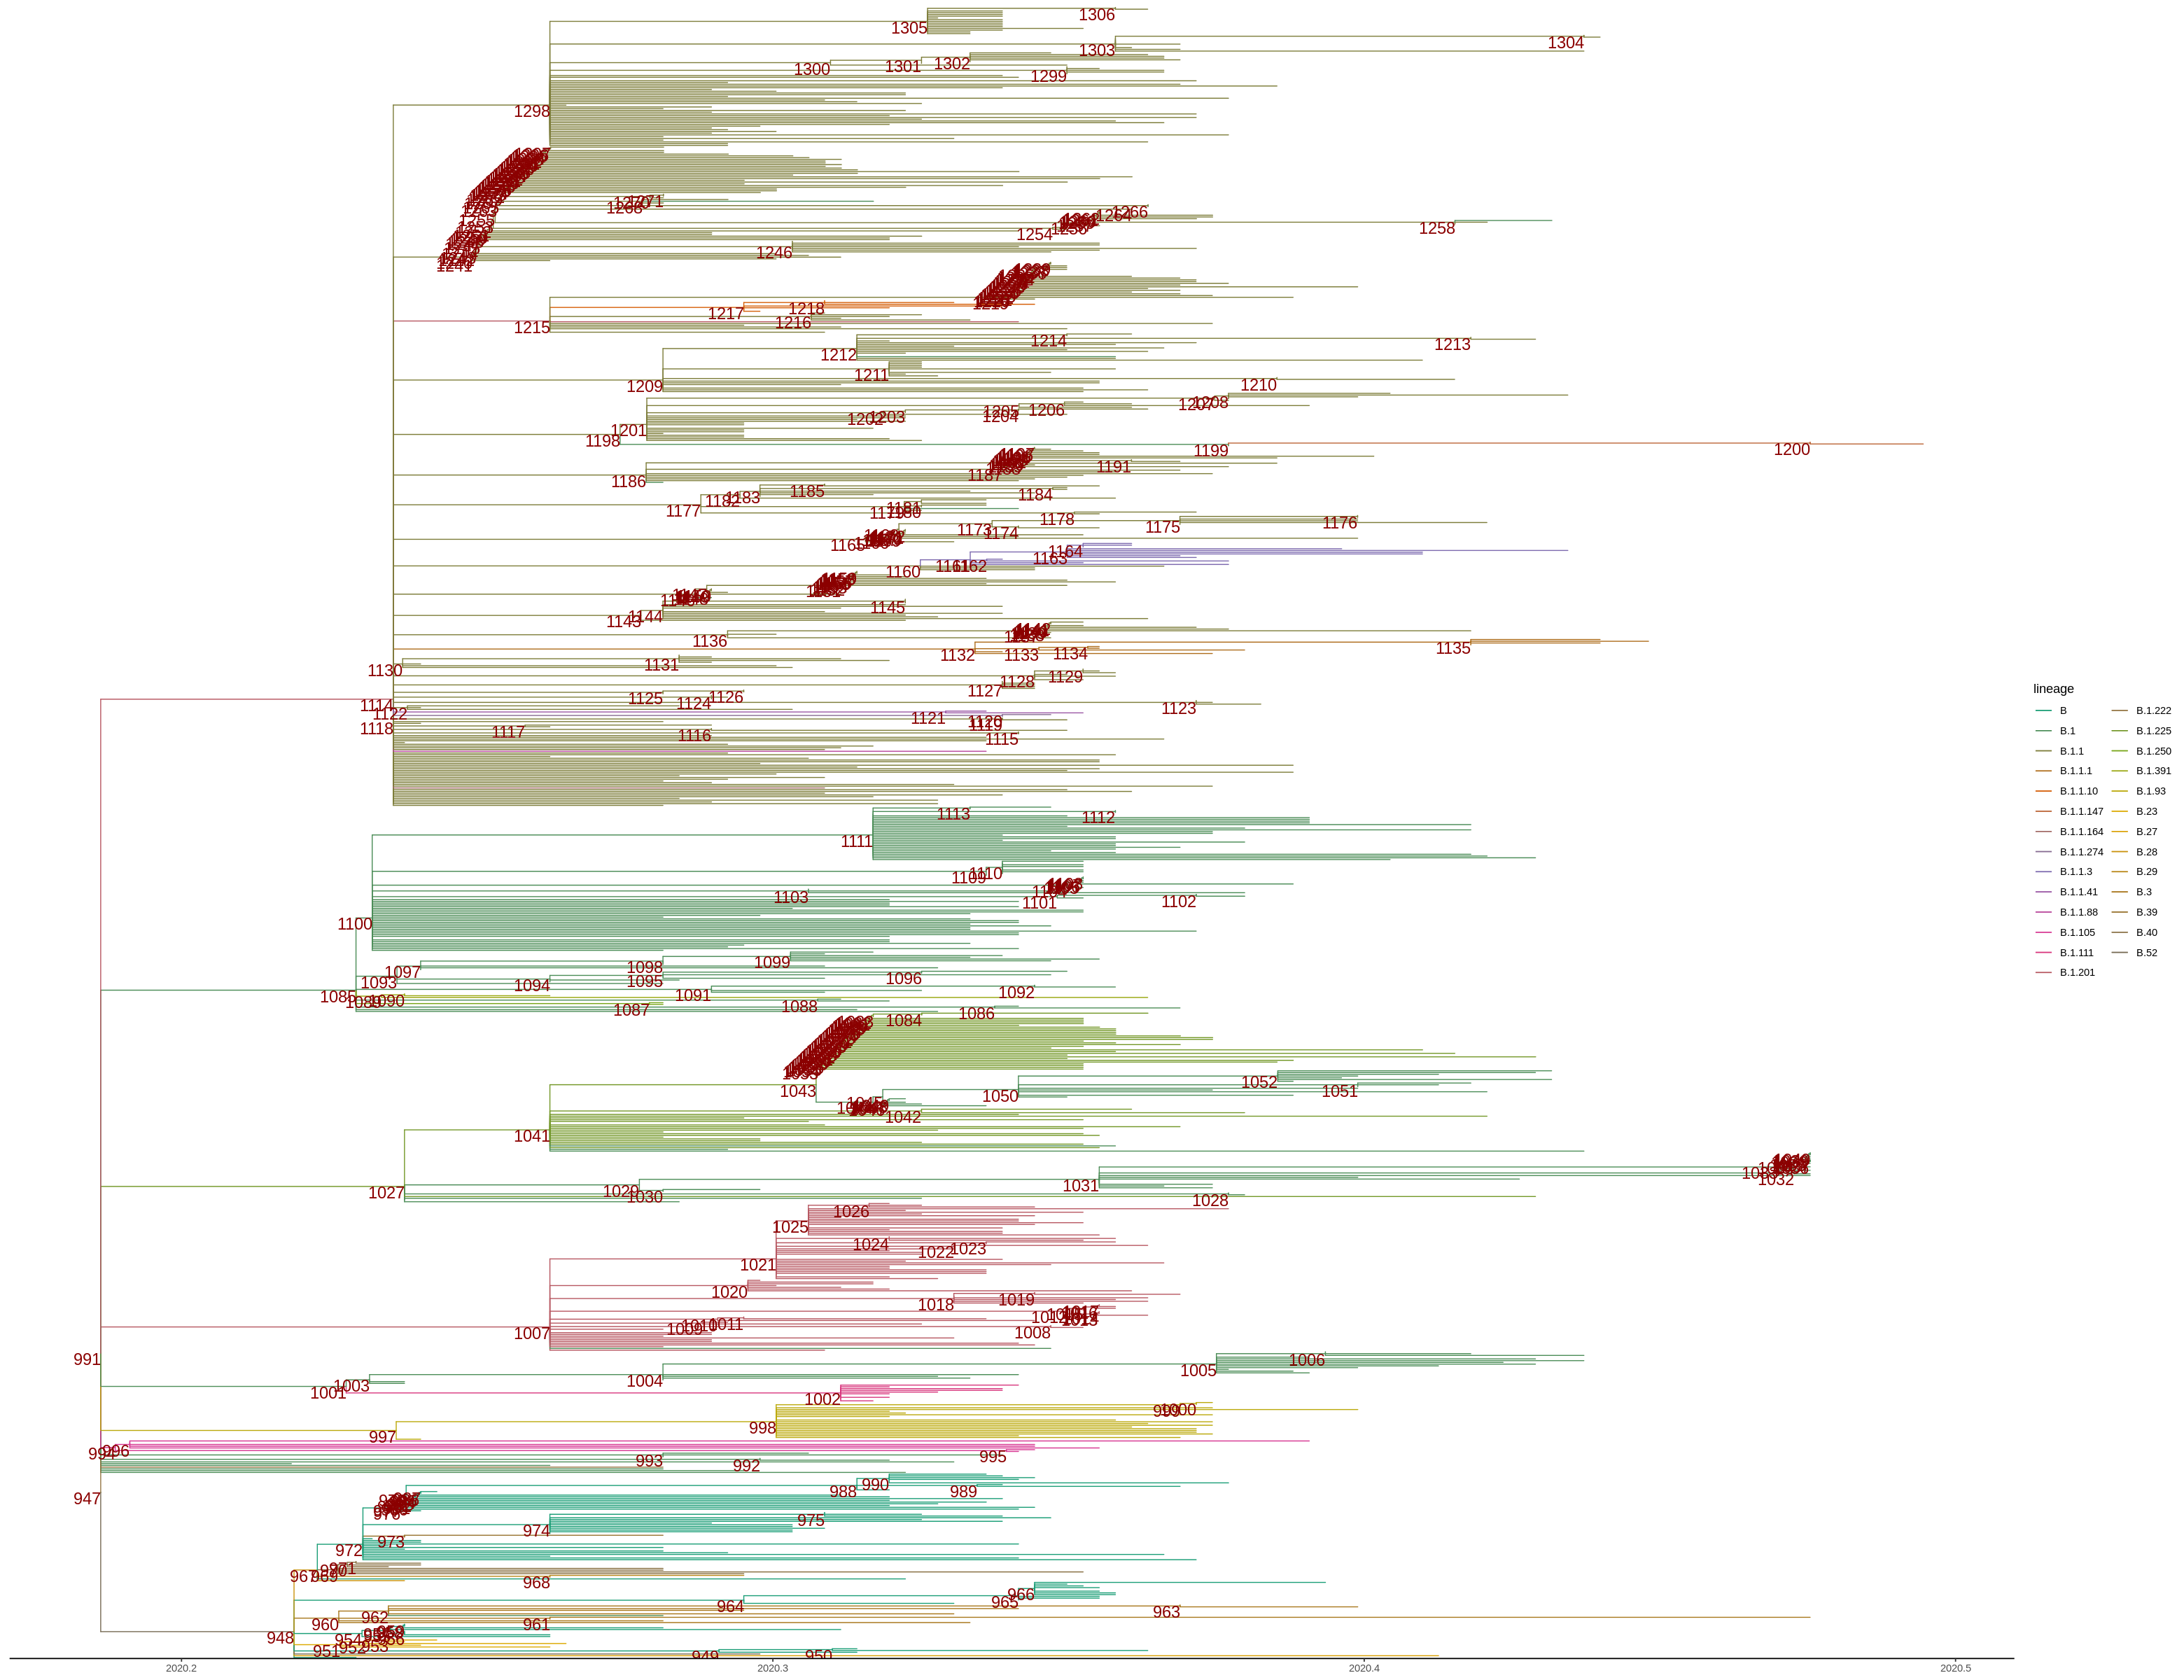

In [27]:
p <- plot_tree_by_factor("full_timeframe/timetree.nexus", "full_timeframe/metadata_reformatted.csv", "lineage", "nexus", "2020-06-30")

p1 <- p + geom_text2(
    mapping = aes(subset = !isTip, label = node),
    size = 5,
    color = "darkred",
    hjust = 1,
    vjust = 1) 
p1

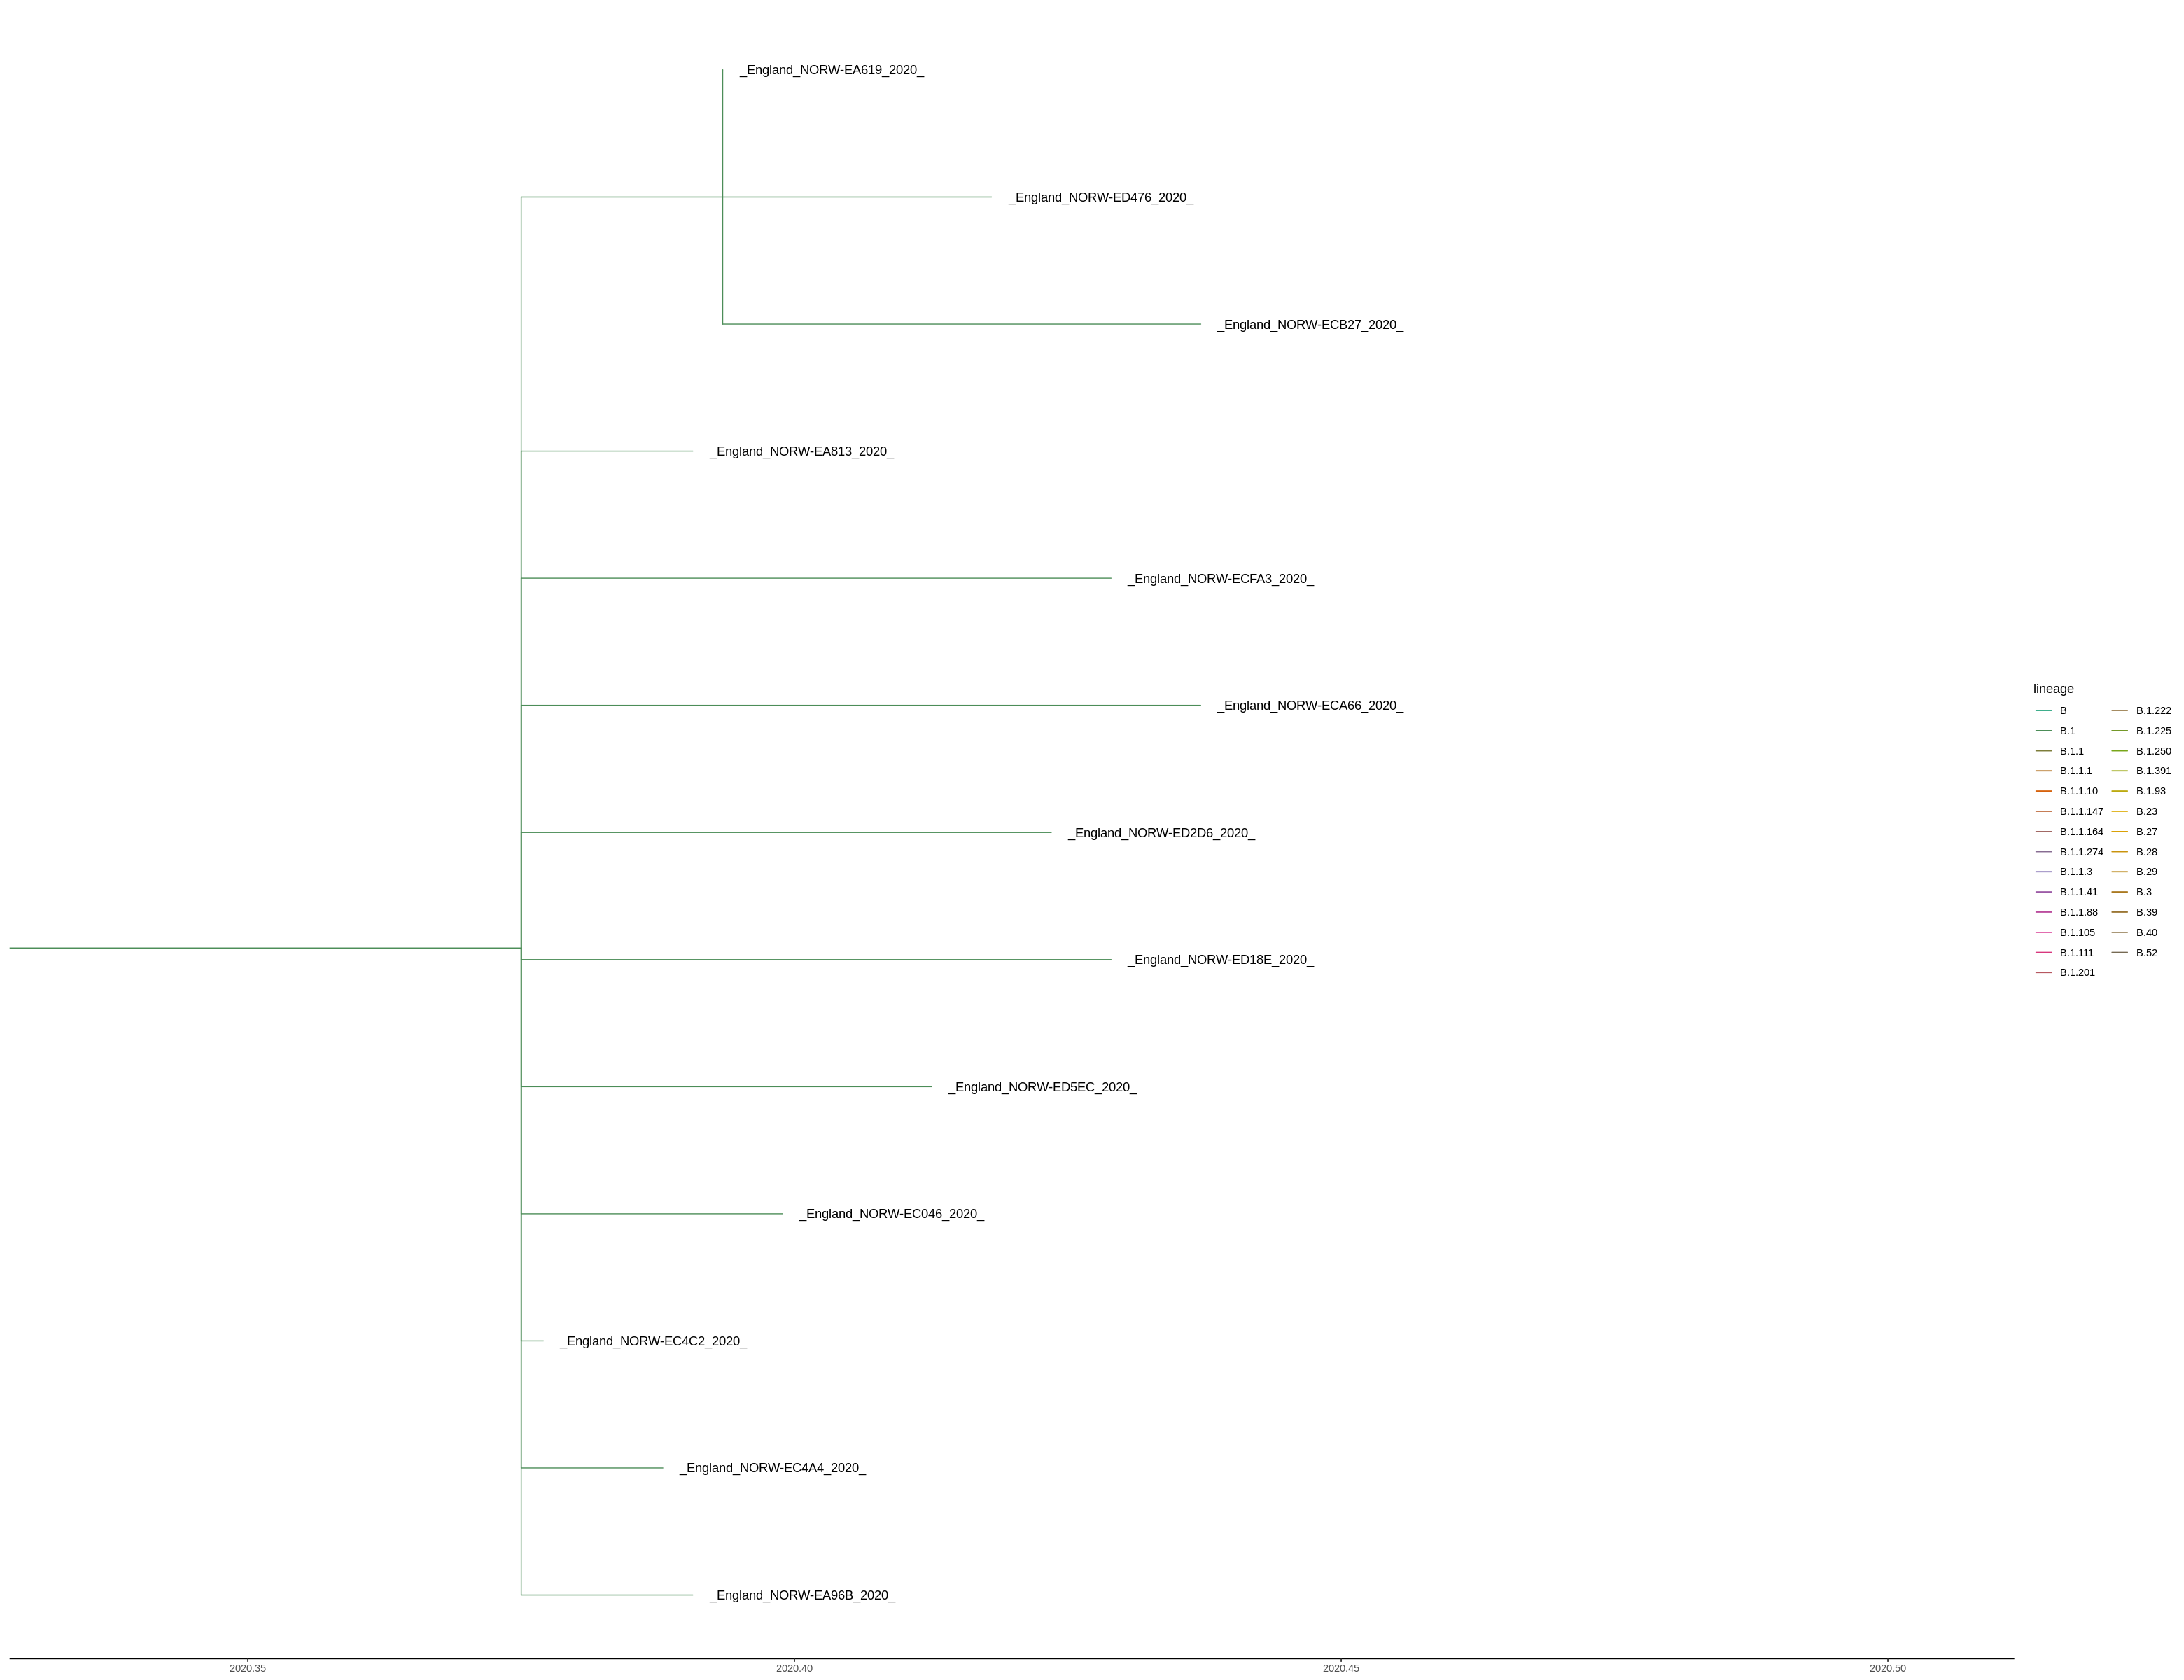

In [28]:
p2 <- p + geom_tiplab()
viewClade(p2, node = 1005)

Question: what is the crossed node at the top?  I'm guessing this whole picture shows a polytomy, but does it mean something different that the top tip is vertical?

# Trees produced with other sampling methods: NORW from 2020-01-01 to 2020-06-30

**Reduced Queries Tree**

I also wanted to check how reducing the queries to the most diverse would change the tree shape and lineage distribution, so I reran the tree-making pipeline with the option to take only the 500 most diverse sequences--so, around half the size of the first tree.

``(base) ubuntu@madeline-01:~/nf-test/sequencing_centre_trees``$`` nohup nextflow run sequencing_centre_trees.nf --start_date "2020-01-01" --end_date "2020-06-30" --diverseQueries 500 --centre "NORW" --max_samples_per_month false``

``executor >  local (3)
[a4/015cbf] process > chooseSamples (1)        [100%] 1 of 1, cached: 1 ✔
[58/647b0c] process > getFastaRecords (1)      [100%] 1 of 1, cached: 1 ✔
[95/8791b7] process > maskProblematicSites (1) [100%] 1 of 1, cached: 1 ✔
[4b/4d8997] process > removeWuhanHu1 (1)       [100%] 1 of 1, cached: 1 ✔
[36/5f3158] process > reduceQueries (1)        [100%] 1 of 1, cached: 1 ✔
[40/abe64d] process > buildFastTree (1)        [100%] 1 of 1 ✔
[3d/40a8ea] process > refineTree (1)           [100%] 1 of 1 ✔
[3a/66a16e] process > runPangolin (1)          [100%] 1 of 1, failed: 1 ✘
[f3/7f4726] process > getCOGUKMetadata (1)     [100%] 1 of 1, cached: 1 ✔
[-        ] process > joinMetadata             -
Error executing process > 'runPangolin (1)'``

*Pangolin failure

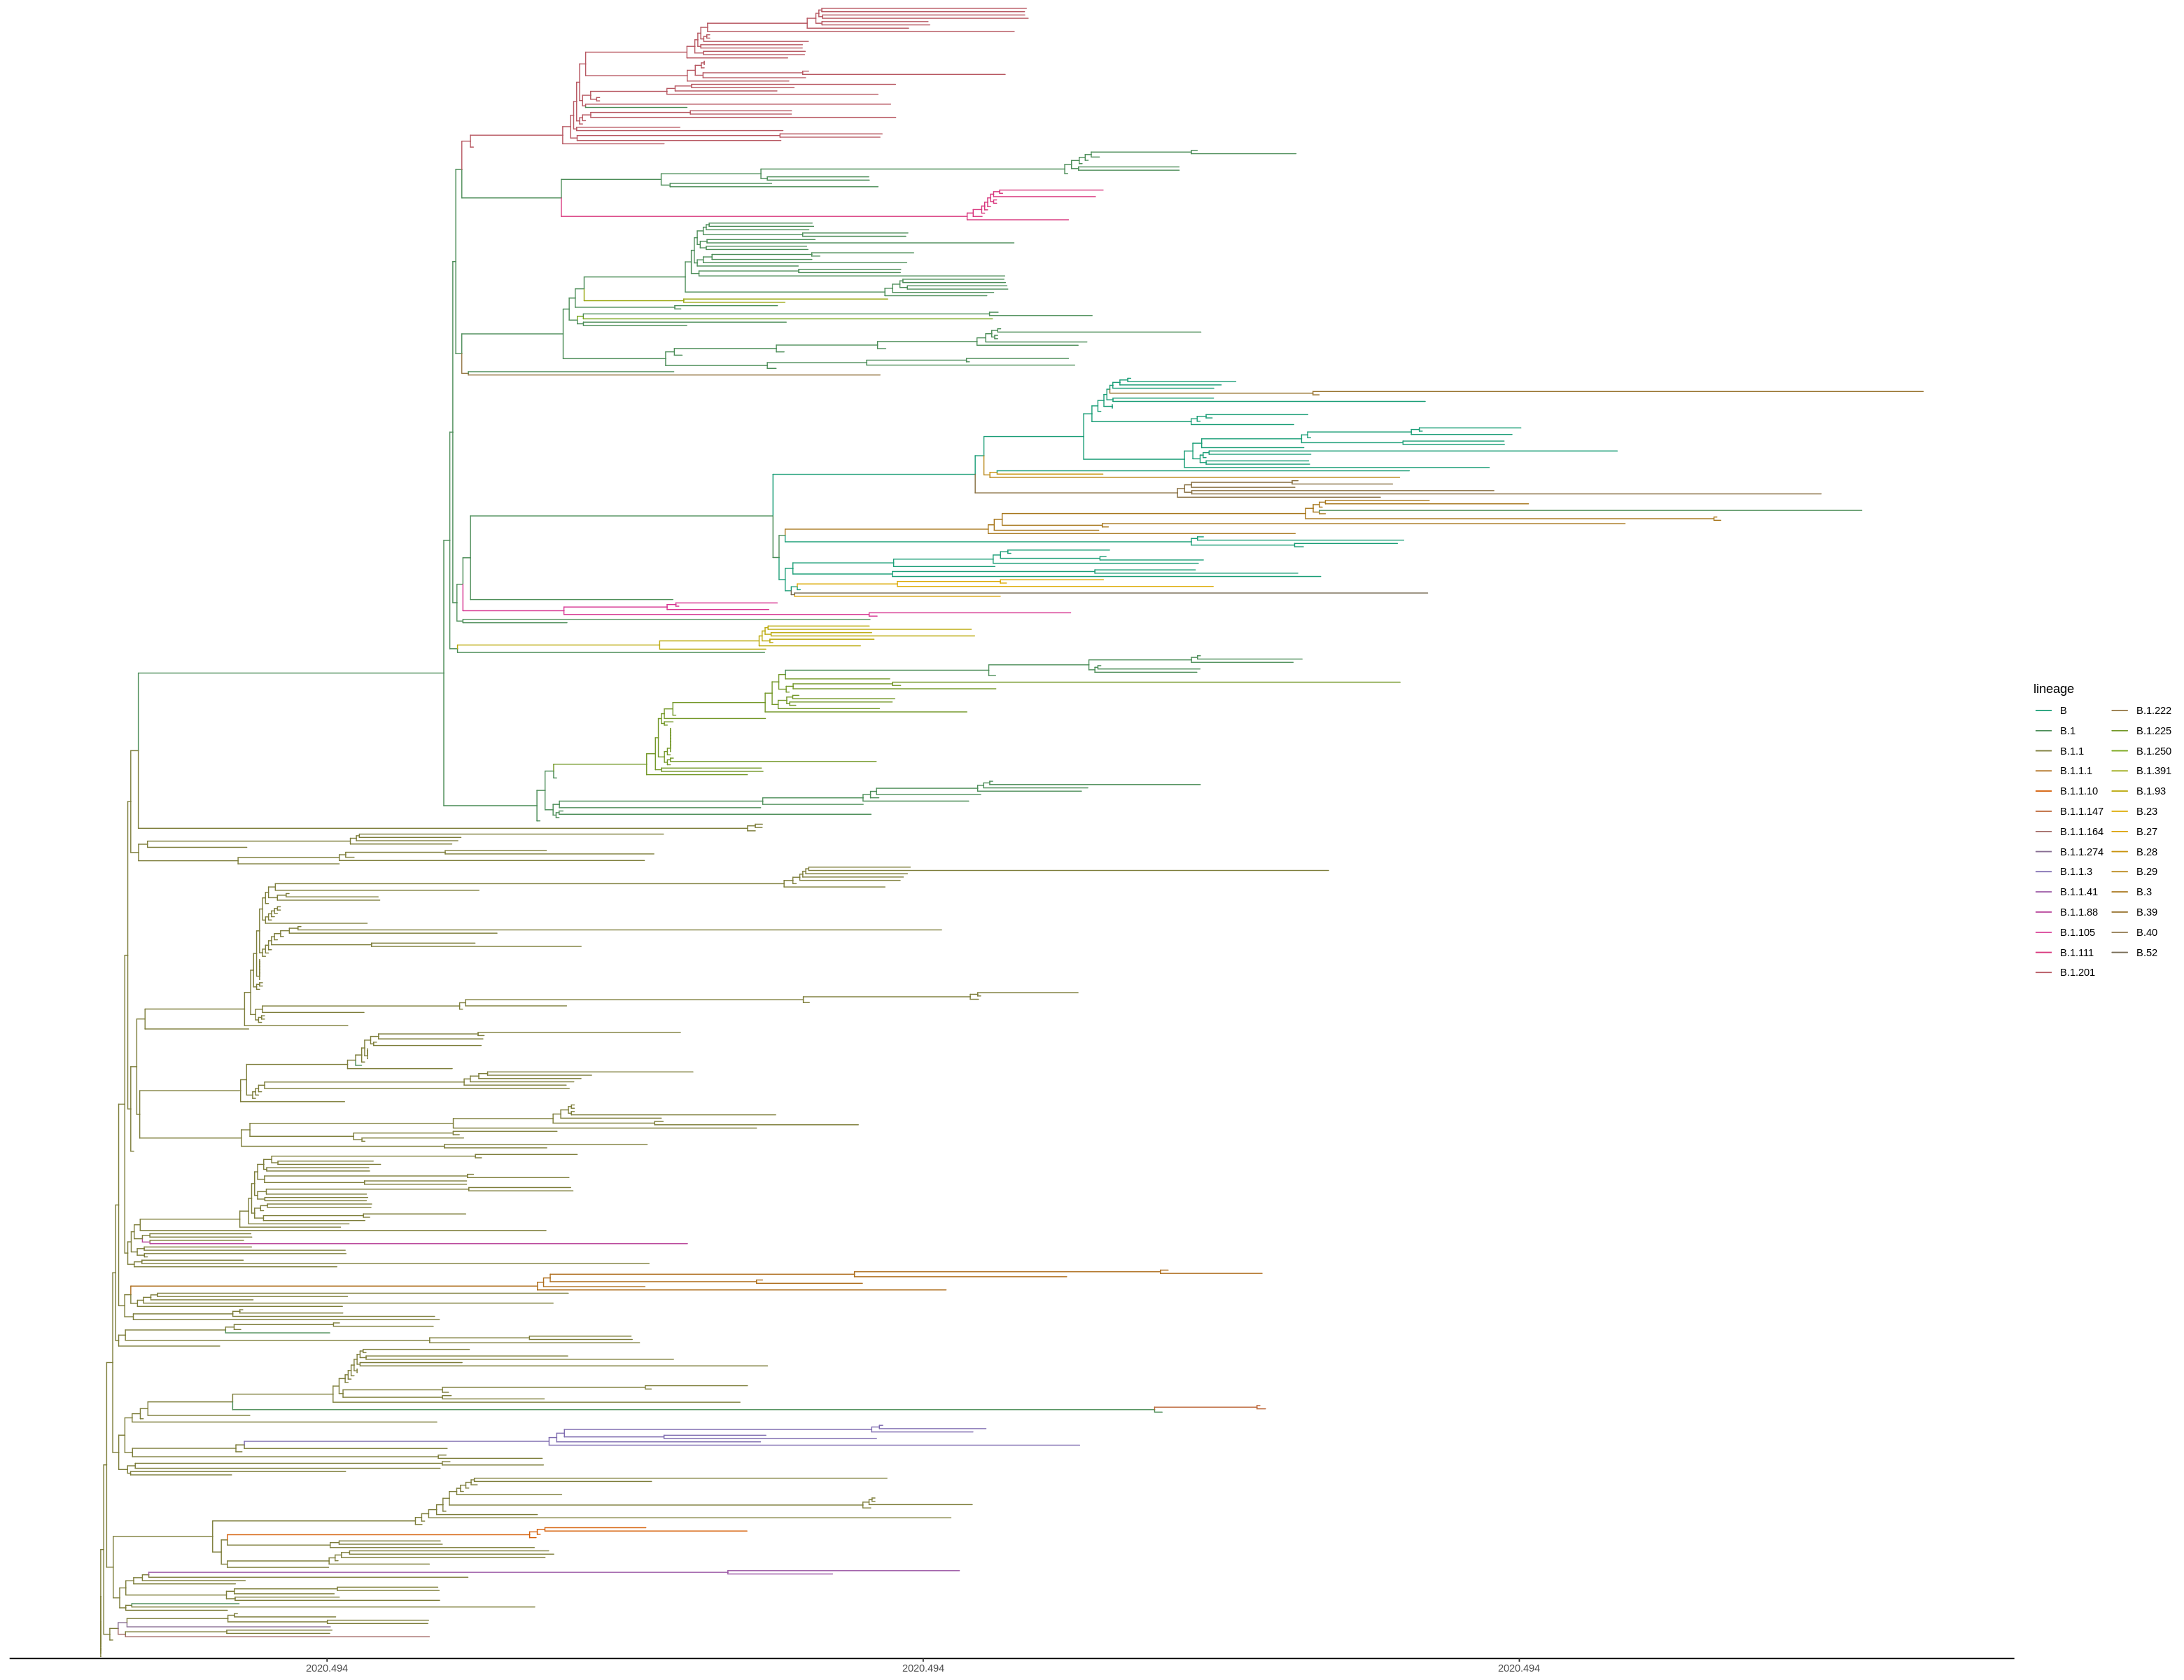

In [29]:
plot_tree_by_factor("reduced_queries/reformatted.aln.treefile", "full_timeframe/metadata_reformatted.csv", "lineage", "newick", "2020-06-30")

**Max 100 Samples Per Month Tree**

For this tree I took min(100 samples per month, total samples per month) for each month from January to June 2020, randomly sampling without replacement.  

``(base) ubuntu@madeline-01:~/nf-test/sequencing_centre_trees``$`` nohup nextflow run sequencing_centre_trees.nf --start_date "2020-01-01" --end_date "2020-06-30" --diverseQueries false --centre "NORW" --max_samples_per_month 100``

``executor >  local (8)
[df/edb806] process > chooseSamples (1)        [100%] 1 of 1 ✔
[19/03bc07] process > getFastaRecords (1)      [100%] 1 of 1 ✔
[1e/752434] process > maskProblematicSites (1) [100%] 1 of 1 ✔
[86/4a0b6e] process > removeWuhanHu1 (1)       [100%] 1 of 1 ✔
[-        ] process > reduceQueries            -
[20/15094e] process > buildFastTree (1)        [100%] 1 of 1 ✔
[af/1d66f1] process > refineTree (1)           [100%] 1 of 1 ✔
[1e/1cd80d] process > runPangolin (1)          [  0%] 0 of 1
[5b/6dece9] process > getCOGUKMetadata (1)     [100%] 1 of 1 ✔
[-        ] process > joinMetadata             -
``

*Note that Pangolin failed this time; the error message is a bit opaque.

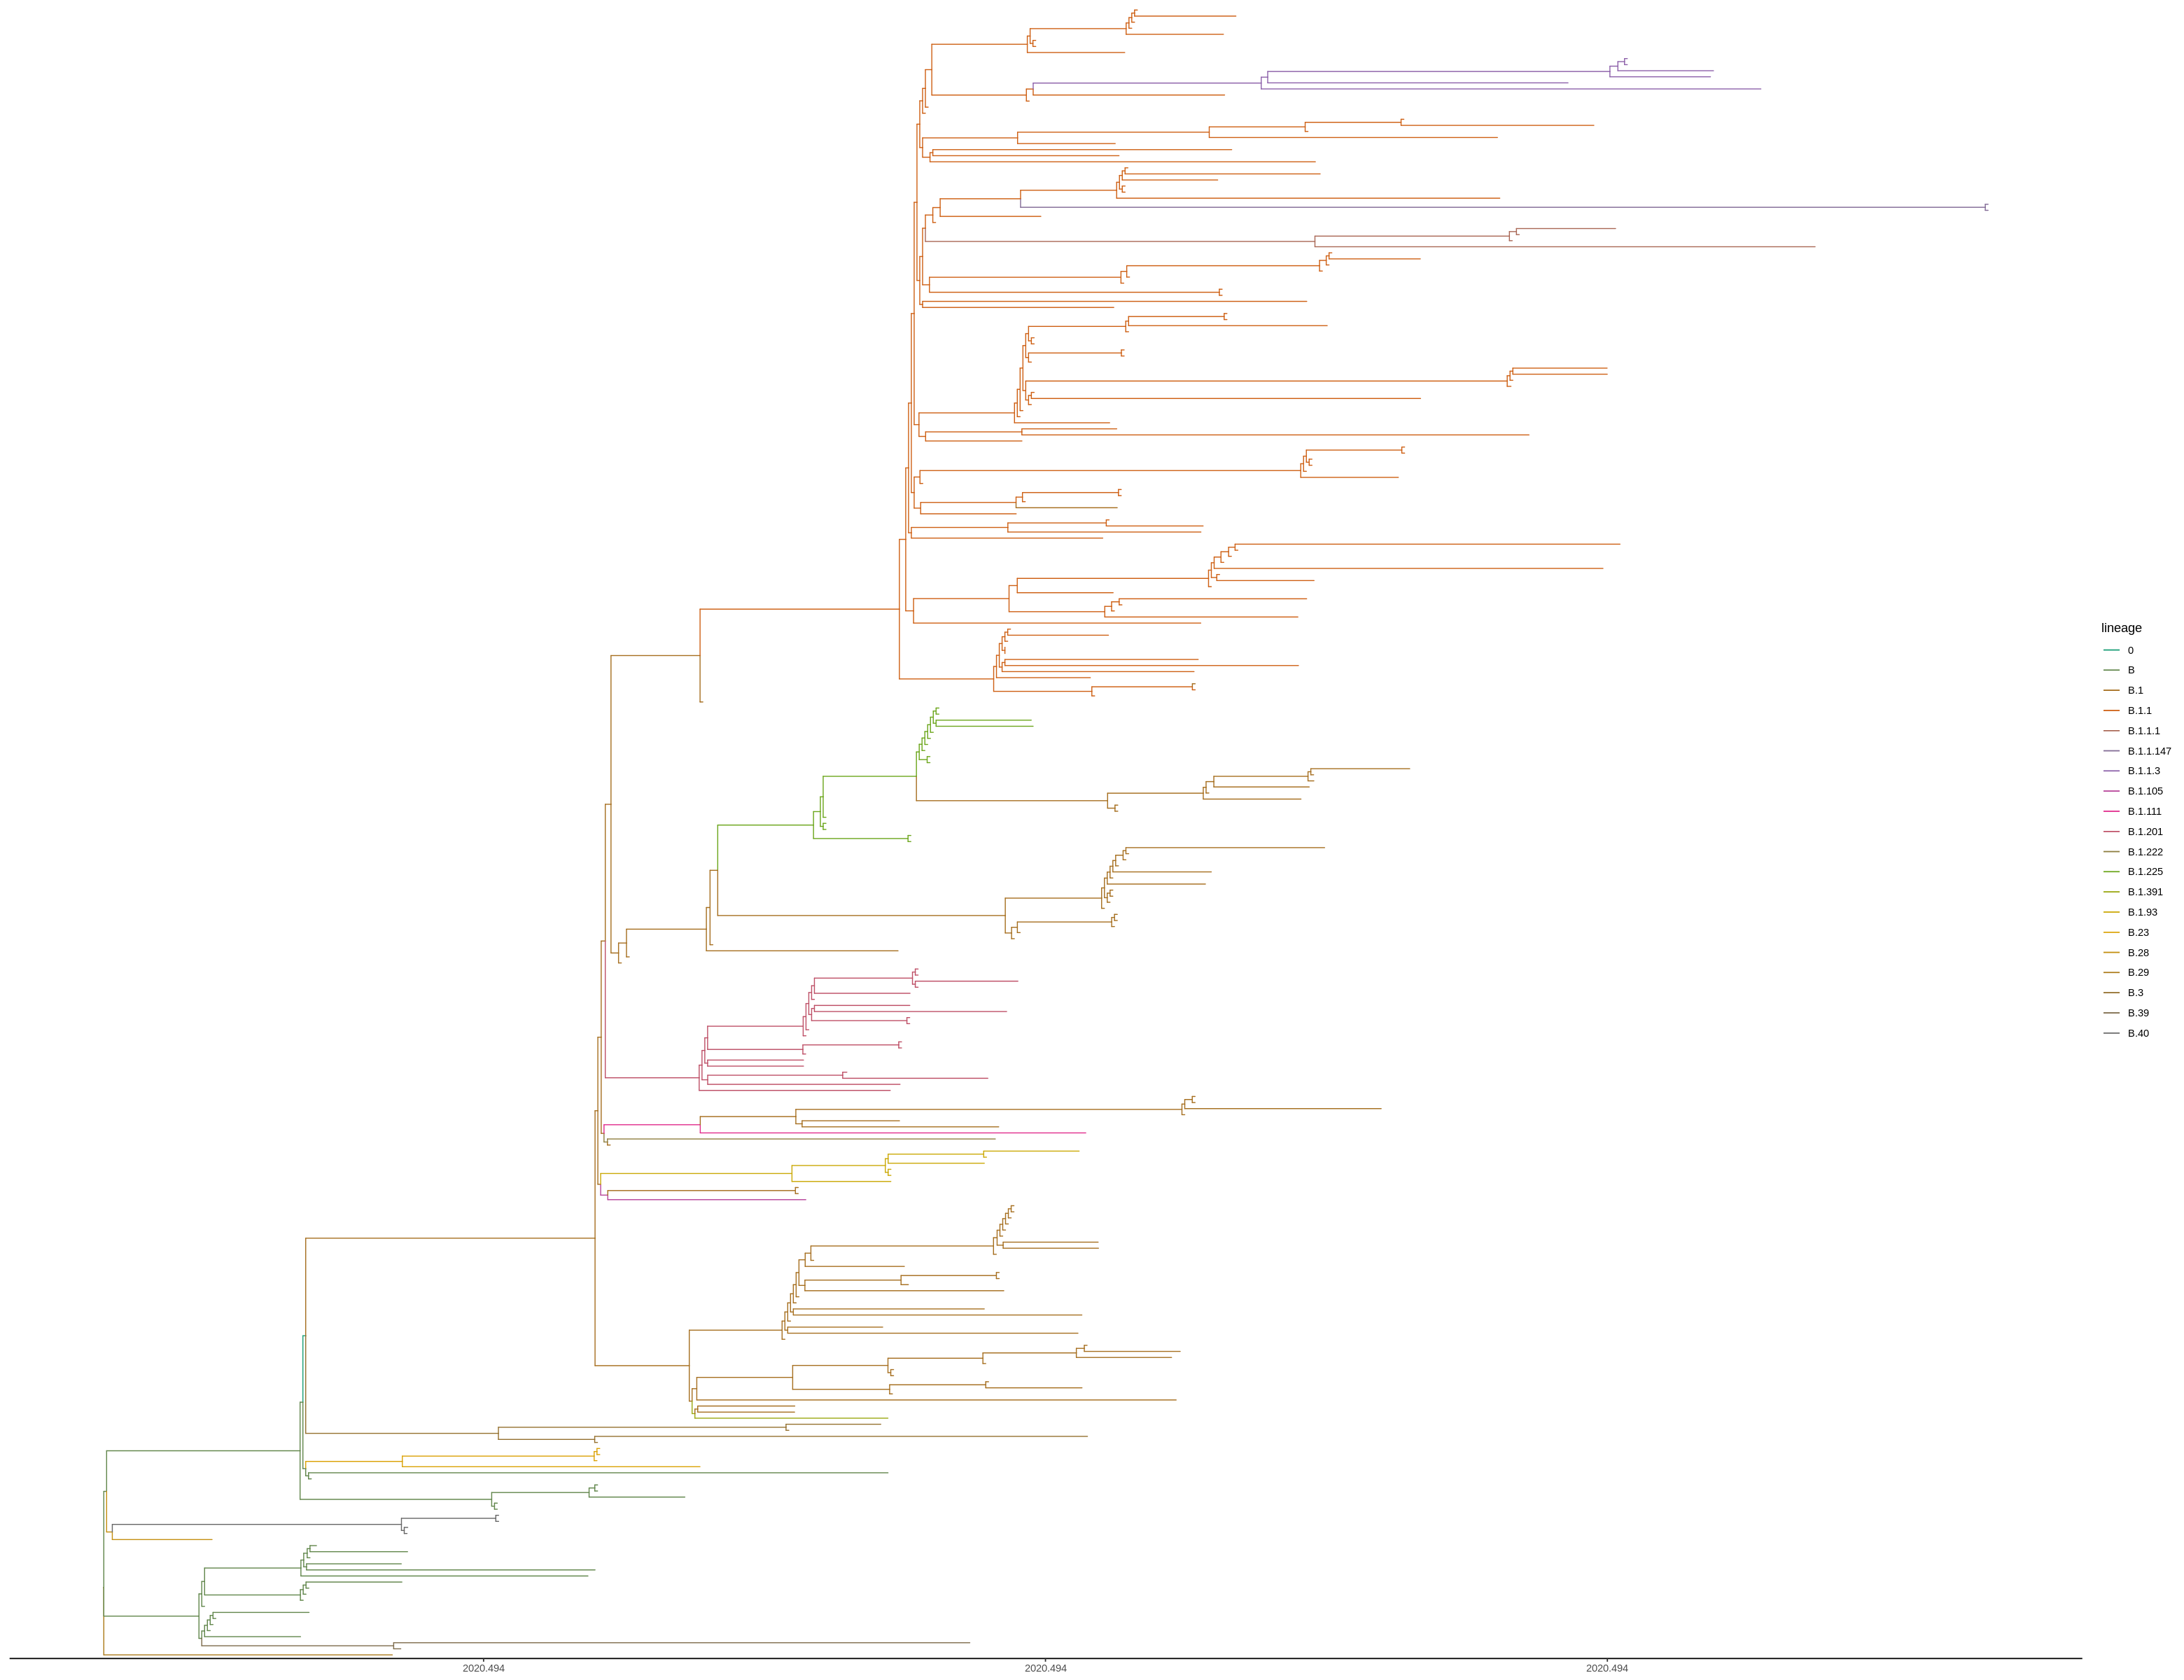

In [30]:
plot_tree_by_factor("100_per_month/reformatted.aln.treefile", "full_timeframe/metadata_reformatted.csv", "lineage", "newick", "2020-06-30")

**Comparing the lineages present from each sampling method**



In [31]:
reduced_qs <- read.csv("reduced_queries/leaftips_cog_metadata.csv", sep = ",")
max_100 <- read.csv("100_per_month/leaftips_cog_metadata.csv", sep = ",")
full <- read.csv("full_timeframe/metadata_reformatted.csv", sep = ",")

**1) Time distribution of samples for each method**

In [32]:
plot_samples_over_time <- function(df, title){
    
options(repr.plot.width=14, repr.plot.height=8) ; par(oma=c(0,0,0,0))
    
p <- ggplot(df, aes(x = sample_date)) + geom_bar(color='black')
p <- p + theme_classic() + theme(axis.text.x = element_text(color="black", size=16)) + xlab("Sample Date") + ylab("Number of Sequences")
p <- p + theme(axis.title.x = element_text(color="black", size=15, face="bold"), 
               axis.text.x = element_text(color="black", size=12, angle = 90, vjust = 0.5, hjust=1),
               axis.title.y = element_text(color="black", size=15, face="bold"),
               axis.text.y = element_text(color="black", size=15),
               legend.text = element_text(size=16), legend.title = element_text(size=20)
              )

p <- p + labs(title = title)
p
}

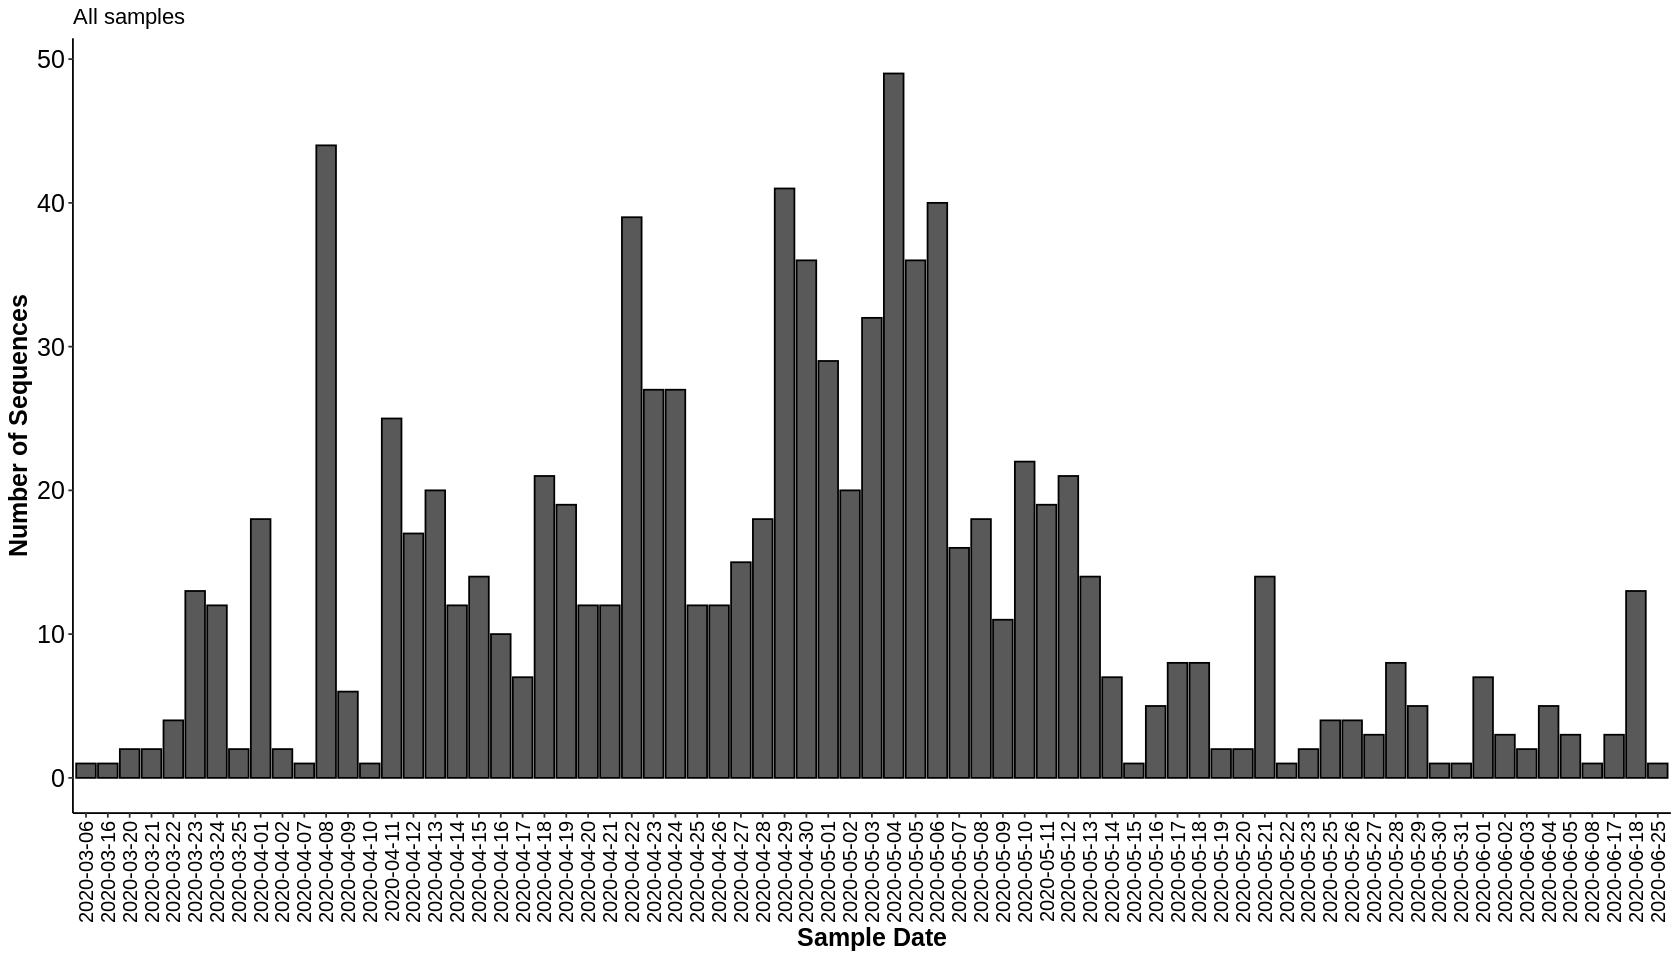

In [33]:
plot_samples_over_time(full, "All samples")

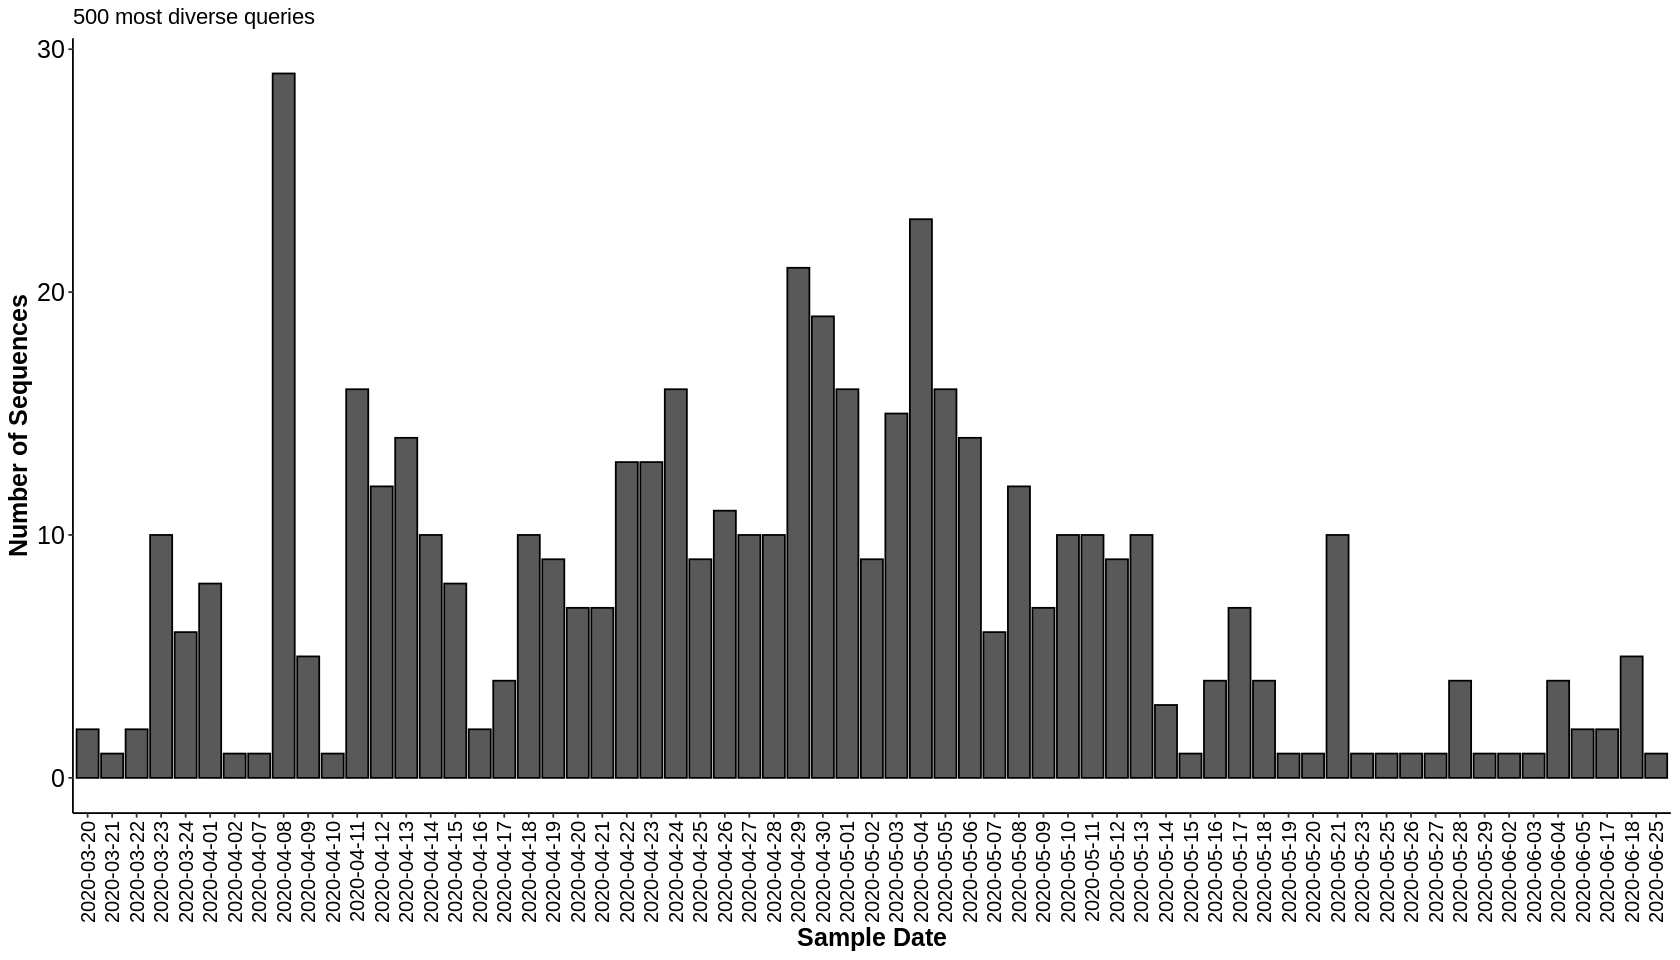

In [34]:
plot_samples_over_time(reduced_qs, "500 most diverse queries")

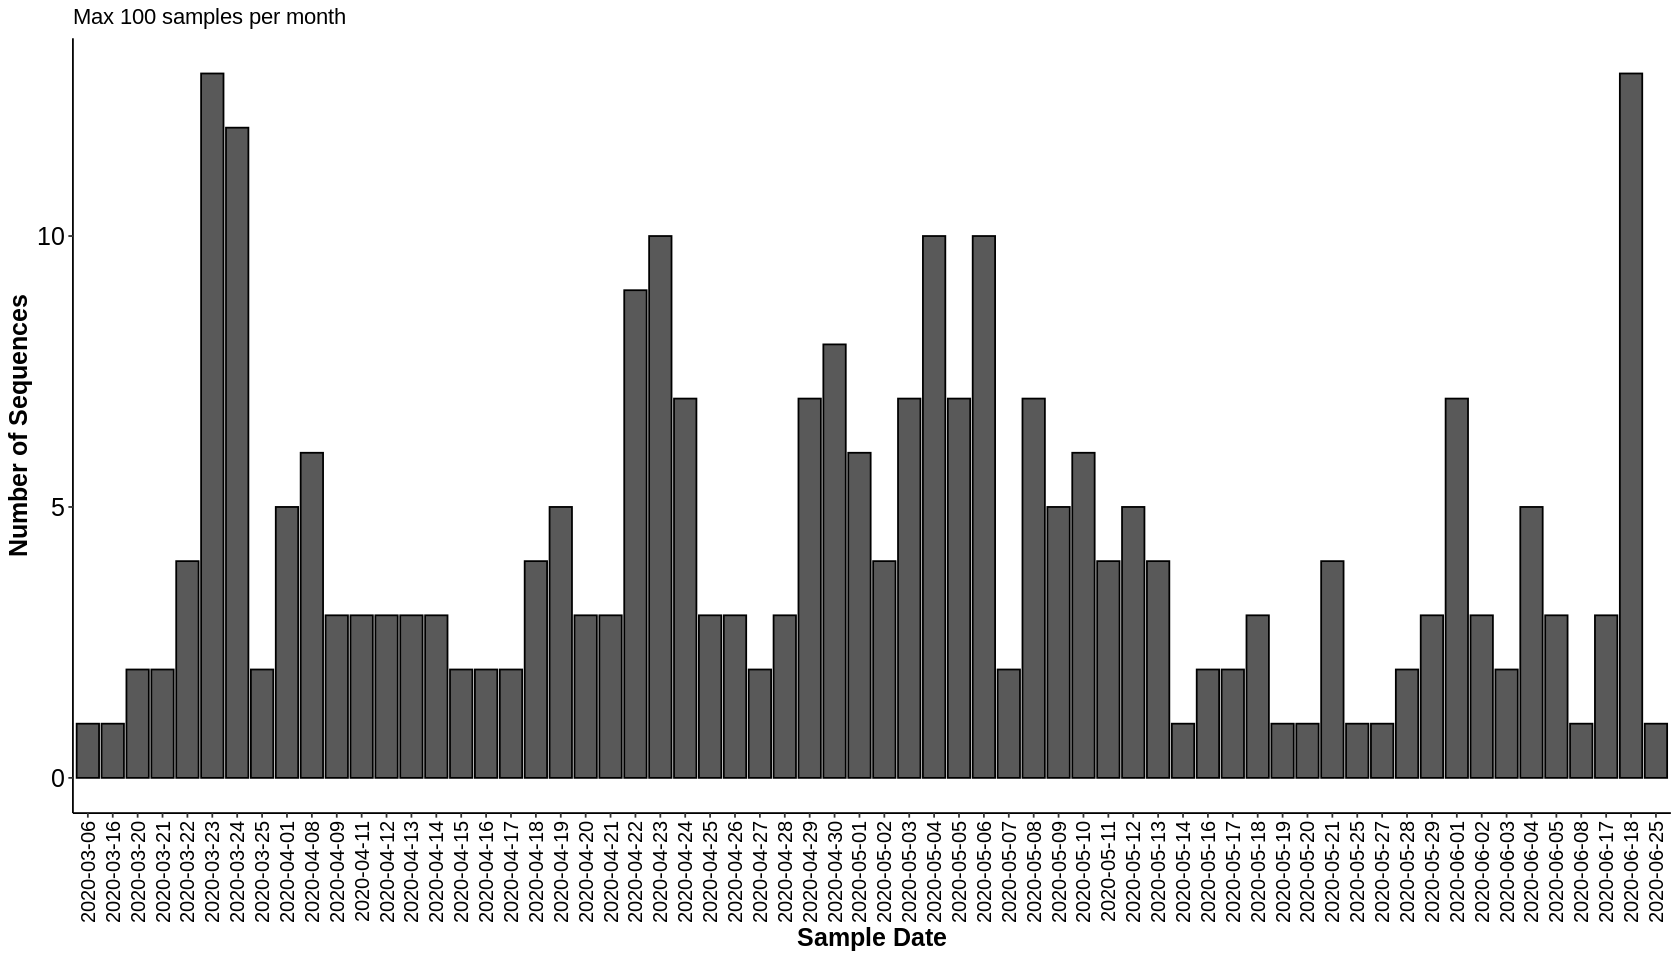

In [35]:
plot_samples_over_time(max_100, "Max 100 samples per month")

"Most diverse queries" has a similar time distribution to the original dataset.  I wasn't expecting this necessarily, because a given day with a lot of samples could easily have all those samples be very similar to each other if they came from a more transmissible variant or if the samples were linked to each other in some way (eg. a factory-wide testing day). I would expect that lowering the threshold to, say, the 200 most diverse queries, would result in a bigger difference in the shape of the time distribution from the original dataset.  

The "Max 100 samples per month" sampling method is flatter than the original, as called for.

**2) Lineages present over the whole time period**

In [36]:
plot_lineages_sampling_type <- function(df, title){
    
total_lineages <- as.data.frame(table(df$lineage))
options(repr.plot.width=14, repr.plot.height=8) ; par(oma=c(0,0,0,0))
p <- ggplot(data=total_lineages, mapping = aes(x = Var1, y = Freq)) + ggplot2::geom_bar(stat="identity", color='black', fill='maroon')
p <- p + theme_classic() + theme(axis.text.x = element_text(color="black", size=16)) + xlab("Lineage") + ylab("Number of Sequences")
p <- p + theme(axis.title.x = element_text(color="black", size=15, face="bold"), 
               axis.text.x = element_text(color="black", size=15, angle = 90, vjust = 0.5, hjust=1),
               axis.title.y = element_text(color="black", size=15, face="bold"),
               axis.text.y = element_text(color="black", size=15),
               legend.text = element_text(size=16), legend.title = element_text(size=20)
              )

p <- p + labs(title = title)
p
}

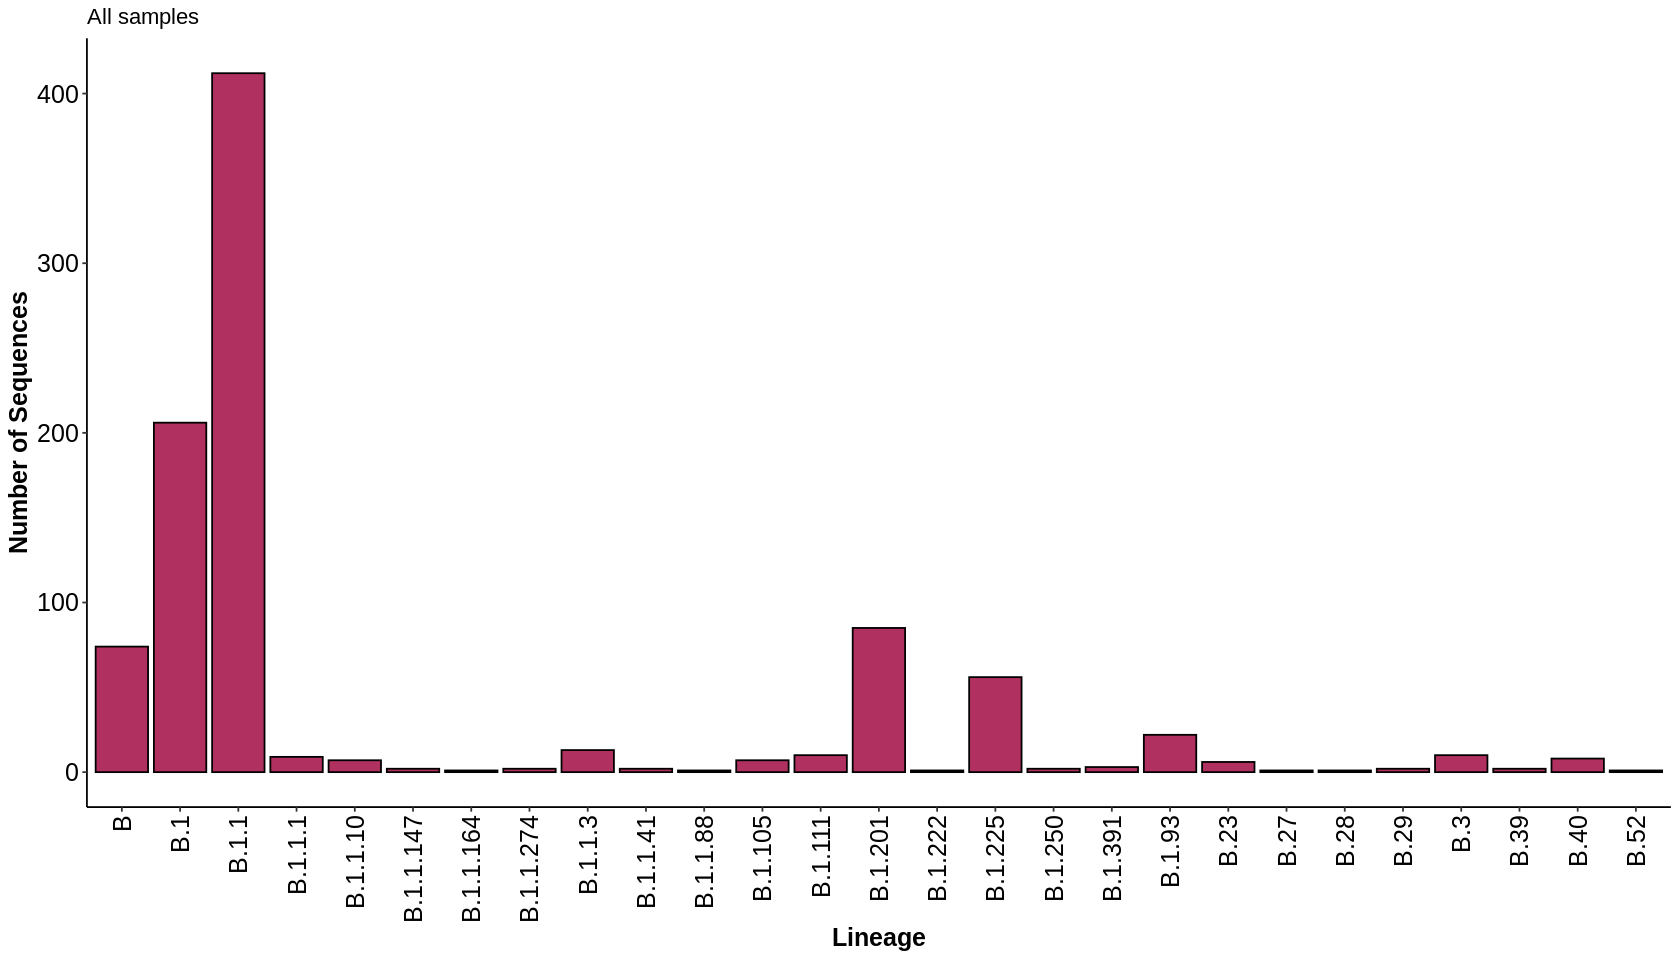

In [37]:
plot_lineages_sampling_type(full, "All samples")

There are 27 lineages across the 946 samples.

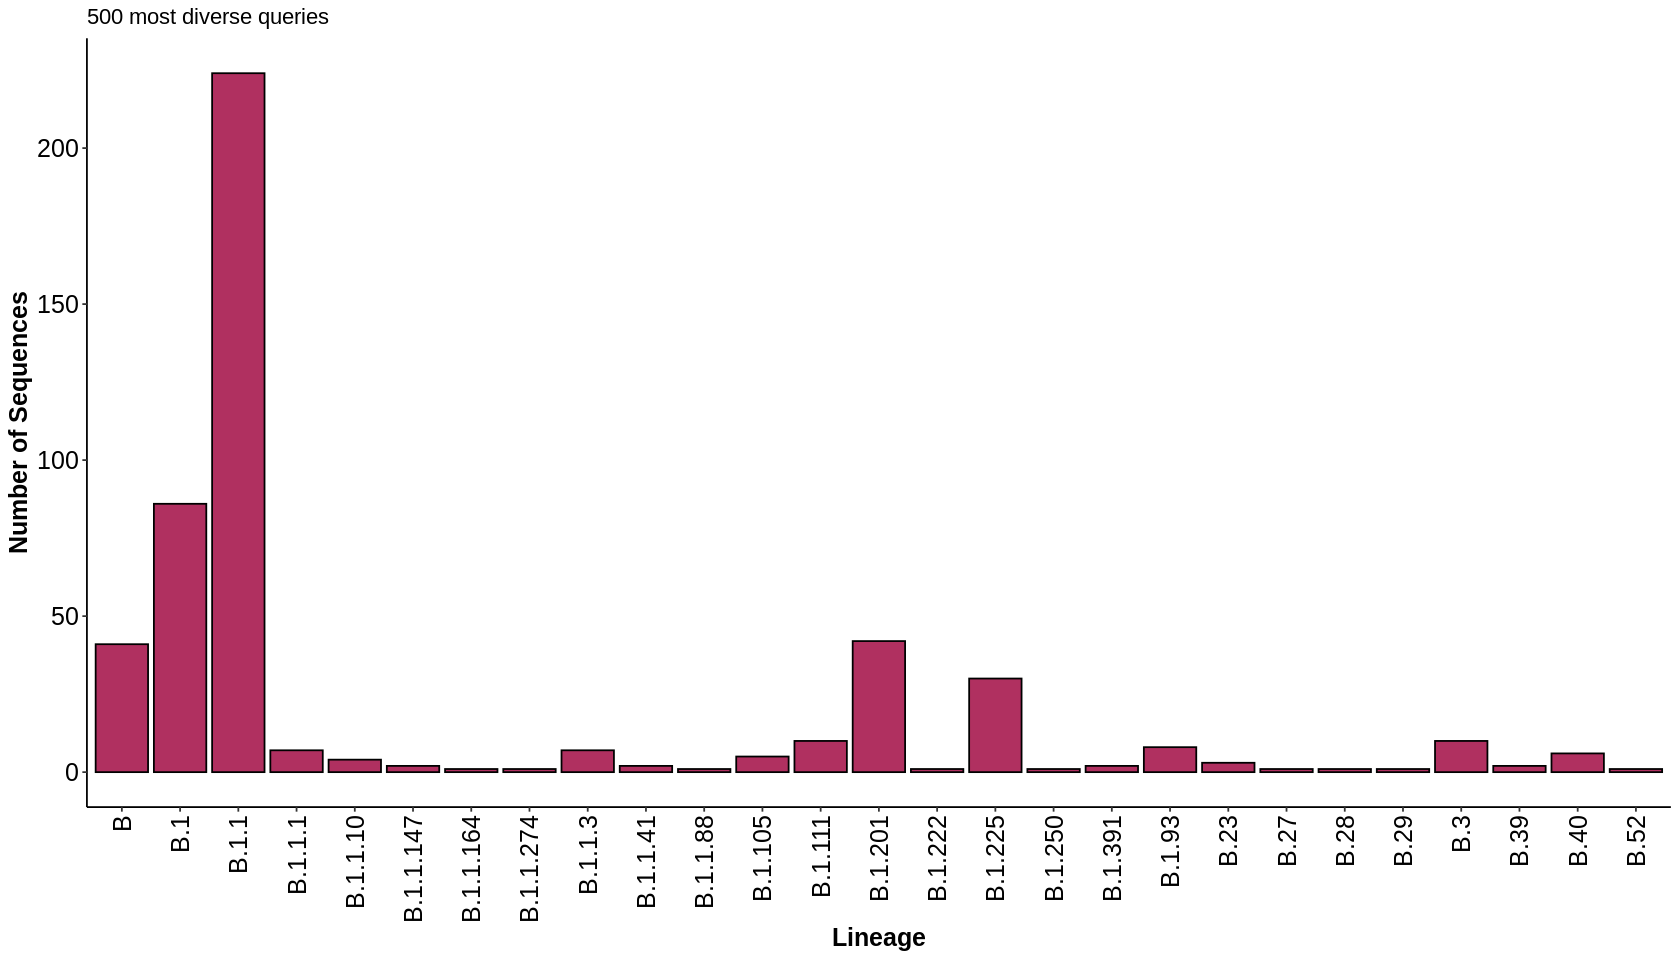

In [38]:
plot_lineages_sampling_type(reduced_qs, "500 most diverse queries")

Taking the 500 most diverse samples still captures all 27 lineages, as hoped.  It also appears to follow the same distribution as the original dataset, just shortened by about half, which is quite nice.  Based on this one small cohort (!!), taking the most diverse queries gives a good representation of the original dataset in a smaller format.

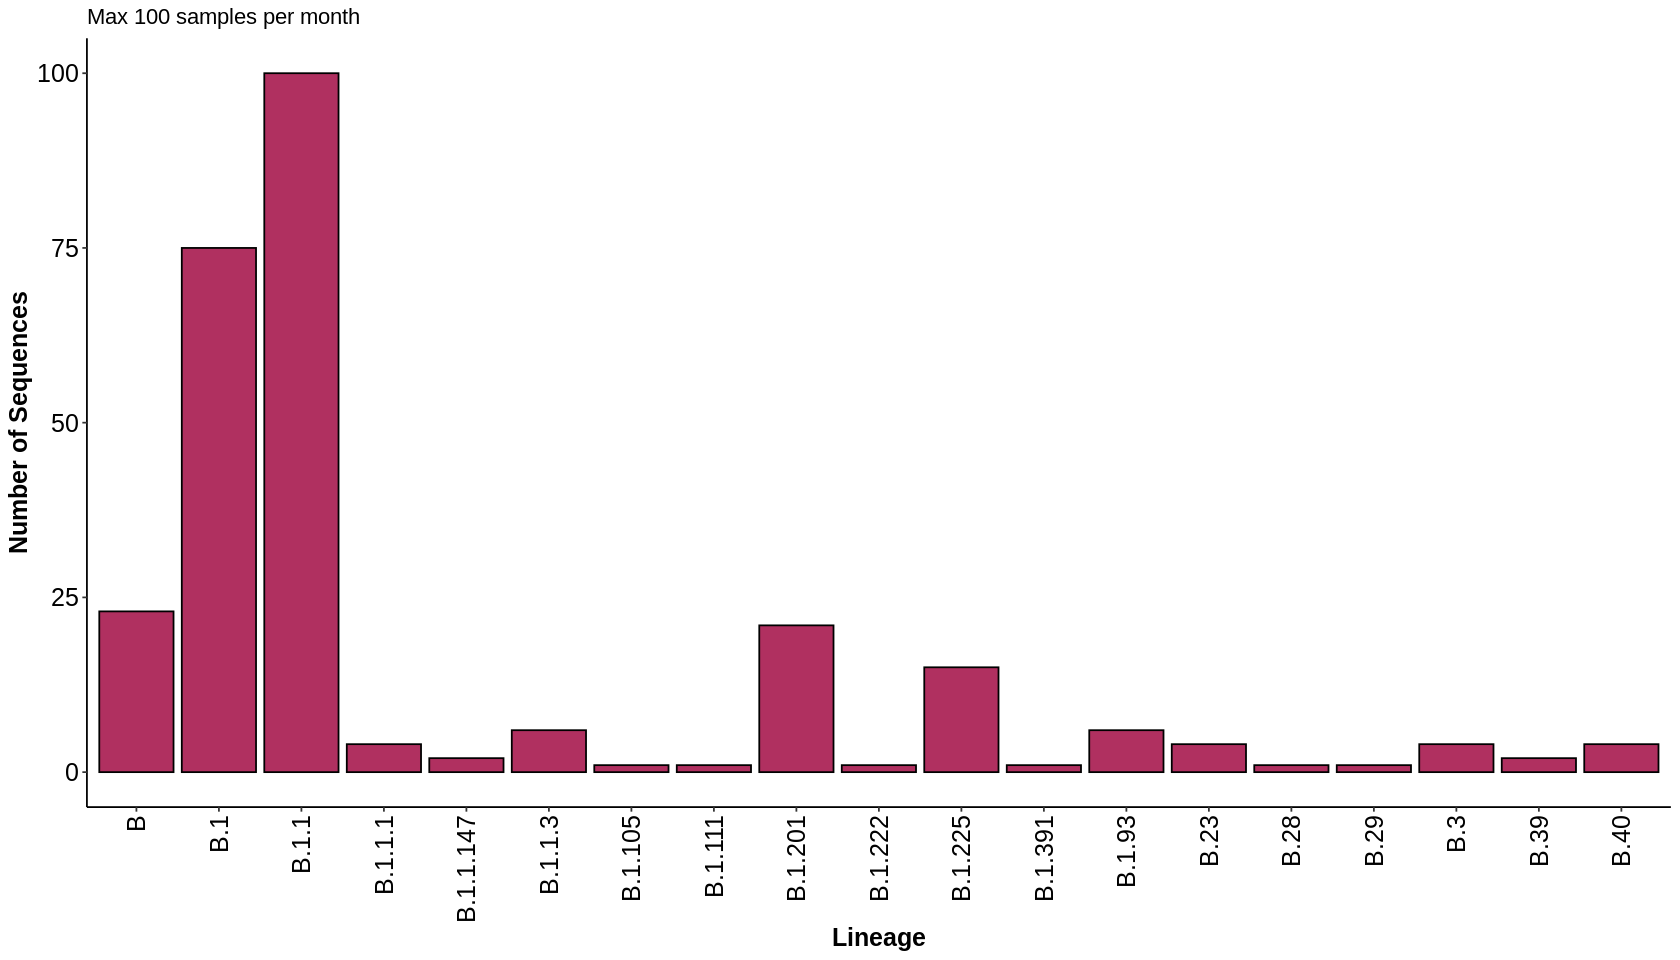

In [39]:
plot_lineages_sampling_type(max_100, "Max 100 samples per month")

Here, 19/27 lineages are still captured even with only about half as many samples (272) as the diverse queries method (500).  Missing are: B.52, B.27, B.1.250, B.1.1.88, B.1.1.41, B.1.1.274, B.1.1.164, and B.1.1.10, all of which were rarer lineages in the full dataset.  However, increasing the maximum number of samples per month so that you wind up with roughly the same number as the most diverse queries dataset might account for those.  Because of that, I'm not sure that this is a good way to sample genomes (but more data will be needed to show this :)).  This leads me to...

**Max Total Random Samples Tree**

I haven't implemented this yet, but this sampling technique is used in the [B.1.1.7 article by Hill et al](https://www.biorxiv.org/content/10.1101/2022.03.08.481609v1), who took ~1000 samples for each of B.1.1.7 and the background lineages time-homogeneously throughout a defined time frame.  I think this would be a helpful technique for finding the ancestry of a lineage, when you want to clearly see the potential ancestors, but it might be less good for getting an overview of the landscape over time, in cases where sequence diversity is higher for one timepoint than another.

# Appendix of things I tried out of curiousness that are not really relevant

Out of curiosity, just to see what phylotypes look like on the tree:

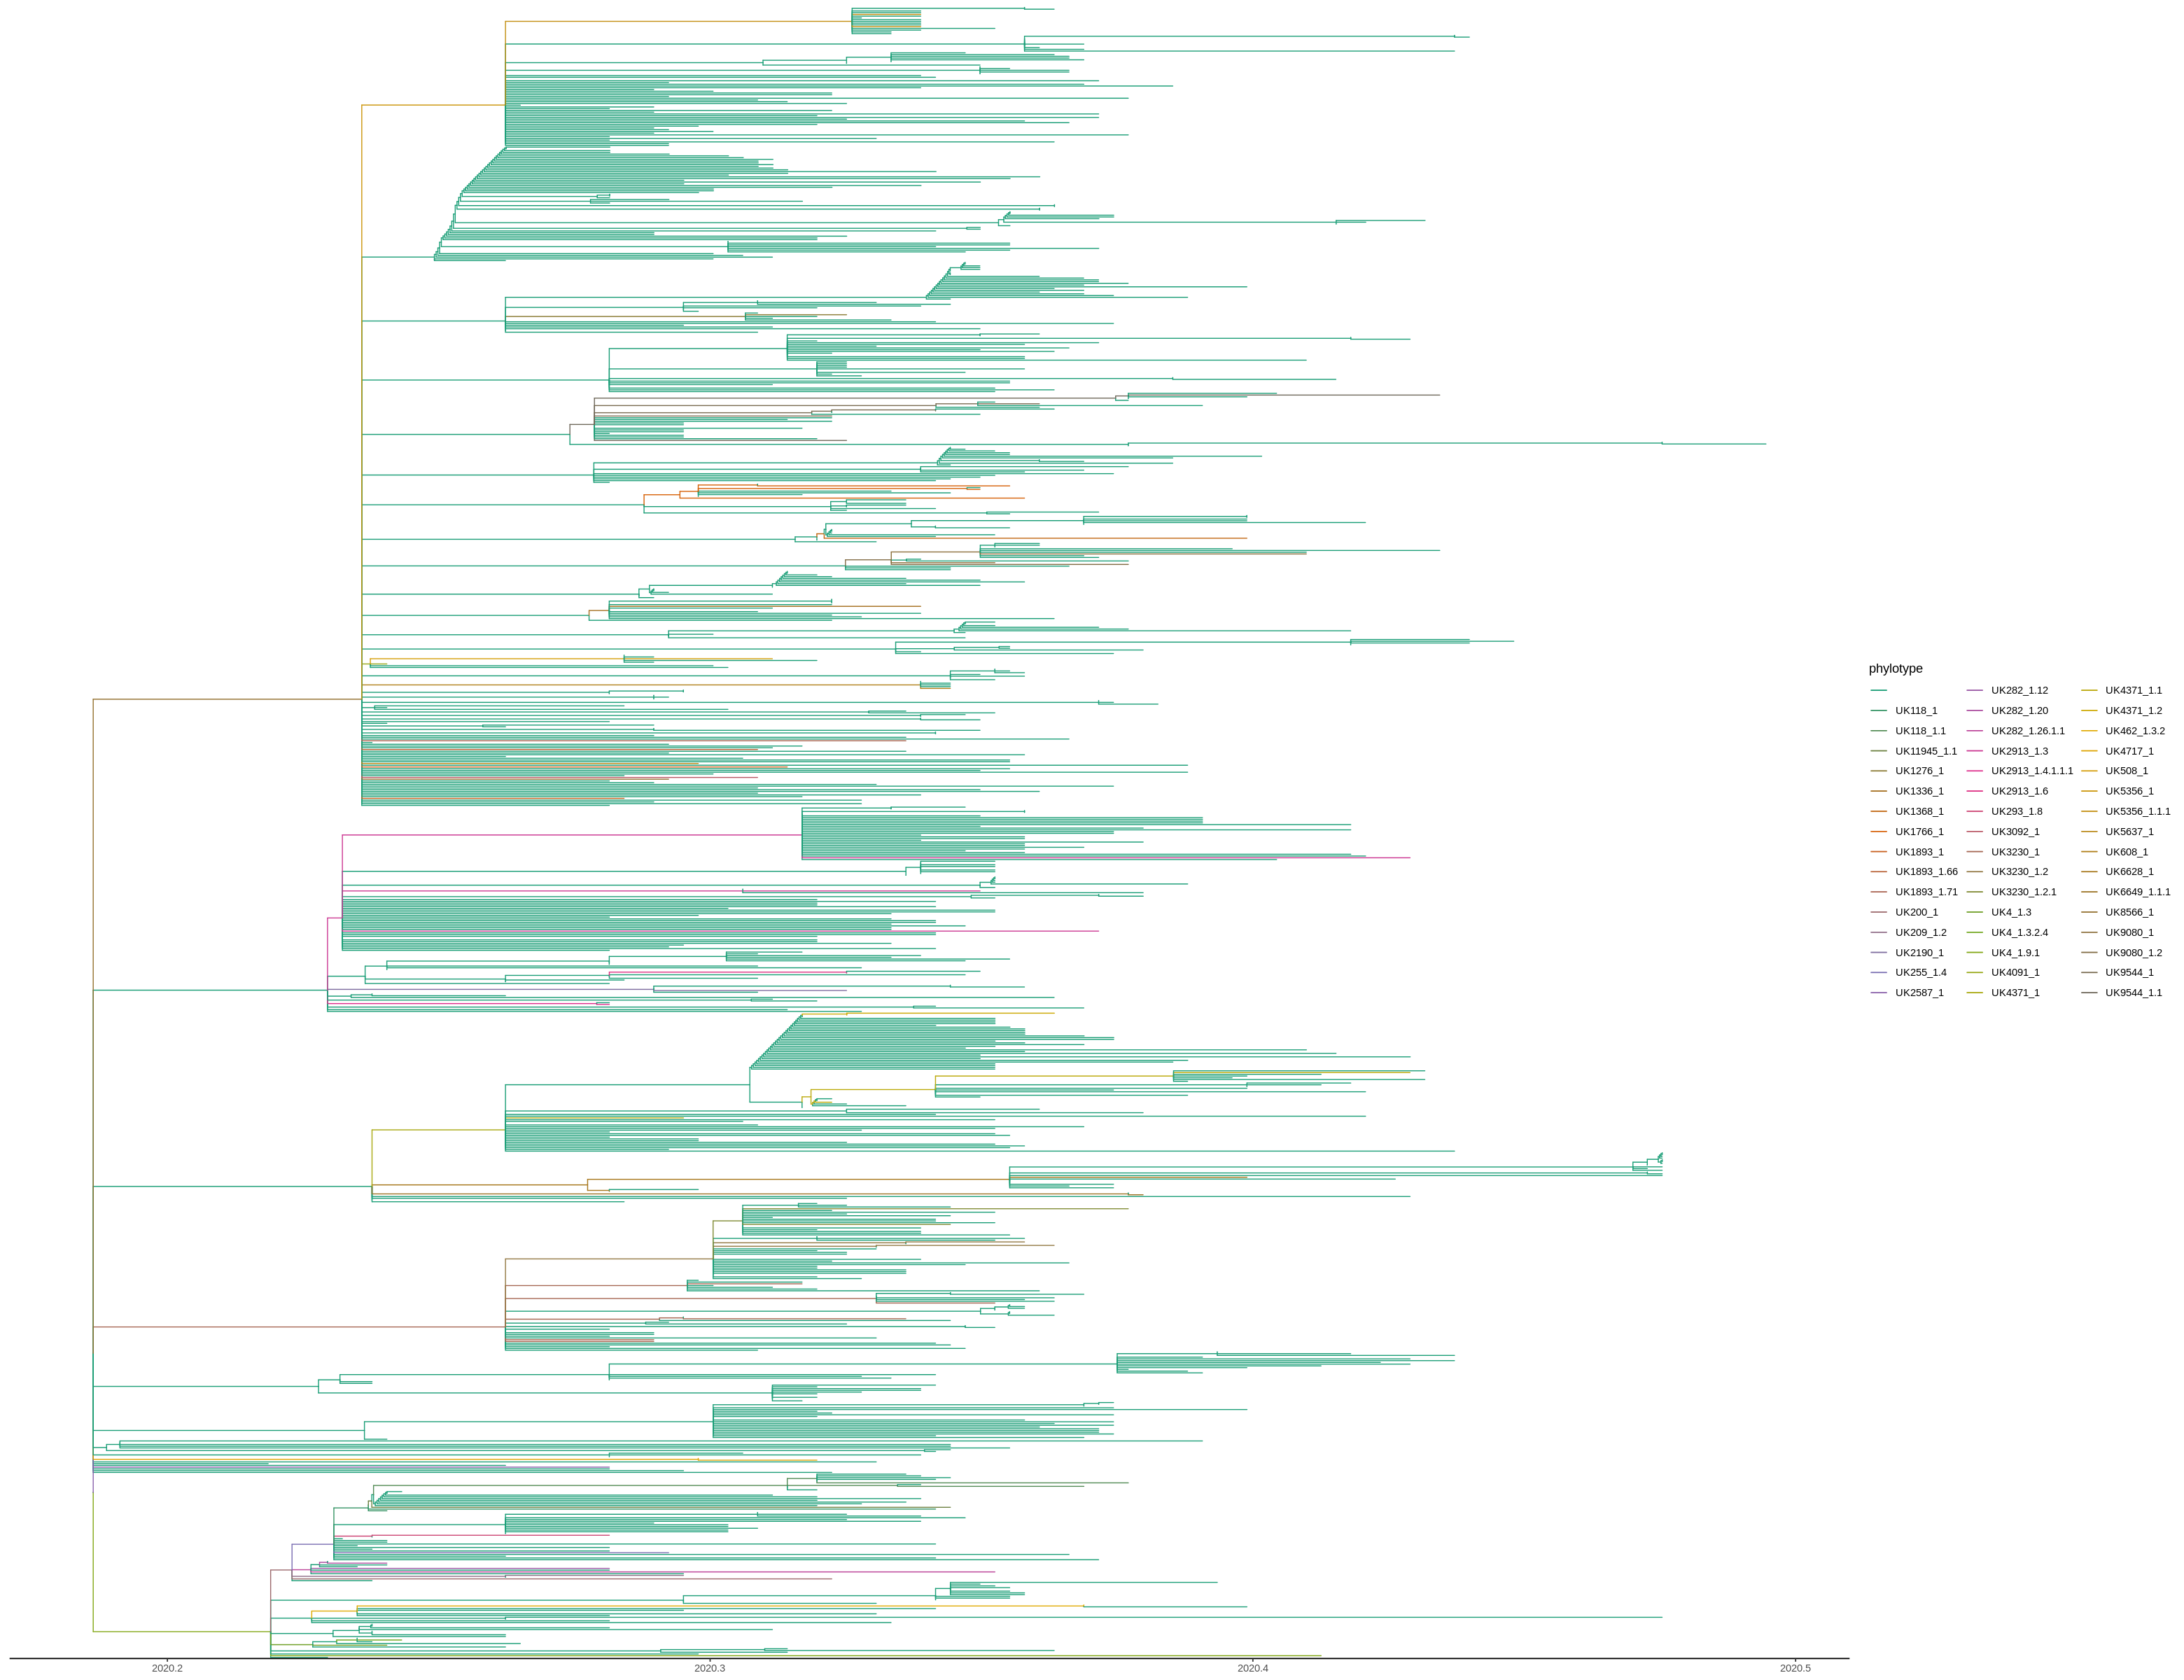

In [40]:
plot_tree_by_factor("full_timeframe/timetree.nexus", "full_timeframe/metadata_reformatted.csv", "phylotype", "nexus", "2020-06-30")

The phylotype tree is much more homogeneous than the lineage tree, but only because most samples haven't got a phylotype defined...

How do sample dates look?  Did `timetree` keep the dates roughly in order from left to right?

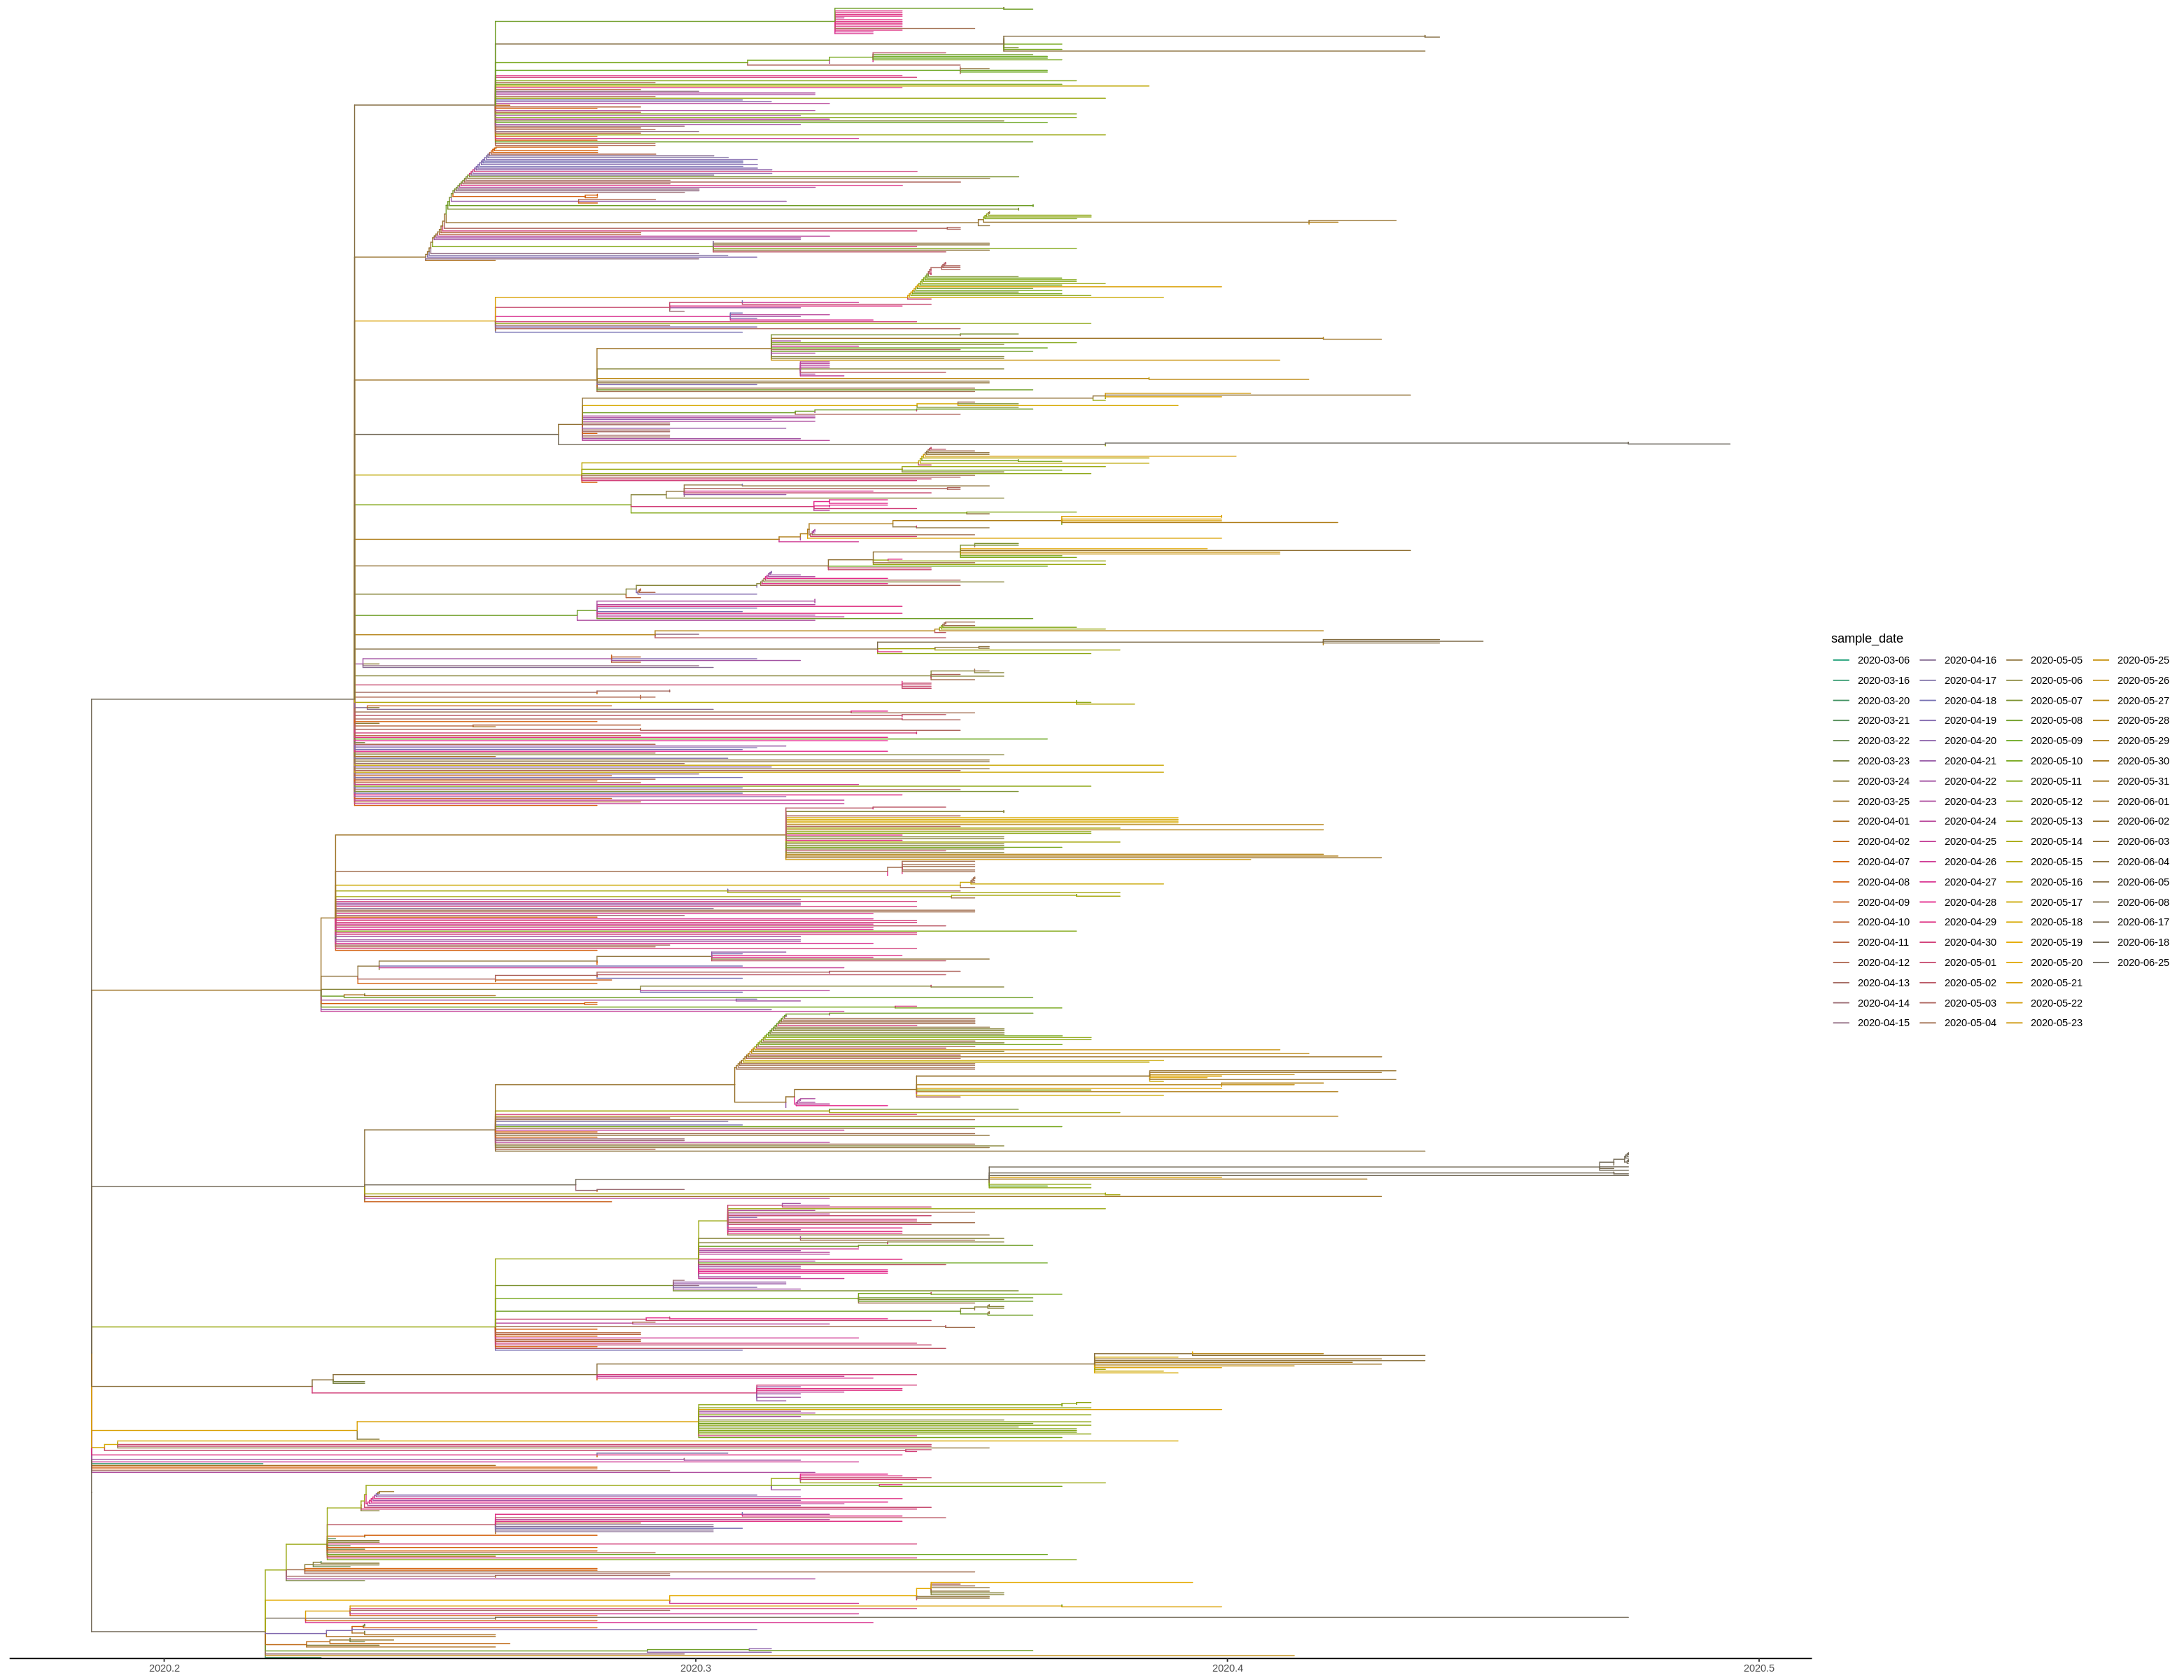

In [41]:
plot_tree_by_factor("full_timeframe/timetree.nexus", "full_timeframe/metadata_reformatted.csv", "sample_date", "nexus", "2020-06-30")

Yes, looks like it: it roughly goes from orange on the left to pink to green to gold.